<div class="alert alert-block alert-info">
<center> <h1> MSc in Data Science and Advanced Analytics </h1> </center> <br>
<center> DATA MINING PROJECT 2024/2025 </center>

# ABCDEATS Inc. - Group 02

|   | Student Name   |    Student ID | 
|---|----------------|      ---      |
| 1 | Afonso Gião    |   20240495   | 
| 2 | Bruna Duarte   |    20210669   |  
| 3 | Catarina Silva |   20240558   | 
| 4 | Sarah Leuthner |   20240581   | 

# Table of Contents

* [<font color='#52b69a'>1 - Business Understanding </font>](#first-bullet) <br>

* [<font color='#52b69a'>2 - Data Integration </font>](#second-bullet) <br>
    - [2.1. Import Libraries ](#2.1)<br>
    - [2.2. Import Data ](#2.2)<br>
        - 2.2.1. [Metadata ](#2.2.1)<br>

* [<font color='#52b69a'>3 - Data Exploration </font>](#third-bullet) <br>
    - [3.1. Exploratory Data Analysis  ](#3.1) <br>
        - 3.1.1. [Descriptive Statistics](#3.1.1)<br>
    - [3.2. Features' Distributions  ](#3.2) <br>
    - [3.3. Outliers Check  ](#3.3) <br>

* [<font color='#52b69a'>4 - Data Preprocessing</font>](#forth-bullet) <br>
    - [4.1. Handling Troublesome Values ](#4.1)<br>
    - [4.2. First Outliers Treatment ](#4.2)<br>
    - [4.3. Feature Engineering](#4.3)<br>
    - [4.4. Feature Selection ](#4.4)<br>
    - [4.5. Scaling ](#4.5)<br>
    - [4.6. Second Outliers Treatment ](#4.6)<br>

* [<font color='#52b69a'>5 - Clustering</font>](#fifth-bullet) <br>
    - 5.1.[Kmeans Clustering  ](#5.1)<br>
    - 5.2.[K-means Clustering with Perspectives](#5.2)<br>
    - 5.3.[Hierarchical clustering ](#5.3)<br>
    - 5.4.[DBSCAN clustering ](#5.4)<br>
    - 5.5.[Self Organizing Maps ](#5.5)<br>
        - 5.5.1.[K-Means on top of SOM units ](#5.5.1)<br>
        - 5.5.2.[Hierarchical Clustering on top of SOM units ](#5.5.2)<br>
    - 5.6.[K-Means Hierarchical Hybrid ](#5.6)<br>
    - 5.7.[Gaussian Mixture Model ](#5.7)<br>
    - 5.4.[K-prototype ](#5.4)<br>
     
* [<font color='#52b69a'>6 - Clusters Analysis & Profiling </font>](#sixth-bullet) <br>
    - 6.1.[t-SNE Visualization ](#6.1)<br>
    - 6.2.[UMAP Visualization ](#6.2)<br>
    - 6.3.[Decision Tree: Assess the accuracy & Visualize ](#6.3)<br>
    - 6.4.[Cluster Profiling ](#6.4)<br>

<a class="anchor" id="first-bullet">

# 1. Business Understanding

ABCDEats Inc., a food delivery service, operates in a dynamic market where consumers are increasingly selective about their spending habits. To thrive in this competitive environment, the company must align its strategies with the diverse preferences and needs of its customer base.

**Business Challenge**

Understanding customer behavior is essential for delivering personalized services and achieving sustainable growth. By segmenting its customer base, ABCDEats Inc. can:

* Identify patterns in customer preferences and behavior.
* Develop tailored marketing and operational strategies.
* Enhance customer satisfaction and retention through personalized services.

**Objective**

The main goal of this project is to apply customer segmentation techniques to uncover descriptive patterns and behavioral insights within the customer base. The findings will:

* Classify customers into segments based on their spending habits, order preferences, and demographics.
* Inform the development of personalized strategies to cater to each segment effectively.
* Enable the company to refine its service offerings and improve its targeting of future customers.

<a class="anchor" id="second-bullet">     

# 2. Data Integration

## 2.1  Import Libraries <a class="anchor" id="2.1"></a>

In [1]:
# from numpy.ma.core import repeat

# hiding the warnings
import warnings
warnings.filterwarnings('ignore')
import os, sys

sys.stderr = open(os.devnull, "w")  # silence stderr
sys.stderr = sys.__stderr__  # unsilence stderr

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

%matplotlib inline

# for better resolution plots
%config InlineBackend.figure_format = 'retina'

# hierarchical clustering
from sklearn.cluster import AgglomerativeClustering, KMeans,MeanShift, DBSCAN, estimate_bandwidth
from scipy.cluster.hierarchy import dendrogram
from sklearn.base import clone
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture

# setting the style of seaborn
sns.set(rc={'figure.figsize':(11.7,8.27)})

## 2.2 Import Data <a class="anchor" id="2.2"></a>

In [2]:
# Importing the dataset
df = pd.read_csv('DM2425_ABCDEats_DATASET.csv')

### 2.2.1 Metadata <a class="anchor" id="2.2.1"></a>

- *customer_id* - Unique identifier for each customer.
- *customer_region* - geographic region where the customer is located.
- *customer_age* - Age of the customer.
- *vendor_count* - Number of unique vendors the customer has ordered from.
- *product_count* - Total number of products the customer has ordered.
- *is_chain* - Indicates whether the customer’s order was from a chain restaurant.
- *first_order* - Number of days from the start of the dataset when the customer first placed an order.
- *last_order* - Number of days from the start of the dataset when the customer most recently placed an order.
- *last_promo* - The category of the promotion or discount most recently used by the customer.
- *payment_method* - Method most recently used by the customer to pay for their orders.
- *CUI_American*, *CUI_Asian*, *CUI_Chinese*, *CUI_Italian*, etc. - The amount in monetary units spent by the customer from the indicated type of cuisine.
- *DOW_0* to *DOW_6* - Number of orders placed on each day of the week (0 = Sunday, 6 = Saturday).
- *HR_0* to *HR_23* - Number of orders placed during each hour of the day (0 = midnight, 23 = 11 PM).

<a class="anchor" id="third-bullet">     

# 3. Data exploration

## 3.1. Exploratory Data Analysis <a class="anchor" id="3.1"></a>

In [3]:
print(f'The dataframe has {df.shape[0]} rows and {df.shape[1]} columns')

The dataframe has 31888 rows and 56 columns


In [4]:
print('There are {} observations and {} features in the dataset'.format(df.shape[0], df.shape[1]))

There are 31888 observations and 56 features in the dataset


In [5]:
# Indexing by customer_id
df.set_index('customer_id',inplace=True)

### 3.1.1 Descriptive Statistics <a class="anchor" id="3.1.1"></a>

In [6]:
# Descriptive statistics for numerical columns except for the cuisine, HR and DOW columns
df[['customer_age', 'vendor_count', 'product_count', "is_chain", 'first_order', 'last_order']].describe().round(2)

customer_age  vendor_count  ...  first_order  last_order
count      31161.00      31888.00  ...     31782.00    31888.00
mean          27.51          3.10  ...        28.48       63.68
std            7.16          2.77  ...        24.11       23.23
min           15.00          0.00  ...         0.00        0.00
25%           23.00          1.00  ...         7.00       49.00
50%           26.00          2.00  ...        22.00       70.00
75%           31.00          4.00  ...        45.00       83.00
max           80.00         41.00  ...        90.00       90.00

[8 rows x 6 columns]

In [7]:
# Descriptive statistics for the categorical columns
df.describe(include = "object")

customer_region last_promo payment_method
count            31888      31888          31888
unique               9          4              3
top               8670          -           CARD
freq              9761      16748          20161

Categorical columns, can be analyzed using frequency counts:

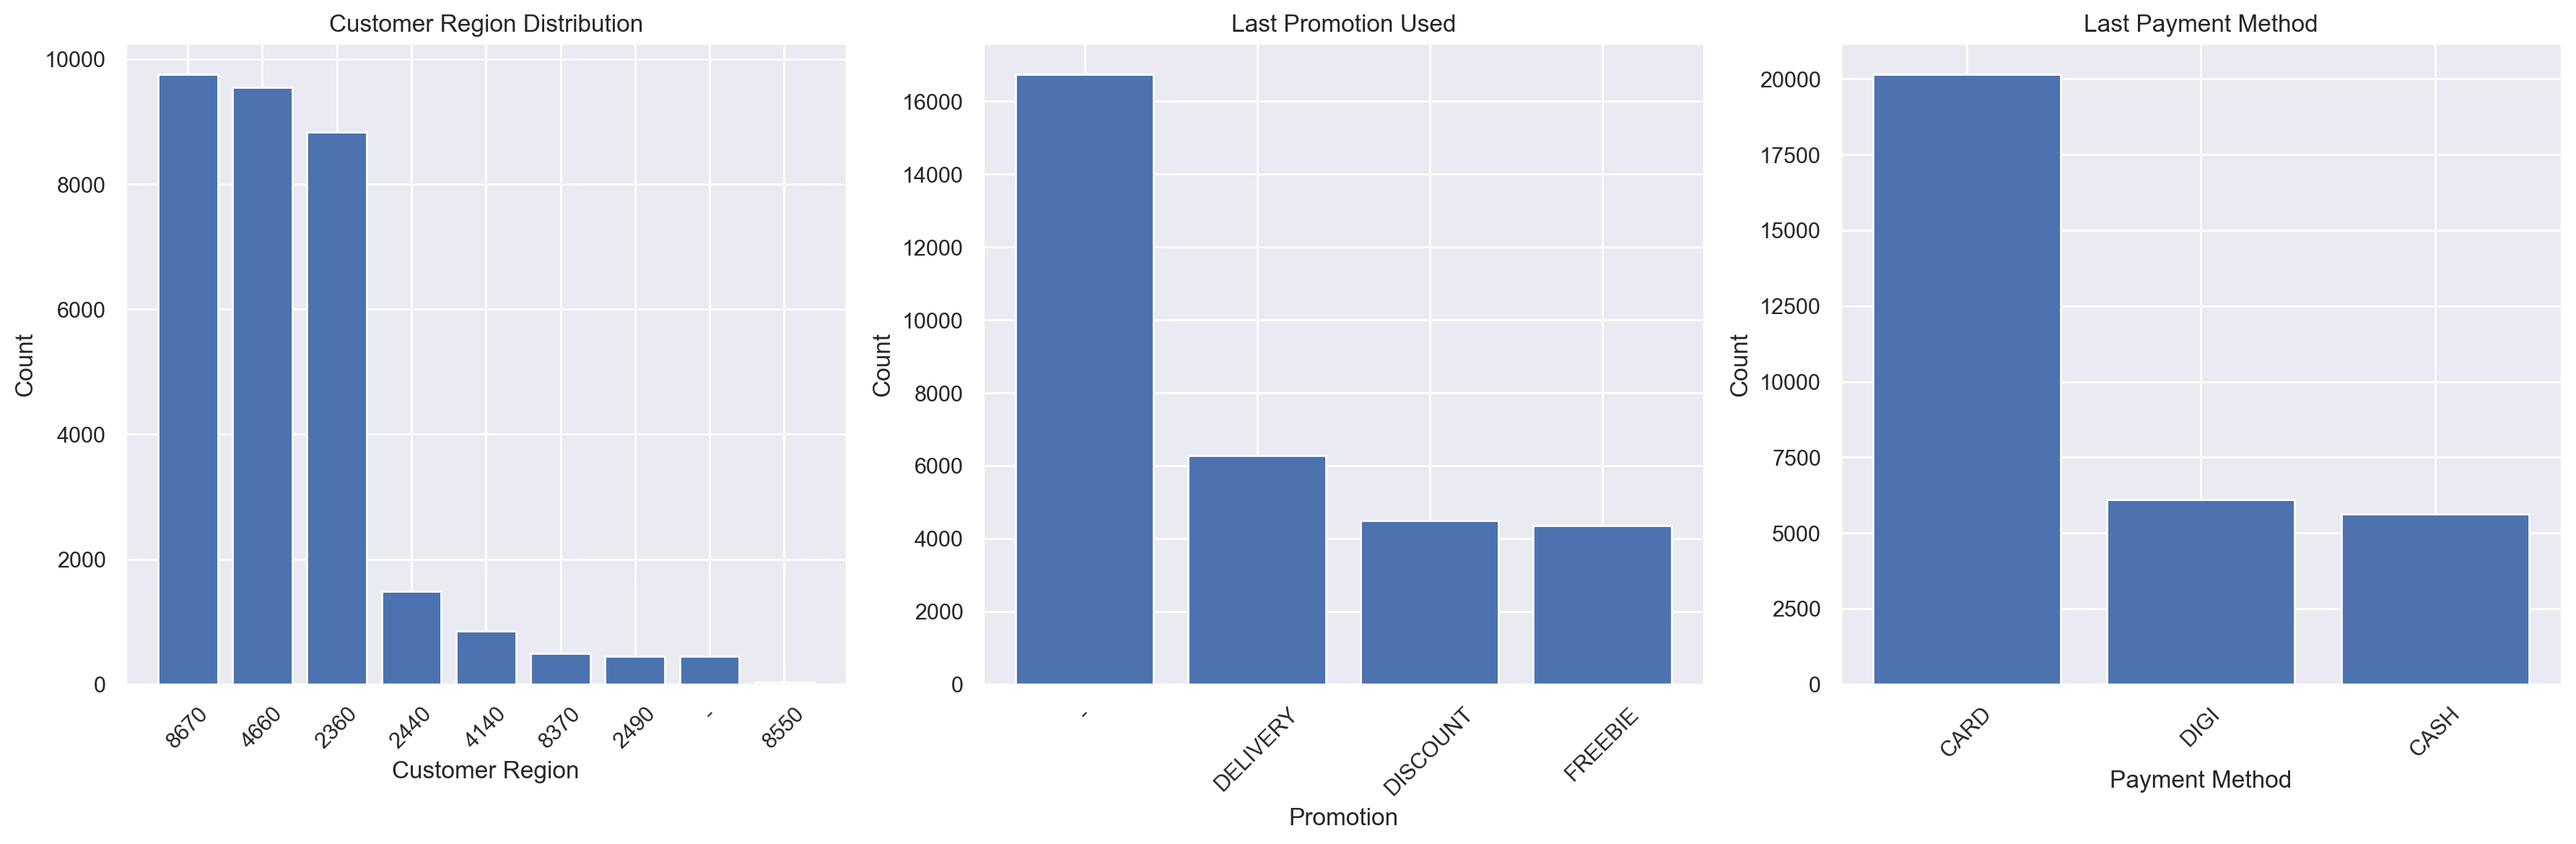

In [8]:
# Creating a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotting the first bar chart: Customer Region
value_counts1 = df["customer_region"].value_counts()
axes[0].bar(value_counts1.index, value_counts1)
axes[0].set_title('Customer Region Distribution')
axes[0].set_xlabel('Customer Region')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Plotting the second bar chart: Last Promotion Used
value_counts2 = df["last_promo"].value_counts()
axes[1].bar(value_counts2.index, value_counts2)
axes[1].set_title('Last Promotion Used')
axes[1].set_xlabel('Promotion')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Plotting the third bar chart: Last Payment Method Used
value_counts3 = df["payment_method"].value_counts()
axes[2].bar(value_counts3.index, value_counts3)
axes[2].set_title('Last Payment Method')
axes[2].set_xlabel('Payment Method')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()

### Cuisine Analysis

In [9]:
cuisine_columns = [col for col in df.columns if col.startswith('CUI_')]

In [10]:
# Descriptive statistics for the cuisine columns
df[cuisine_columns].describe().round(2).T

count  mean    std  min  25%  50%    75%     max
CUI_American              31888.0  4.88  11.65  0.0  0.0  0.0   5.66  280.21
CUI_Asian                 31888.0  9.96  23.56  0.0  0.0  0.0  11.83  896.71
CUI_Beverages             31888.0  2.30   8.48  0.0  0.0  0.0   0.00  229.22
CUI_Cafe                  31888.0  0.80   6.43  0.0  0.0  0.0   0.00  326.10
CUI_Chicken Dishes        31888.0  0.77   3.66  0.0  0.0  0.0   0.00  219.66
CUI_Chinese               31888.0  1.43   8.19  0.0  0.0  0.0   0.00  739.73
CUI_Desserts              31888.0  0.88   5.26  0.0  0.0  0.0   0.00  230.07
CUI_Healthy               31888.0  0.95   5.83  0.0  0.0  0.0   0.00  255.81
CUI_Indian                31888.0  1.63   7.44  0.0  0.0  0.0   0.00  309.07
CUI_Italian               31888.0  3.23  11.25  0.0  0.0  0.0   0.00  468.33
CUI_Japanese              31888.0  3.00  10.18  0.0  0.0  0.0   0.00  706.14
CUI_Noodle Dishes         31888.0  0.71   4.54  0.0  0.0  0.0   0.00  275.11
CUI_OTHER                 31888.0  3.00   9.77  0.0  0.0  0.0   0.00  366.08
CUI_Street Food / Snacks  31888.0  3.91  15.55  0.0  0.0  0.0   0.00  454.45
CUI_Thai                  31888.0  0.84   4.43  0.0  0.0  0.0   0.00  136.38

### Asian Cuisine

Let's compare the popularity of the most well-known cuisines in the asian continent: Japanese, Indian, Chinese and Thai.

Text(0.5, 0, 'Cuisines')

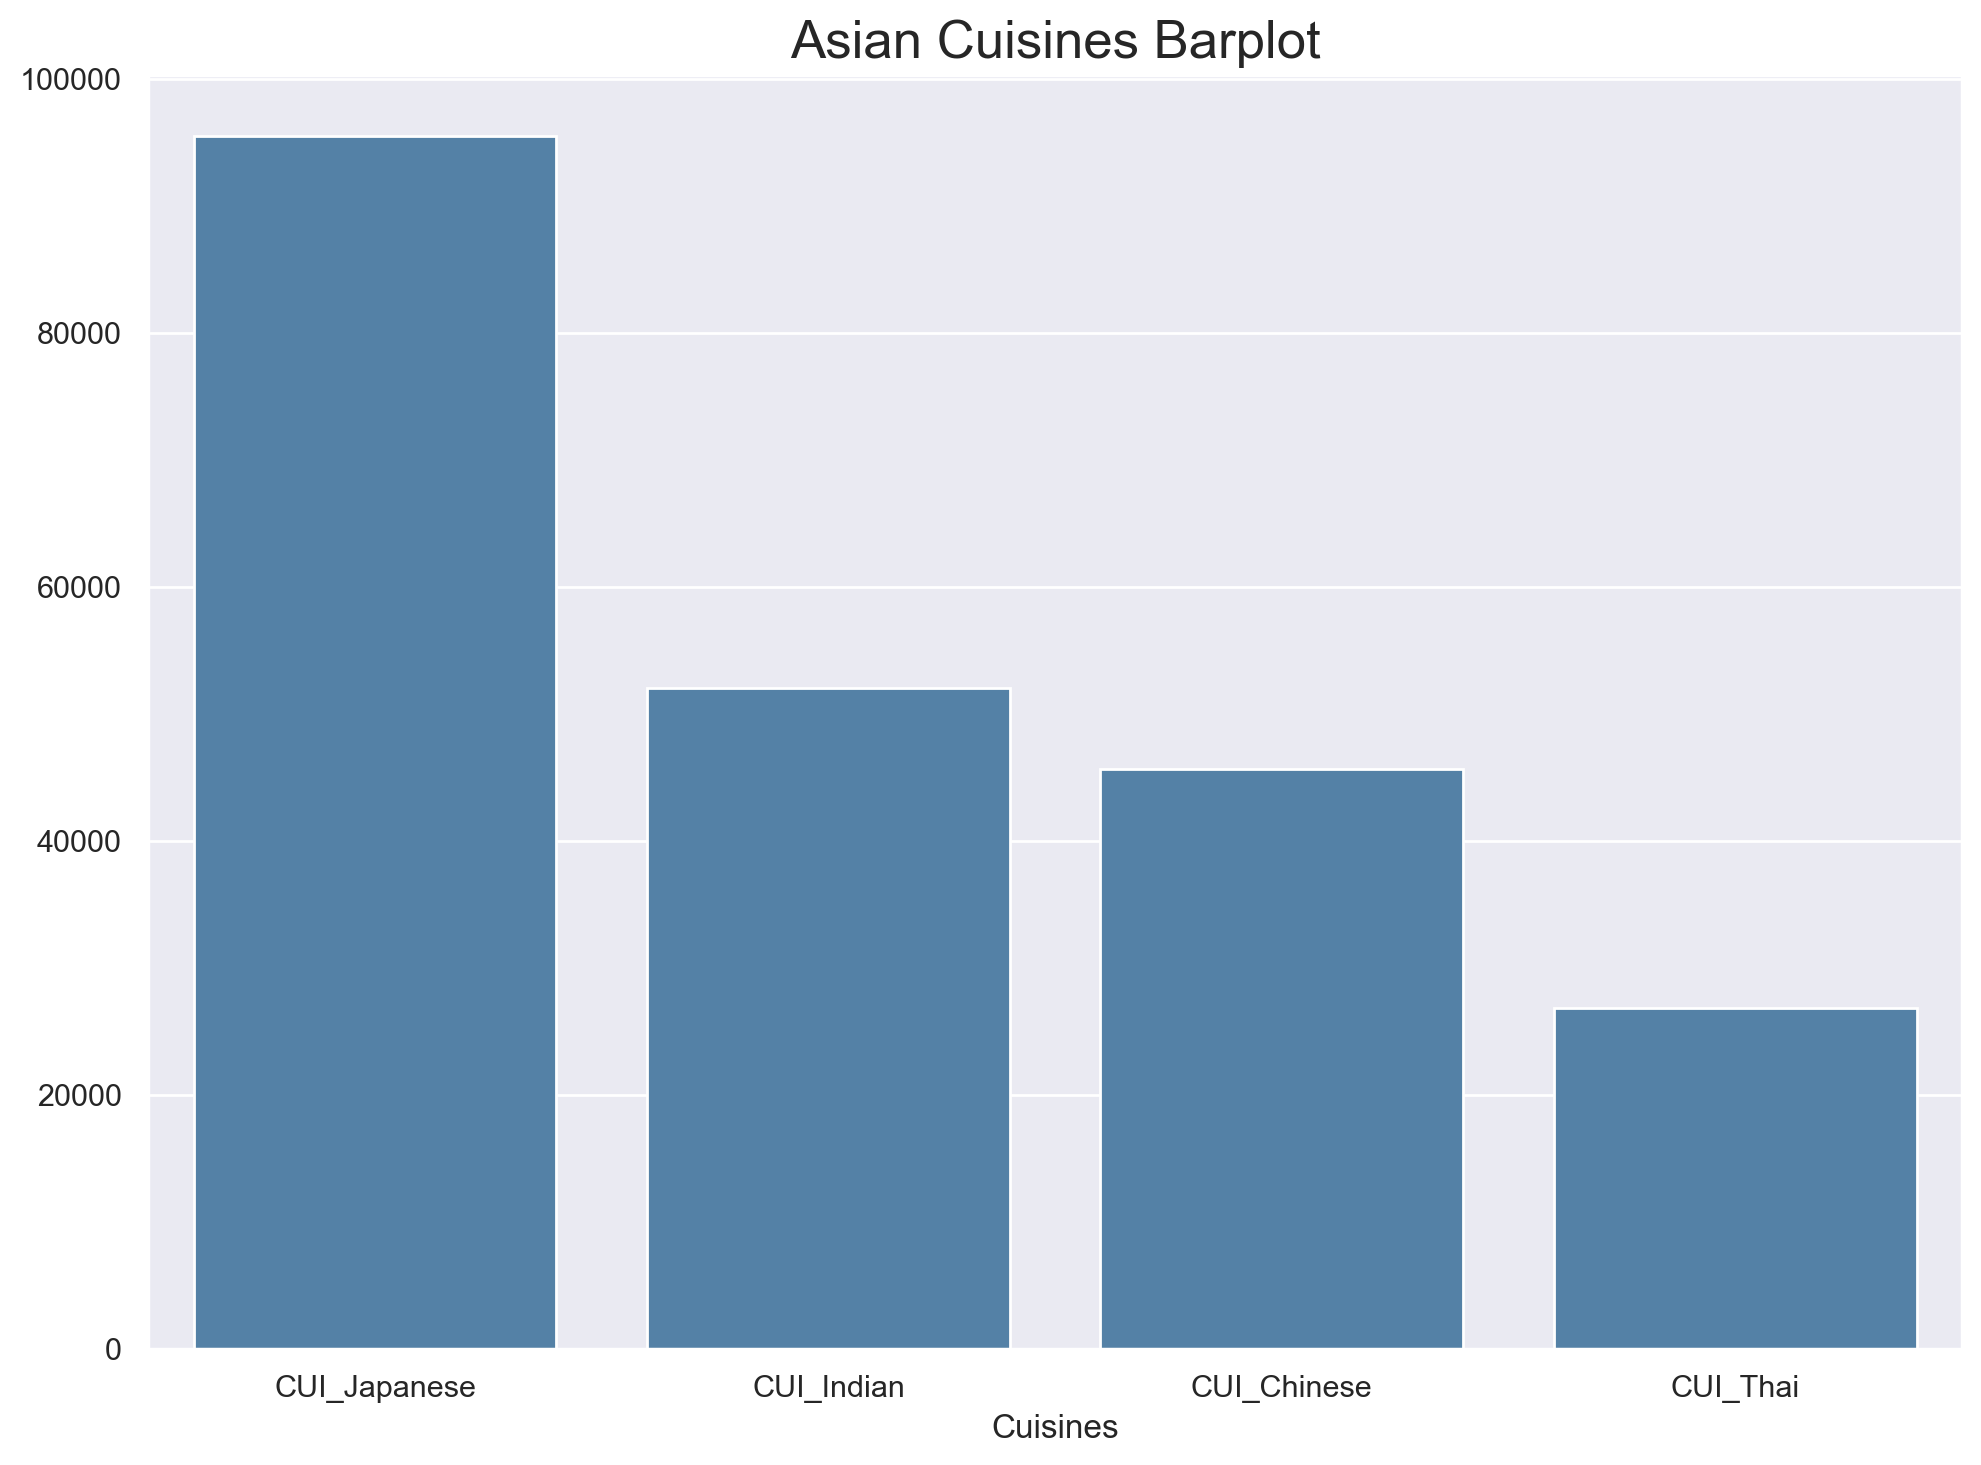

In [11]:
# Sum of the money spent in the 4 main asian cuisines
asian_cuisine_sums = df[['CUI_Japanese', 'CUI_Indian', 'CUI_Chinese', 'CUI_Thai']].sum()

# Plotting a bar chart for the 4 main asian cuisines
sns.barplot(x=asian_cuisine_sums.index, y=asian_cuisine_sums.values, color='steelblue')
plt.title("Asian Cuisines Barplot", size = 19)
plt.xlabel("Cuisines")

**Japanese** cuisine has the highest amount of money spent by a huge margin, among the 4 main asian cuisines. 
It is almost double the money spent in each of the other 3 cuisines. 
This makes sense given the popularity of japanese food and the higher average cost compared to other asian cuisines.

* **Asian Cuisine VS. The 4 Main Asian Cuisines**

Let's compare the total spending in Asian cuisine with the total spending in the 4 main asian cuisines we saw before.

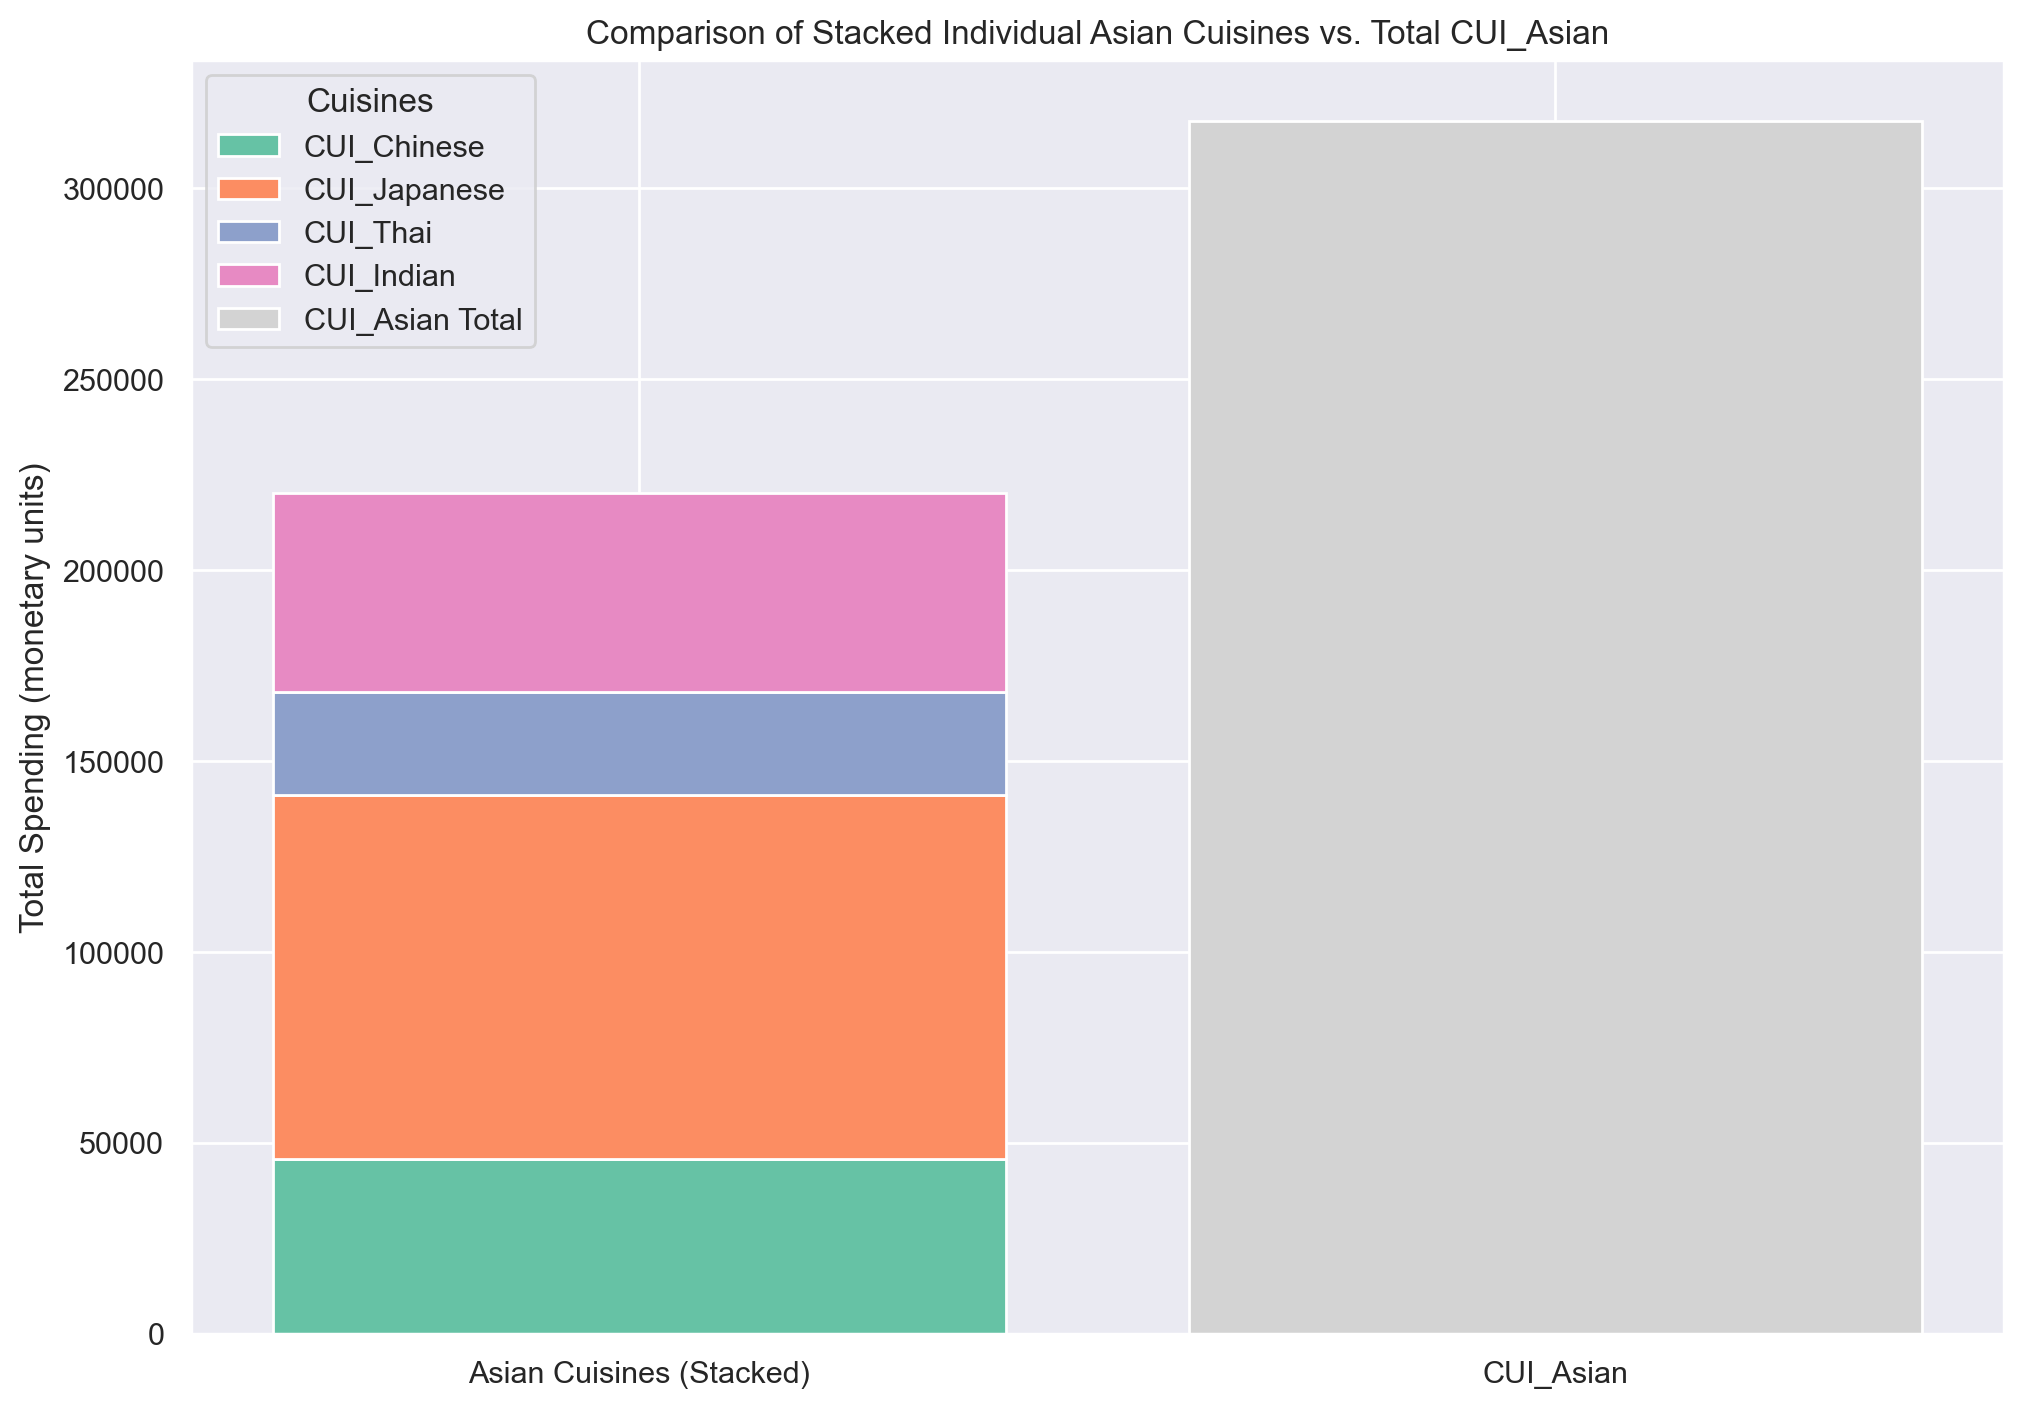

In [12]:
# Columns to sum for stacked Asian cuisine bar
cuisines = ["CUI_Chinese", "CUI_Japanese", "CUI_Thai", "CUI_Indian"]

# Sum of the money spent in the 4 main asian cuisines
cuisine_sums = [df[col].sum() for col in cuisines]

# Total money spent in CUI_Asian
sum_asian = df["CUI_Asian"].sum()

# Subplot for the stacked bar chart
fig, ax = plt.subplots()

# Plotting each cuisine individually in the stack
bottom = 0
colors = sns.color_palette("Set2")
for i, (cuisine, color) in enumerate(zip(cuisines, colors)):
    ax.bar("Asian Cuisines (Stacked)", cuisine_sums[i], bottom=bottom, label=cuisine, color=color)
    bottom += cuisine_sums[i]  # Update bottom for the next stack segment

# Plotting the total CUI_Asian as a single bar
ax.bar("CUI_Asian", sum_asian, color='lightgrey', label="CUI_Asian Total")

# Labelling and formatting the chart
ax.set_ylabel("Total Spending (monetary units)")
ax.set_title("Comparison of Stacked Individual Asian Cuisines vs. Total CUI_Asian")
ax.legend(title="Cuisines", loc="upper left")

plt.show()

In [13]:
print(f'Difference in money spent between generic and popular asian cuisines: {round(df["CUI_Asian"].sum() - df[["CUI_Japanese", "CUI_Indian", "CUI_Chinese", "CUI_Thai"]].sum().sum(), 2)}')

Difference in money spent between generic and popular asian cuisines: 97609.32


If we assume that "CUI_Asian" contains other Asian countries cuisines, we can say that around 2/3 of the money spent in Asian cuisines comes from only Japanese, Indian, Chinese and Thai cuisines. 
We can speculate there is only 97473.32 money units spent in the rest of the Asian cuisines, excluding those 4 main Asian cuisines.

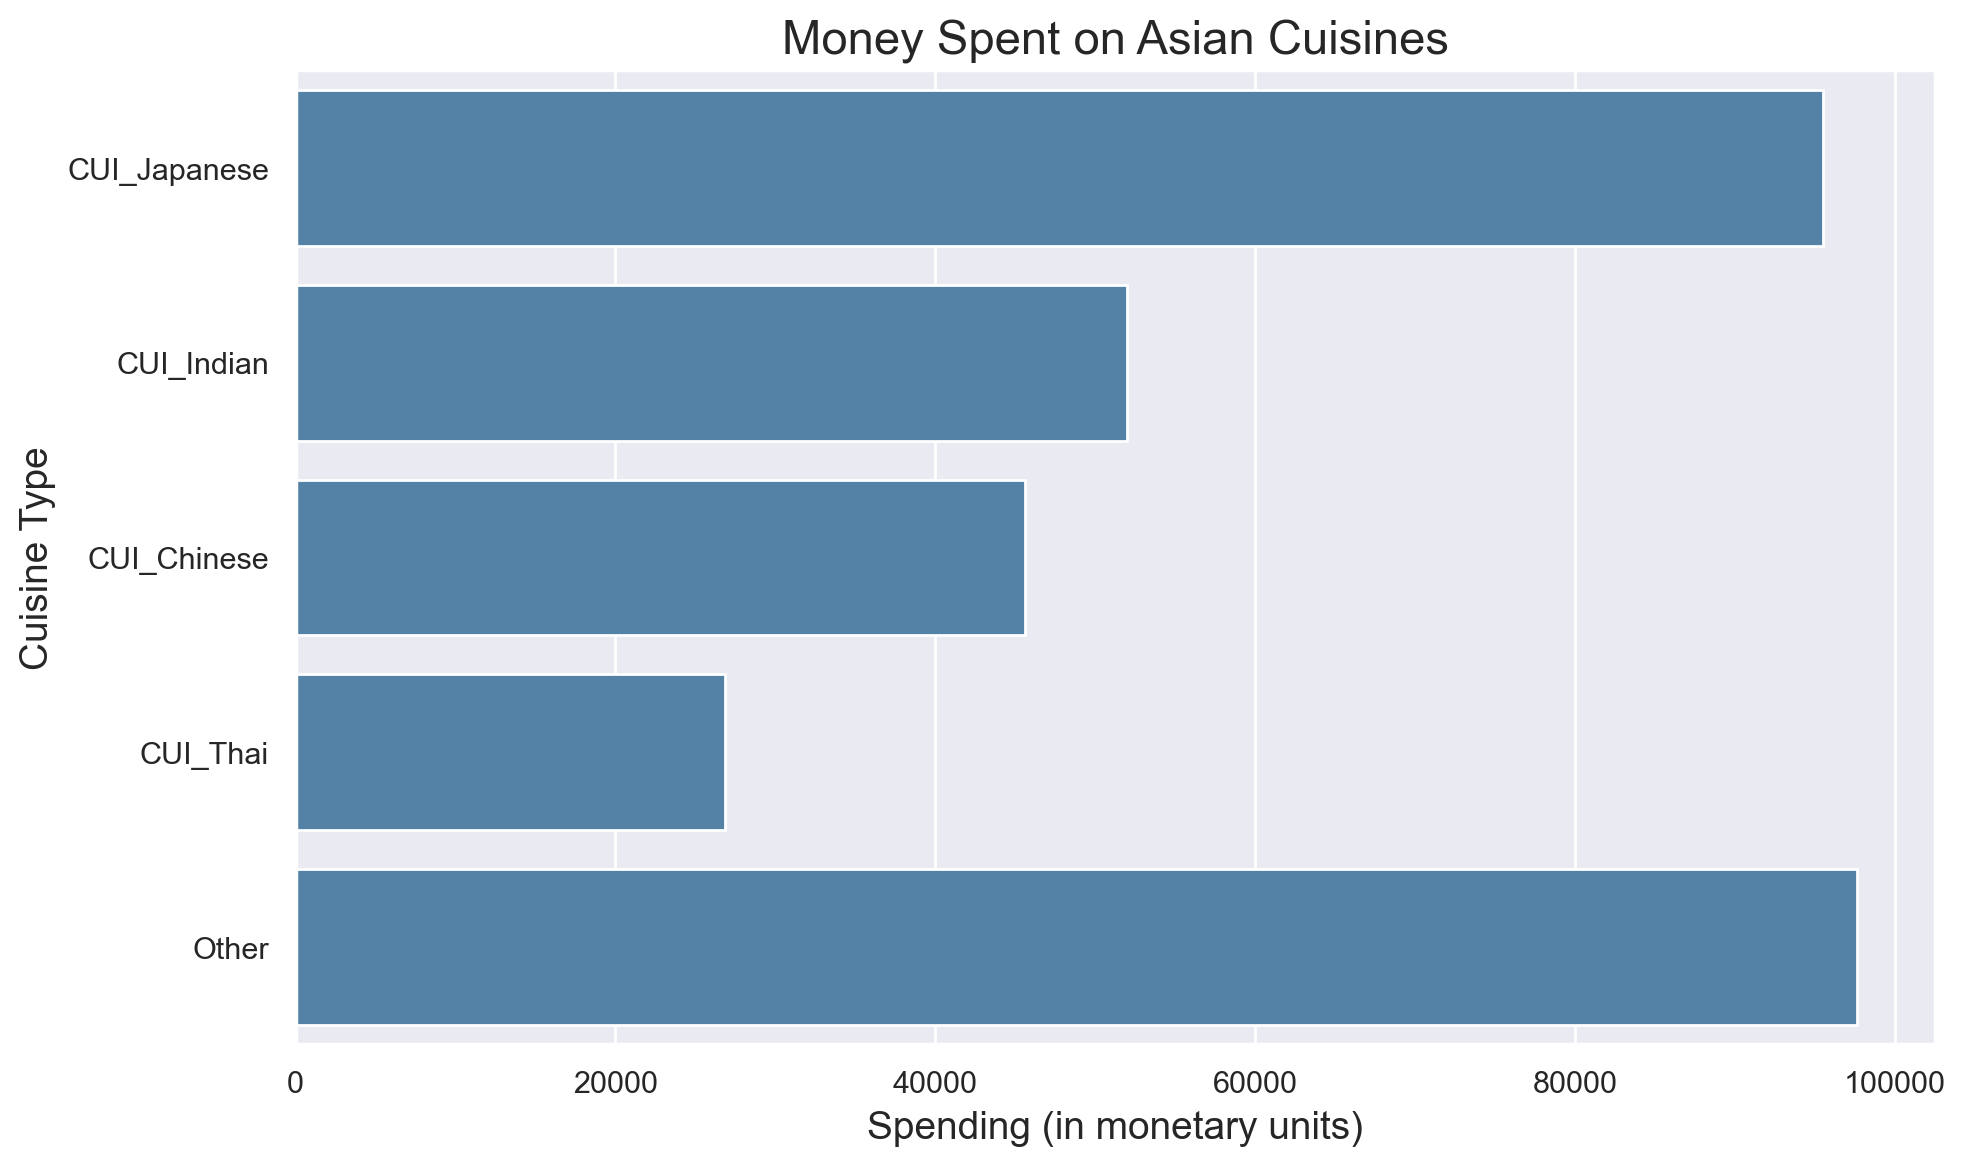

In [14]:
# Difference in money spent between generic and popular asian cuisines
asian_cuisine_sums['Other'] = df['CUI_Asian'].sum() - asian_cuisine_sums.sum()

# Reset the index to turn the data into a format suitable for plotting
asian_cuisine_sums_df = asian_cuisine_sums.reset_index()
asian_cuisine_sums_df.columns = ['Cuisine', 'Spending']

# Plotting the barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=asian_cuisine_sums_df, x='Spending', y='Cuisine', color='steelblue')  

# Adding title and labels
plt.title("Money Spent on Asian Cuisines", size=17)
plt.xlabel("Spending (in monetary units)", size=14)
plt.ylabel("Cuisine Type", size=14)

# Display the barplot
plt.tight_layout()
plt.show()

Japanese cuisine could represent over 30% of the total spending in Asian cuisine.

* **European, Asian, American and Other cuisines VS. Remaining**

In [15]:
# Total spending in all continents
total_spend = df[['CUI_American', 'CUI_Asian', 'CUI_Italian', 'CUI_OTHER']].sum().sum()
total_spend

672014.5

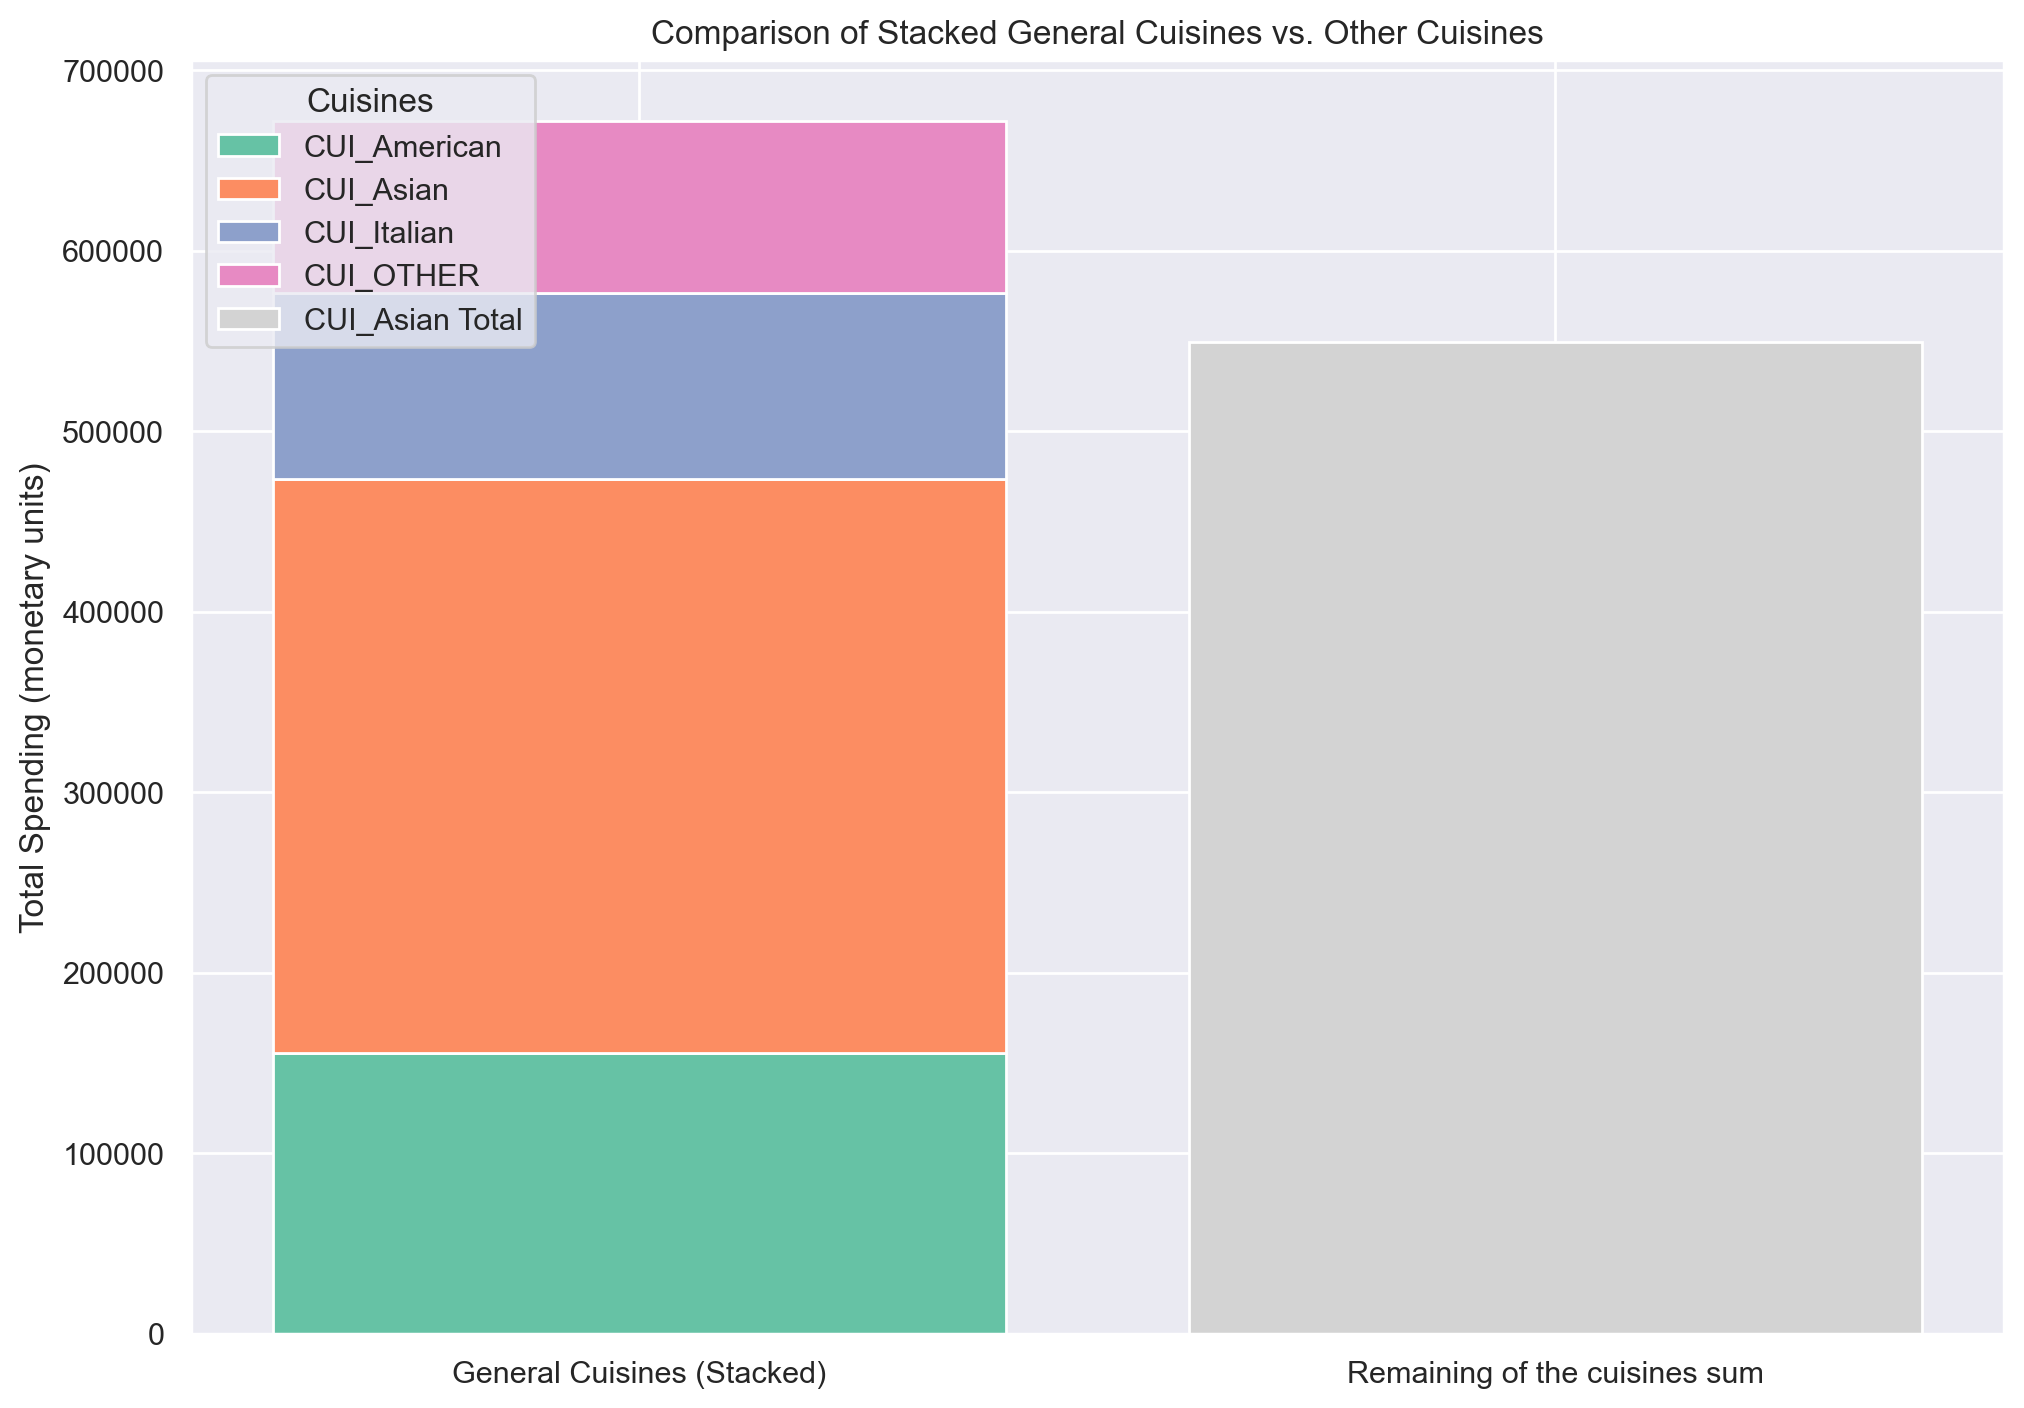

In [16]:
# Columns to sum for stacked Asian cuisine bar
cuisines = ['CUI_American', 'CUI_Asian', 'CUI_Italian', 'CUI_OTHER']

# Money spent in each of the 4 generic cuisines
cuisine_sums = [df[col].sum() for col in cuisines]

# Money spent in the rest of the cuisines
rest_cui_sum = df[cuisine_columns].sum().sum() - sum(cuisine_sums)

# Subplots for the stacked bar chart
fig, ax = plt.subplots()

# Plotting each cuisine individually in the stack
bottom = 0
colors = sns.color_palette("Set2")
for i, (cuisine, color) in enumerate(zip(cuisines, colors)):
    ax.bar("General Cuisines (Stacked)", cuisine_sums[i], bottom=bottom, label=cuisine, color=color)
    bottom += cuisine_sums[i]  # Update bottom for the next stack segment

# Plotting the total CUI_Asian as a single bar
ax.bar("Remaining of the cuisines sum", rest_cui_sum, color='lightgrey', label="CUI_Asian Total")

# Labeling and formatting the chart
ax.set_ylabel("Total Spending (monetary units)")
ax.set_title("Comparison of Stacked General Cuisines vs. Other Cuisines")
ax.legend(title="Cuisines", loc="upper left")

plt.show()

It is reasonable to think that these 4 cuisines contain the other types of cuisines in the dataset, because the total spending in these 4 cuisines is greater than the total spending in the remaining cuisines.

* **European VS. Asian VS. American VS. Other Cuisines**

<Axes: >

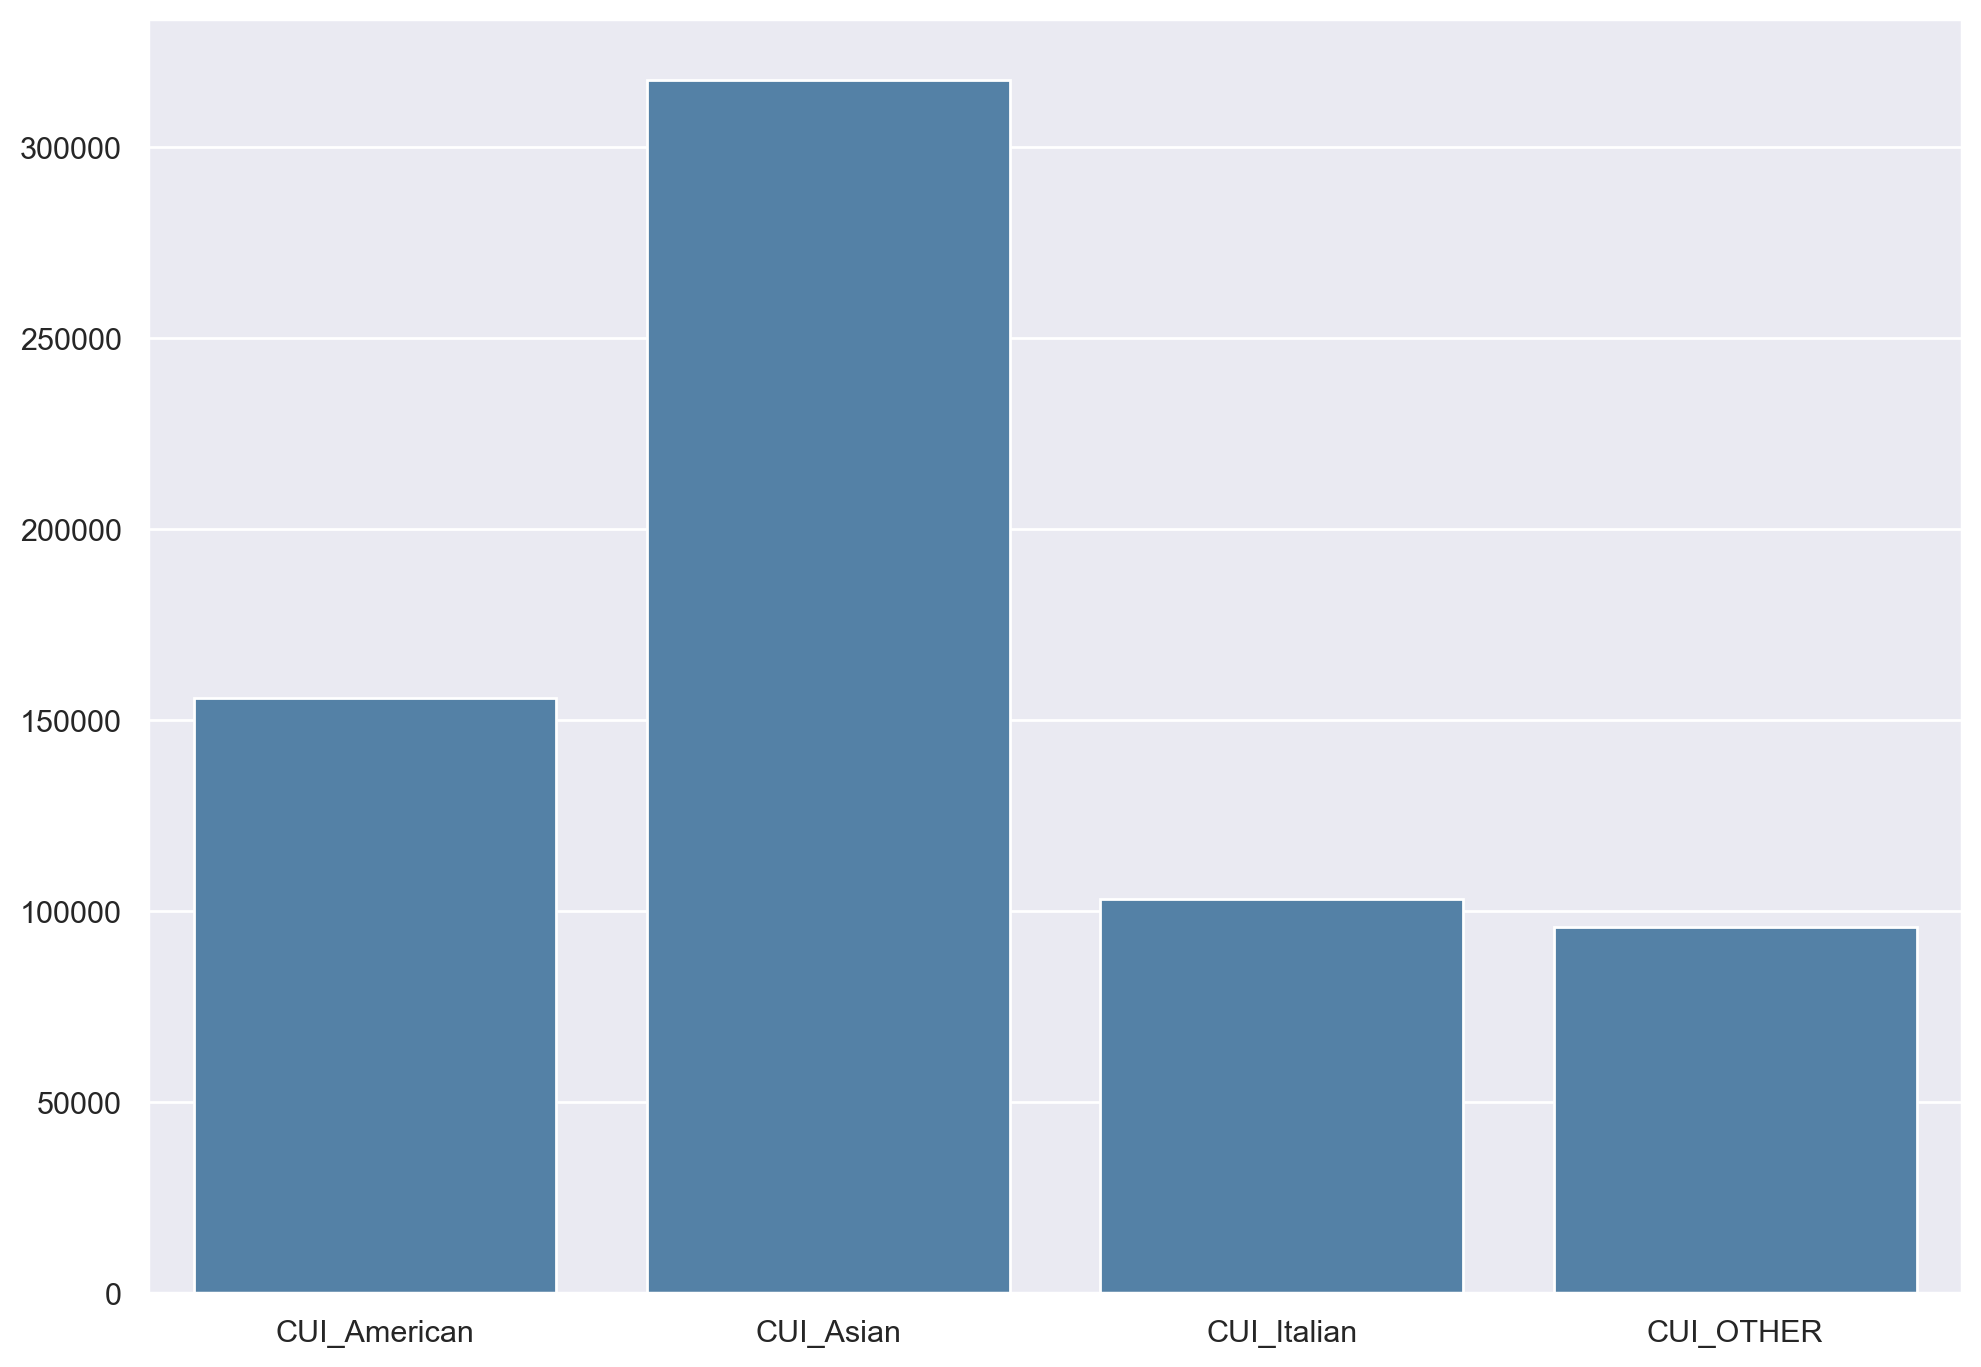

In [17]:
# Barplot with the total spending in the 4 generic cuisines
sns.barplot(x=df[['CUI_American', 'CUI_Asian', 'CUI_Italian', 'CUI_OTHER']].sum().index, y=df[['CUI_American', 'CUI_Asian', 'CUI_Italian', 'CUI_OTHER']].sum().values, color='steelblue')

Asian cuisine is leading in total spending by a huge margin, followed by American and Italian cuisines.

* **Other Interesting Insights**

In [18]:
# Healthy food on total spending
print(f"{round(df['CUI_Healthy'].sum()/total_spend*100, 2)}%")

4.51%


In [19]:
# Unhealthy food on total spending
print(f"{round(df[['CUI_Desserts', 'CUI_Street Food / Snacks']].sum().sum()/total_spend*100, 2)}%")

22.77%


In [20]:
# Cafe orders on total spending
print(f"{round(df['CUI_Cafe'].sum()/total_spend*100, 2)}%")

3.8%


In [21]:
# Japanese cuisine significance in total spending
print(f"{round(df['CUI_Japanese'].sum()/total_spend*100, 2)}%")

14.21%


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'CUI_Street Food / Snacks'),
  Text(1, 0, 'CUI_Beverages'),
  Text(2, 0, 'CUI_Healthy'),
  Text(3, 0, 'CUI_Desserts'),
  Text(4, 0, 'CUI_Cafe'),
  Text(5, 0, 'CUI_Chicken Dishes'),
  Text(6, 0, 'CUI_Noodle Dishes')])

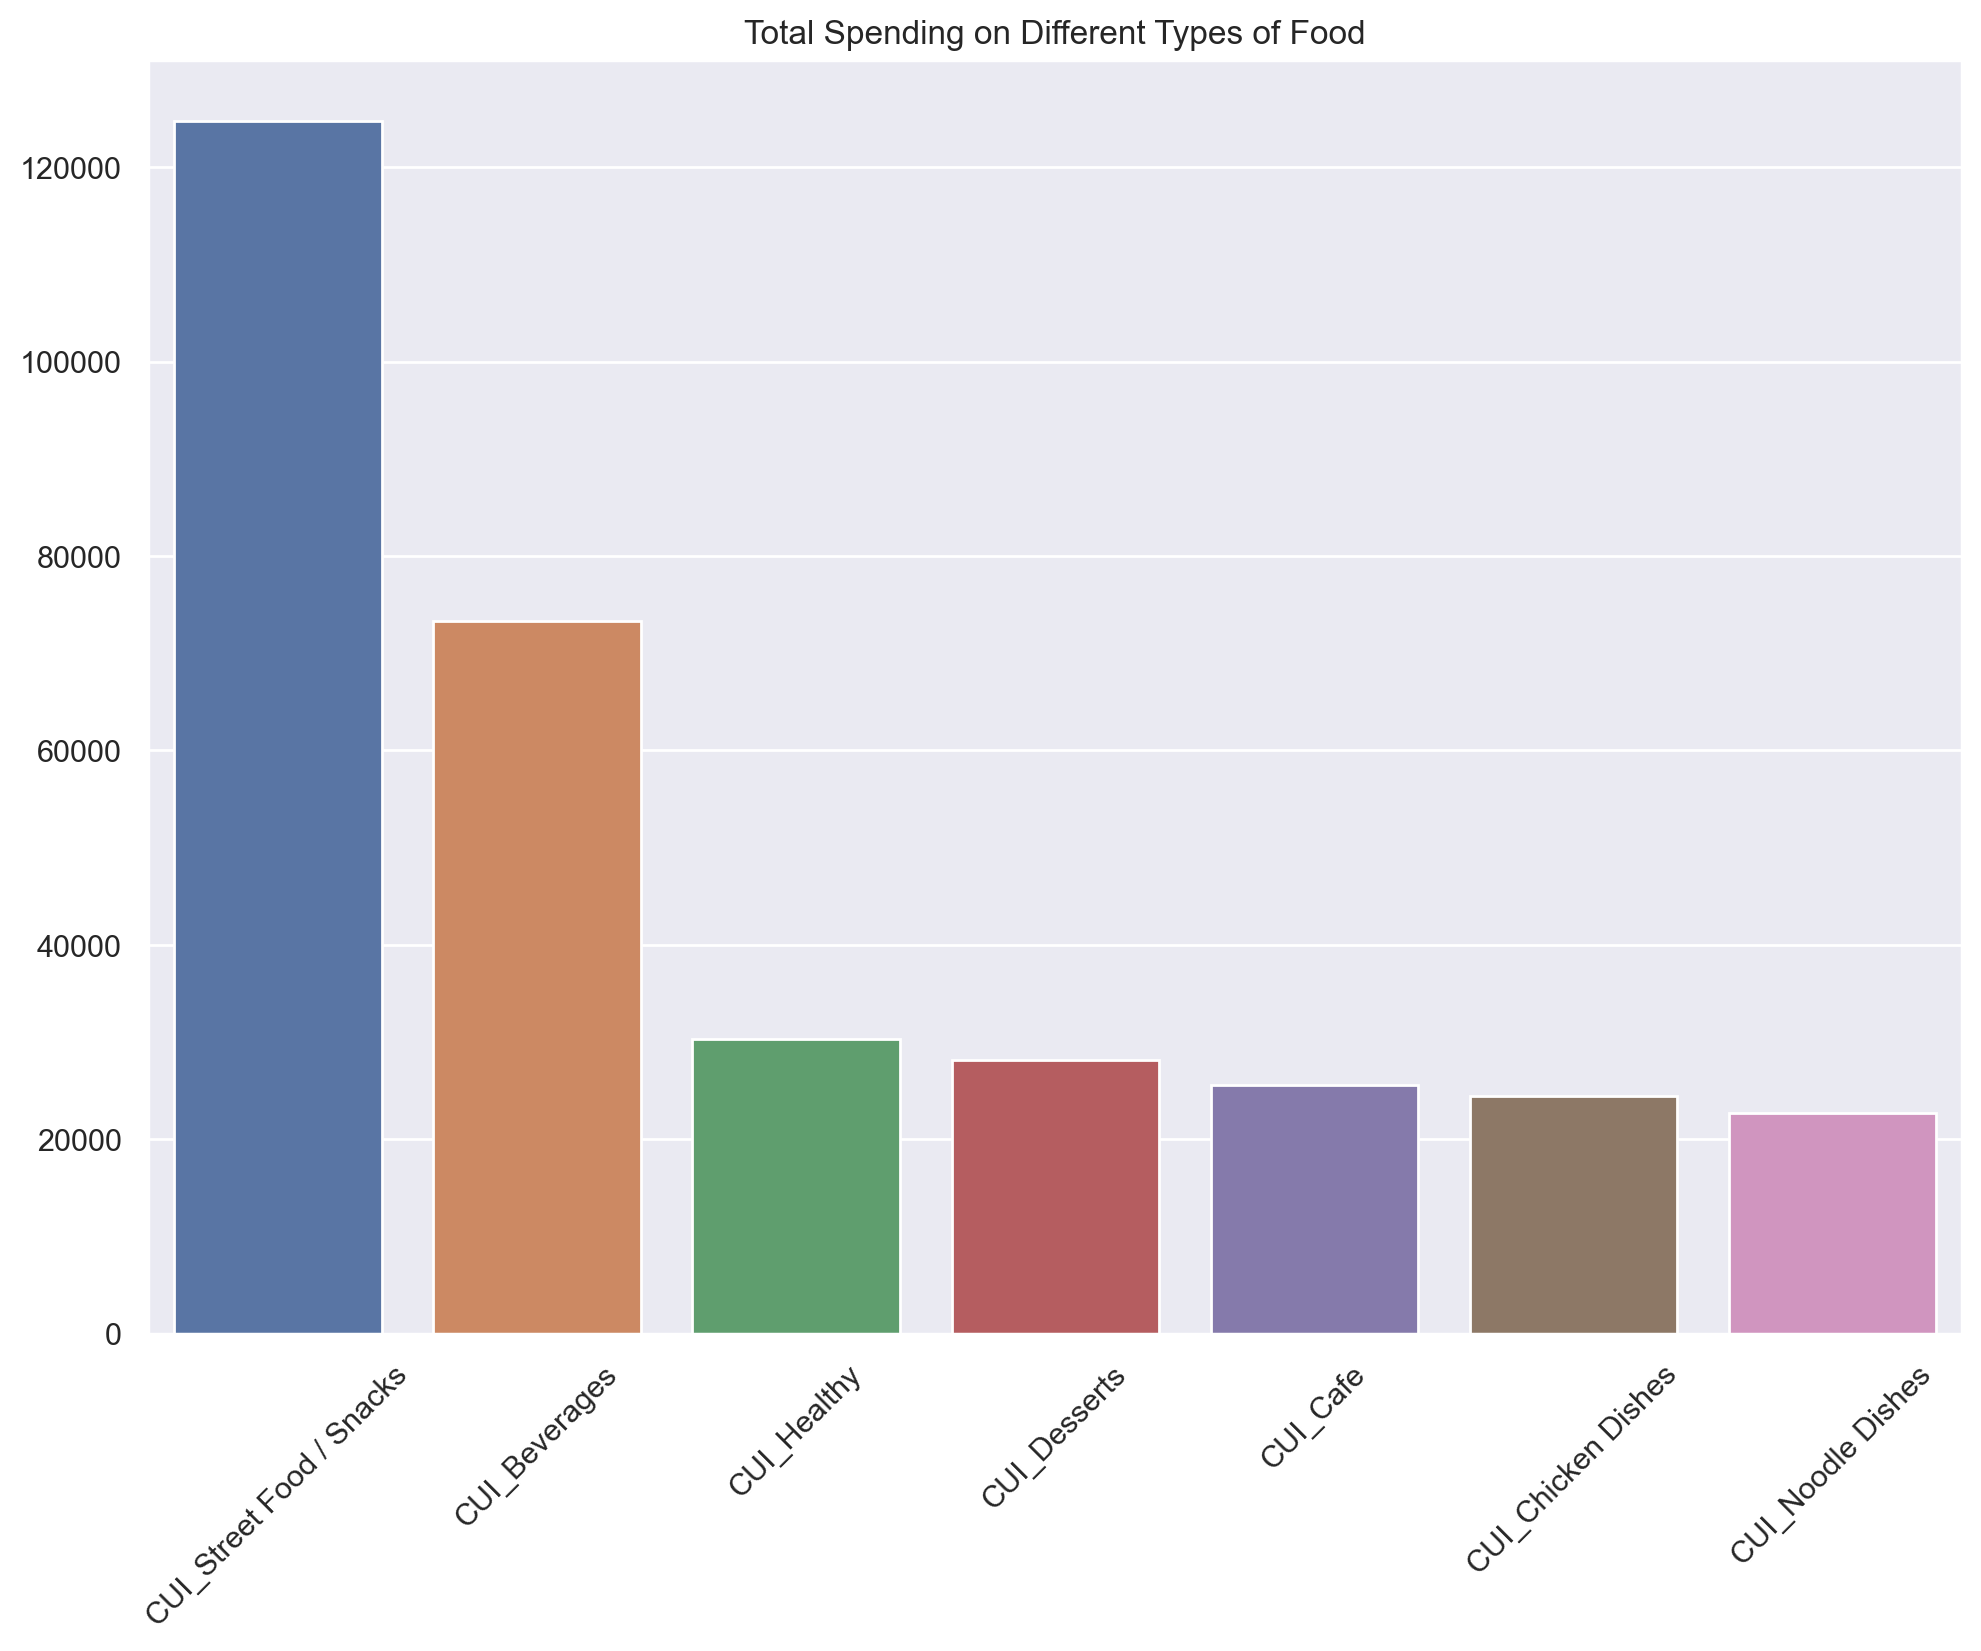

In [22]:
# Cuisines to be analyzed
tf = df[['CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Noodle Dishes', 'CUI_Street Food / Snacks']].sum().sort_values(ascending=False)

# Plotting the bar chart for the selected cuisines
sns.barplot(x=tf.index, y=tf.values)

# Formatting the plot
plt.title('Total Spending on Different Types of Food')
plt.xticks(rotation = 45)

## 3.2 Features' Distributions <a class="anchor" id="3.2"></a>

* Separating metric and non-metric features

In [23]:
non_metric_features = ["customer_region", "last_promo", "payment_method"] #categorical
metric_features = df.columns.drop(non_metric_features).to_list() #numeric

print('Non-metric features: {}, and metric features: {} in the dataset'.format(non_metric_features, metric_features))

Non-metric features: ['customer_region', 'last_promo', 'payment_method'], and metric features: ['customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23'] in the dataset


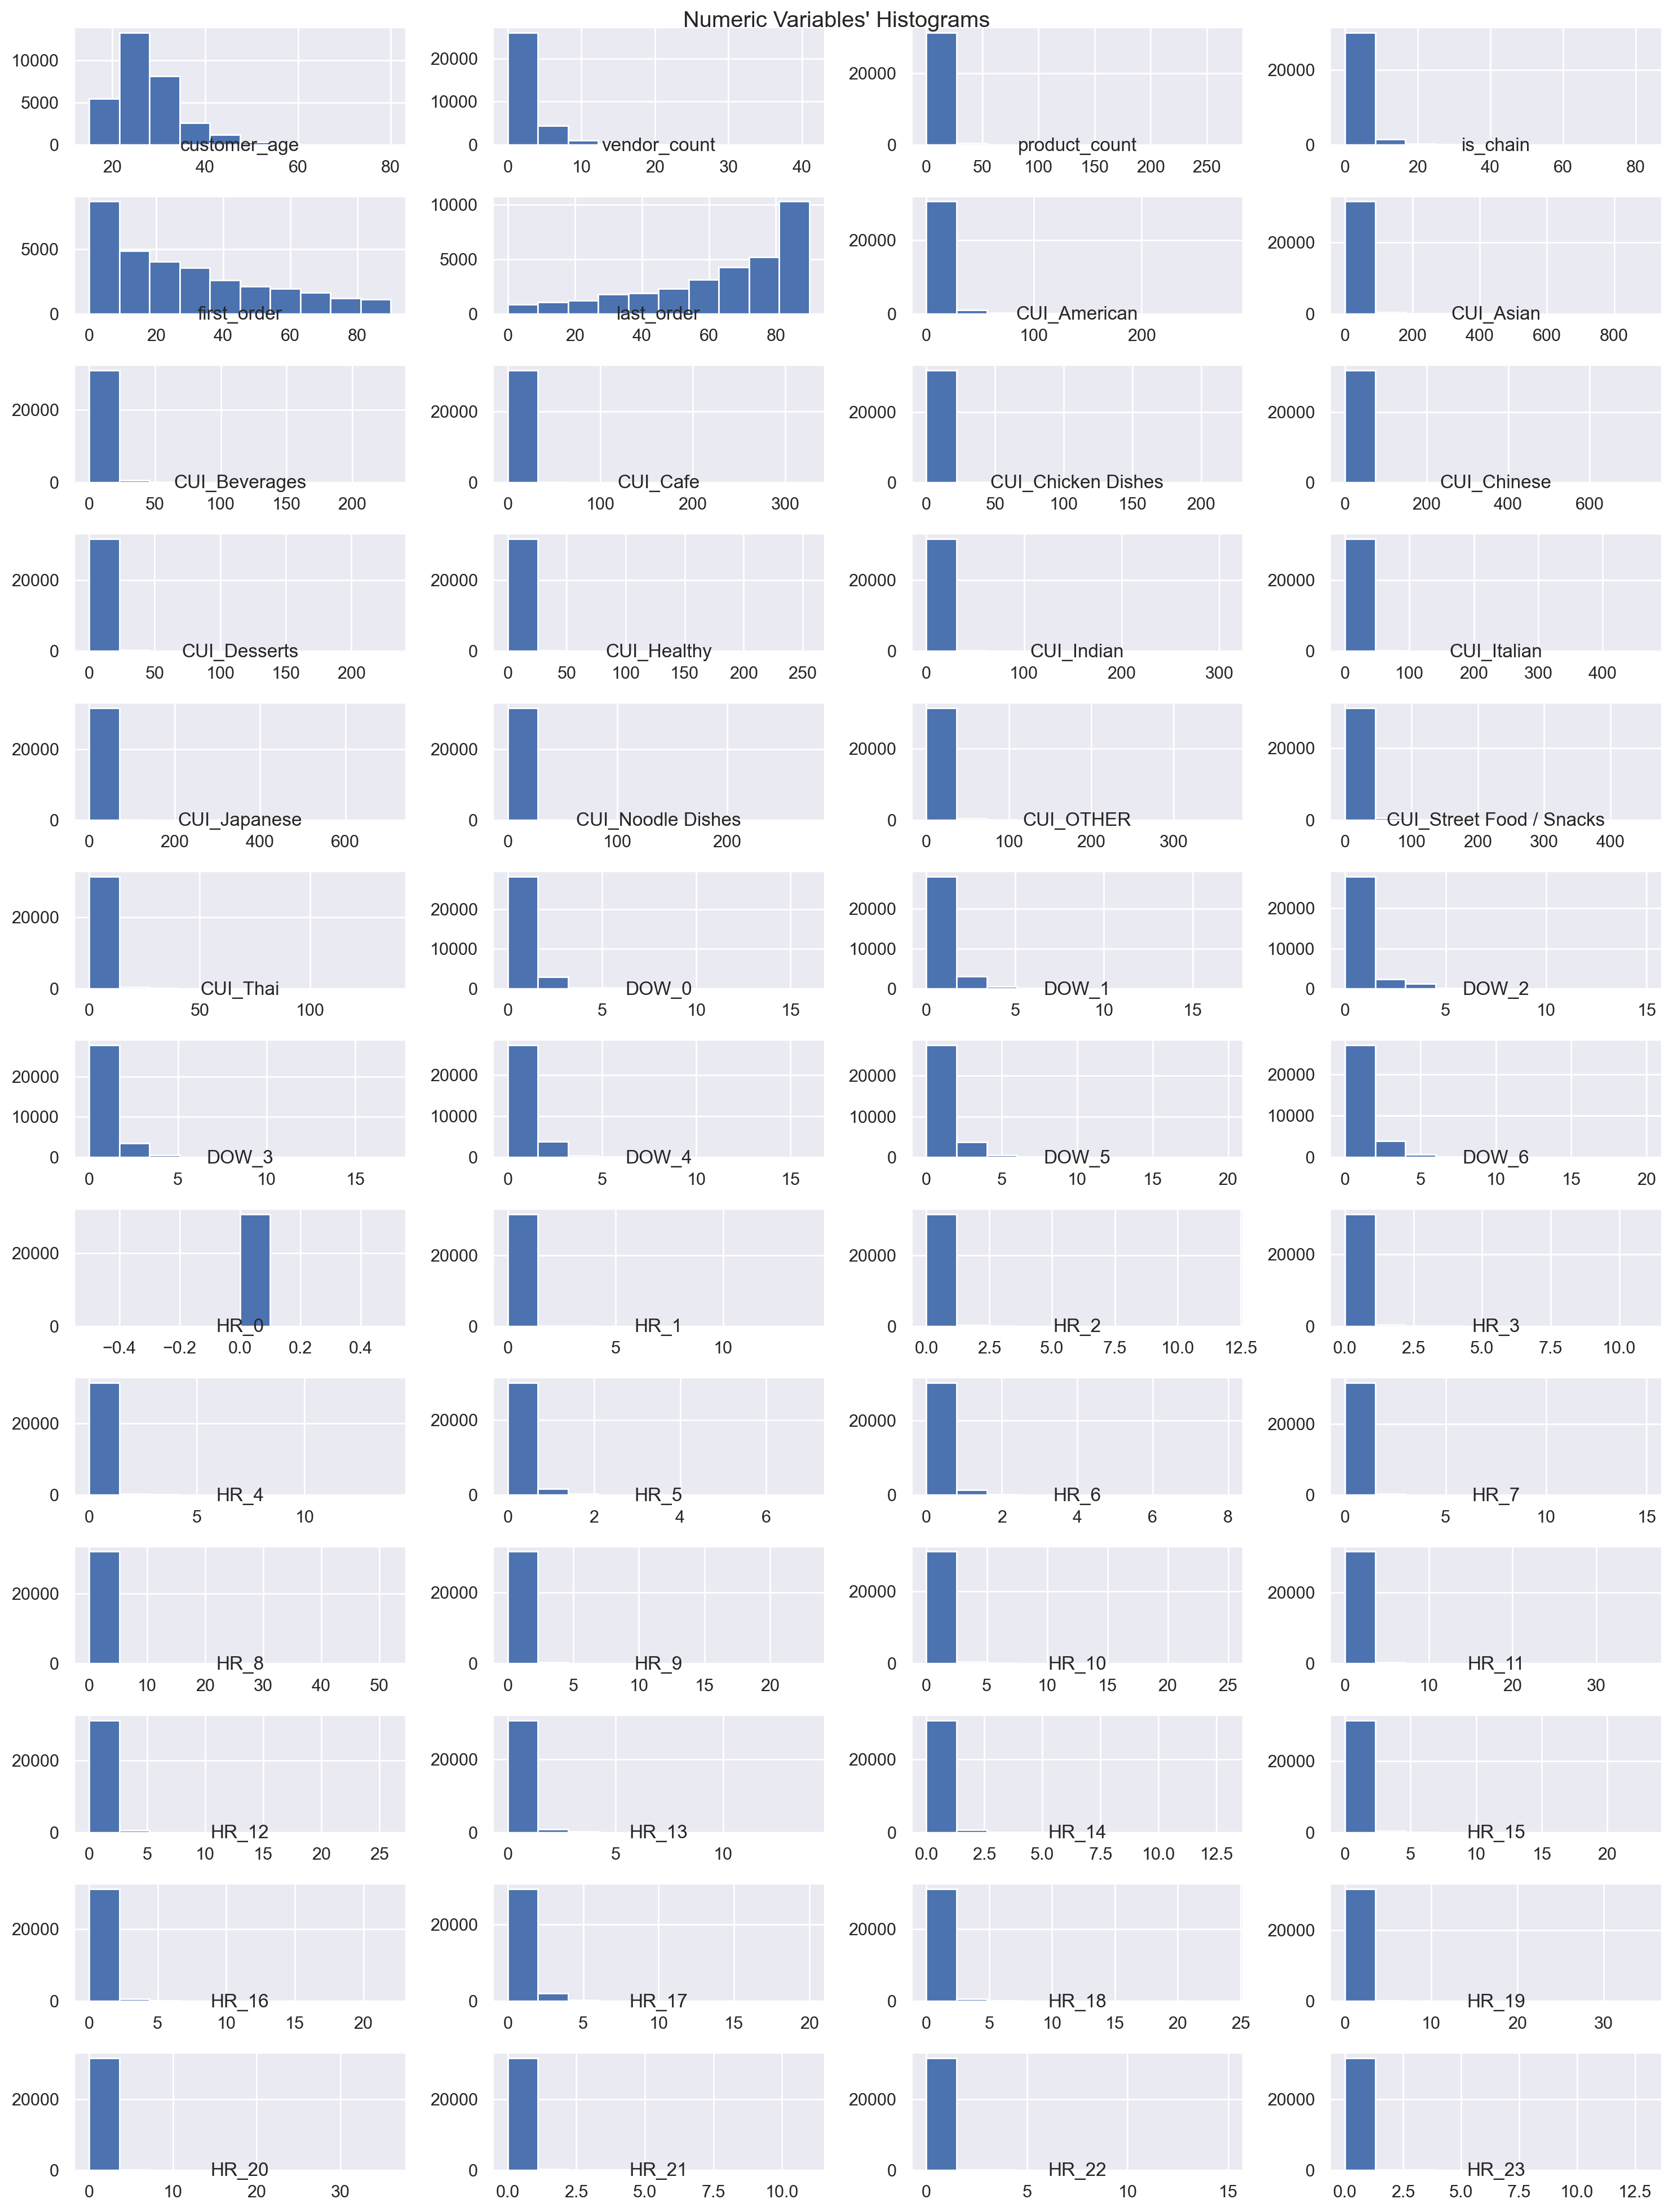

In [24]:
# Creating a grid of subplots
fig, axes = plt.subplots(13, 4, figsize=(15, 20), tight_layout=True)

# Iterating through the axes and the feature names to plot histograms
for ax, feat in zip(axes.flatten(), metric_features):
    # Cleaning the data by replacing infinite values with NaN and dropping NaNs
    cleaned_data = df[feat].replace([np.inf, -np.inf], np.nan).dropna()
    
    # Only plotting the histogram if there is data available
    if len(cleaned_data) > 0:
        ax.hist(cleaned_data)  # Plotting the histogram for the cleaned data
        ax.set_title(feat, y=-0.13)  # Setting the title for the subplot, slightly below the axis
        
    else:
        ax.set_title(f'{feat} (no data)', y=-0.13)  # Indicating no data available
        ax.axis('off')  # Turning off the axis if there's no data

# Adding a centered title for the entire figure
plt.suptitle("Numeric Variables' Histograms")

# Checking if the output directory exists; if not, create it
output_dir = os.path.join('..', 'figures', 'eda')
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Displaying the figure
plt.show()

|      |   customer_region |
|:-----|------------------:|
| 8670 |              9761 |
| 4660 |              9550 |
| 2360 |              8829 |
| 2440 |              1483 |
| 4140 |               857 |
| 8370 |               495 |
| 2490 |               445 |
| -    |               442 |
| 8550 |                26 |


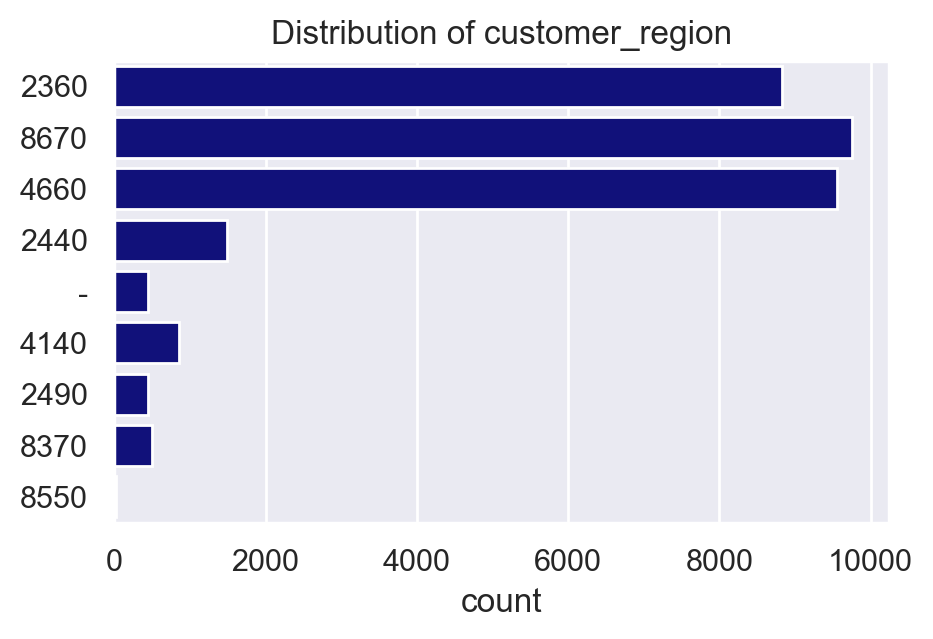

---------------------------------------------------------------------------------------------
|          |   last_promo |
|:---------|-------------:|
| -        |        16748 |
| DELIVERY |         6286 |
| DISCOUNT |         4496 |
| FREEBIE  |         4358 |


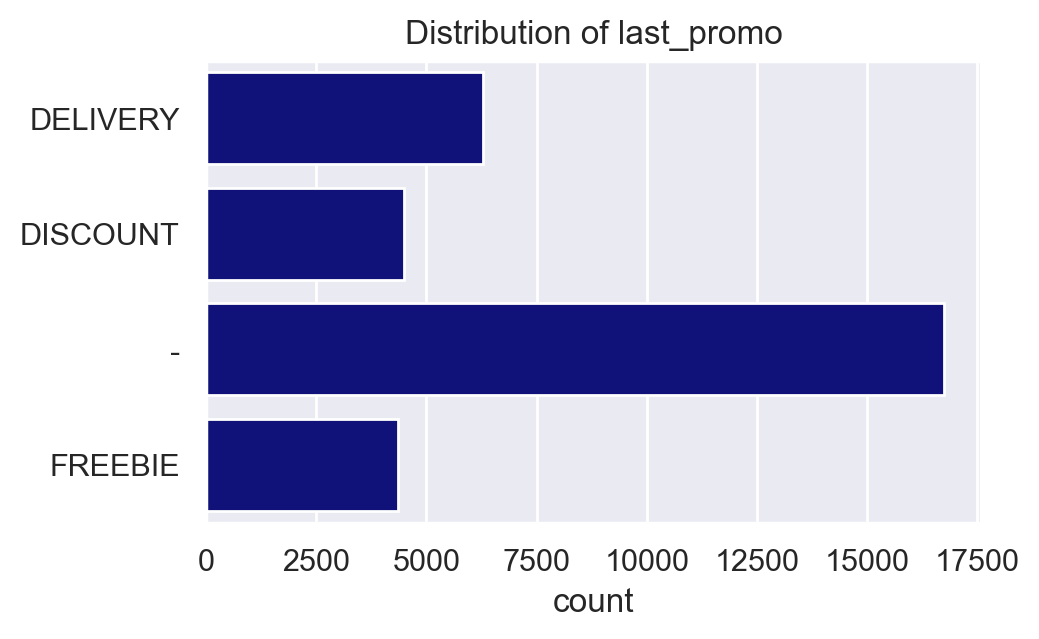

---------------------------------------------------------------------------------------------
|      |   payment_method |
|:-----|-----------------:|
| CARD |            20161 |
| DIGI |             6101 |
| CASH |             5626 |


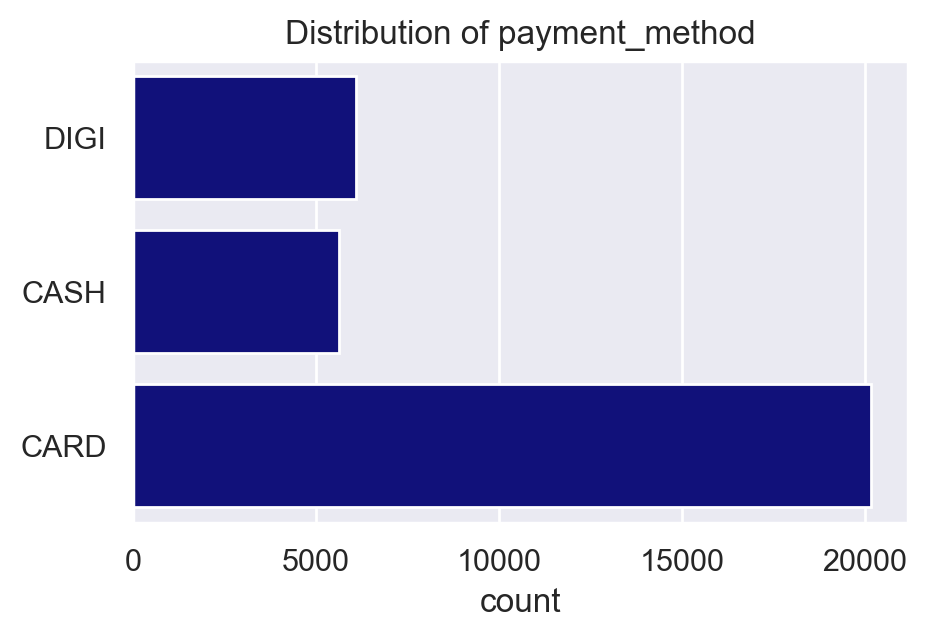

---------------------------------------------------------------------------------------------


In [25]:
# Loop through each non-metric feature
for col in non_metric_features:
    # Print value counts as a Markdown table
    print(df[col].value_counts().to_markdown())
    
    # Create a countplot
    plt.figure(figsize=(5, 3))
    plt.title(f'Distribution of {col}')
    sns.countplot(y=col, data=df, color="darkblue")
    plt.ylabel('')  
    plt.show()
    
    print('-' * 93)  # Separator for better output readability

**Customer Region:**
* An unspecified region (-) accounts for 442 entries, which could represent missing or unclassified data.

**Last Promo:**
* A significant portion (16,748 entries) has no recorded promotional activity (-), making up over 50% of the dataset.


## 3.3. Coherence Check <a class="anchor" id="3.3"></a>

* Checking if DOW total orders are always bigger or equal to HR total orders:

In [26]:
dow_columns = [f'DOW_{i}' for i in range(7)]
hr_columns = [f'HR_{i}' for i in range(24)]

# Checking if DOW total orders are always bigger or equal than HR total orders
len(df[df[dow_columns].sum(axis=1).astype(int) >= df[hr_columns].sum(axis=1).astype(int)]) == df.shape[0]

True

* Checking for customers with 0 orders:

In [27]:
# Seeing if there are customers with 0 orders
df["product_count"].value_counts().sort_index(ascending=True)[0]

156

There are 156 customers in our dataset whom haven't ordered anything yet. Customers with 0 products ordered are strange cases because they are registered in the database but haven't ordered any products yet.

* Customers with 0 vendors:

In [28]:
# Seeing if there are customers with 0 vendors
df["vendor_count"].value_counts().sort_index(ascending=True)[0]

138

There are 138 cases where customers have ordered from 0 vendors. This is also strange.

* Customers that haven't spent money in any cuisine:

In [29]:
cuisine_columns = [col for col in df.columns if col.startswith('CUI_')]

# Seeing if there are customers who haven't spent any money in any cuisine
len(df[df[cuisine_columns].sum(axis=1) == 0])

138

This value (138) matches the previous number of cases where customers have ordered from 0 vendors. Let's check if the rows are the same.

In [30]:
df[df["vendor_count"] == 0].equals(df[df[cuisine_columns].sum(axis=1) == 0])

True

They are indeed the same customers.

* Checking for customers who have a product count lower than their order count:

In [31]:
# Seeing if there are customers with a product count lower than their order count
len(df[df['product_count'] < df[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']].sum(axis=1)])

18

A total of 18 customers meet this description, which is also strange because "n" orders should have associated at least "n" products.

We will now explore the age and region of these customers. 
We will consider anomalies: 
 * All duplicate observations 
 * People who are registered but haven't ordered yet 
 * Inconsistent values, such as people whose product count is lower than the order counts.

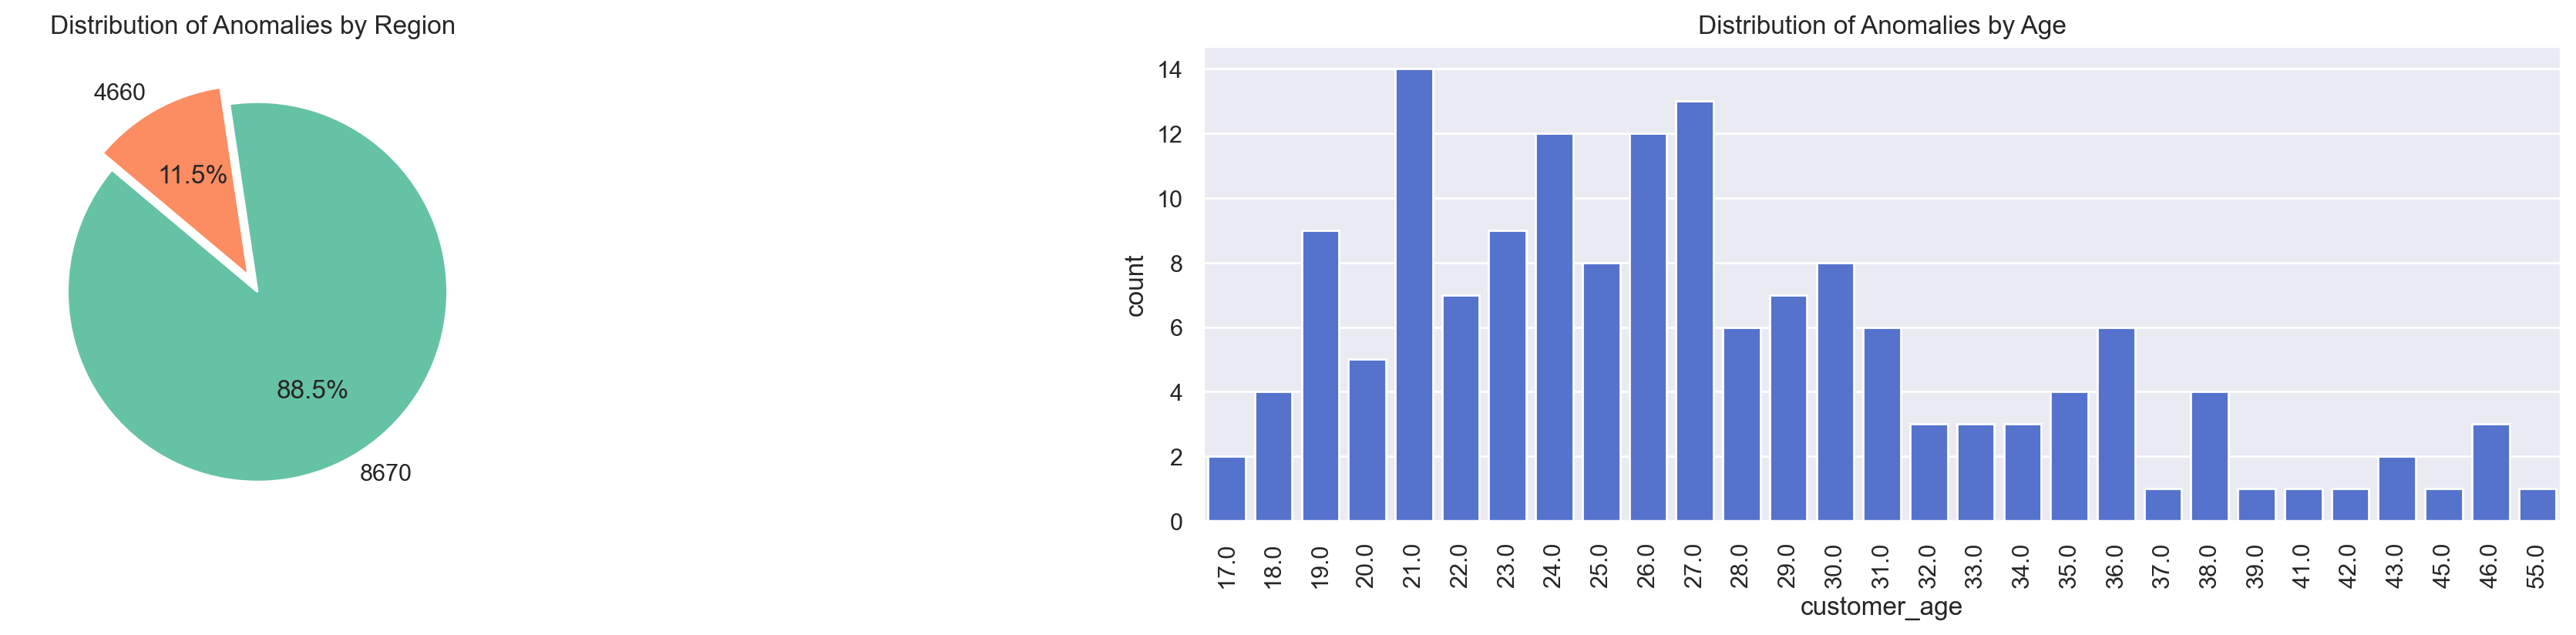

In [32]:
# DF with the anomalies found
anomalies = df[(df["product_count"] == 0) | (df["vendor_count"] == 0) | (df['product_count'] < df[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']].sum(axis=1))]

# Region counts of the anomalies
region_counts = anomalies['customer_region'].value_counts()

total_anomalies = region_counts.sum()

# Identify regions with less than 10% occurrence
low_occurrence_regions = region_counts[region_counts < 0.10 * total_anomalies]

# Group low occurrence regions into "Other"
region_counts_grouped = region_counts.copy()
region_counts_grouped['Other'] = low_occurrence_regions.sum()
region_counts_grouped = region_counts_grouped[region_counts_grouped >= 0.10 * total_anomalies]

# Defining the color palette
palette_color = sns.color_palette('Set2')

# Creating the subplots
fig, axs = plt.subplots(1, 2, figsize=(25, 4))

# Plotting the distribution of anomalies by region
axs[0].pie(region_counts_grouped, labels=region_counts_grouped.index, autopct='%1.1f%%', startangle=140,
           colors=palette_color, explode=[0.05 if label in ['8670', 'Other', '4660'] else 0 for label in region_counts_grouped.index])
axs[0].set_title('Distribution of Anomalies by Region')

# Plotting the distribution of anomalies by age
sns.countplot(data=anomalies, x='customer_age', ax=axs[1], color="royalblue")
plt.xticks(rotation=90)
axs[1].set_title('Distribution of Anomalies by Age')

plt.show()

## 3.4. Outliers Check <a class="anchor" id="3.4"></a>

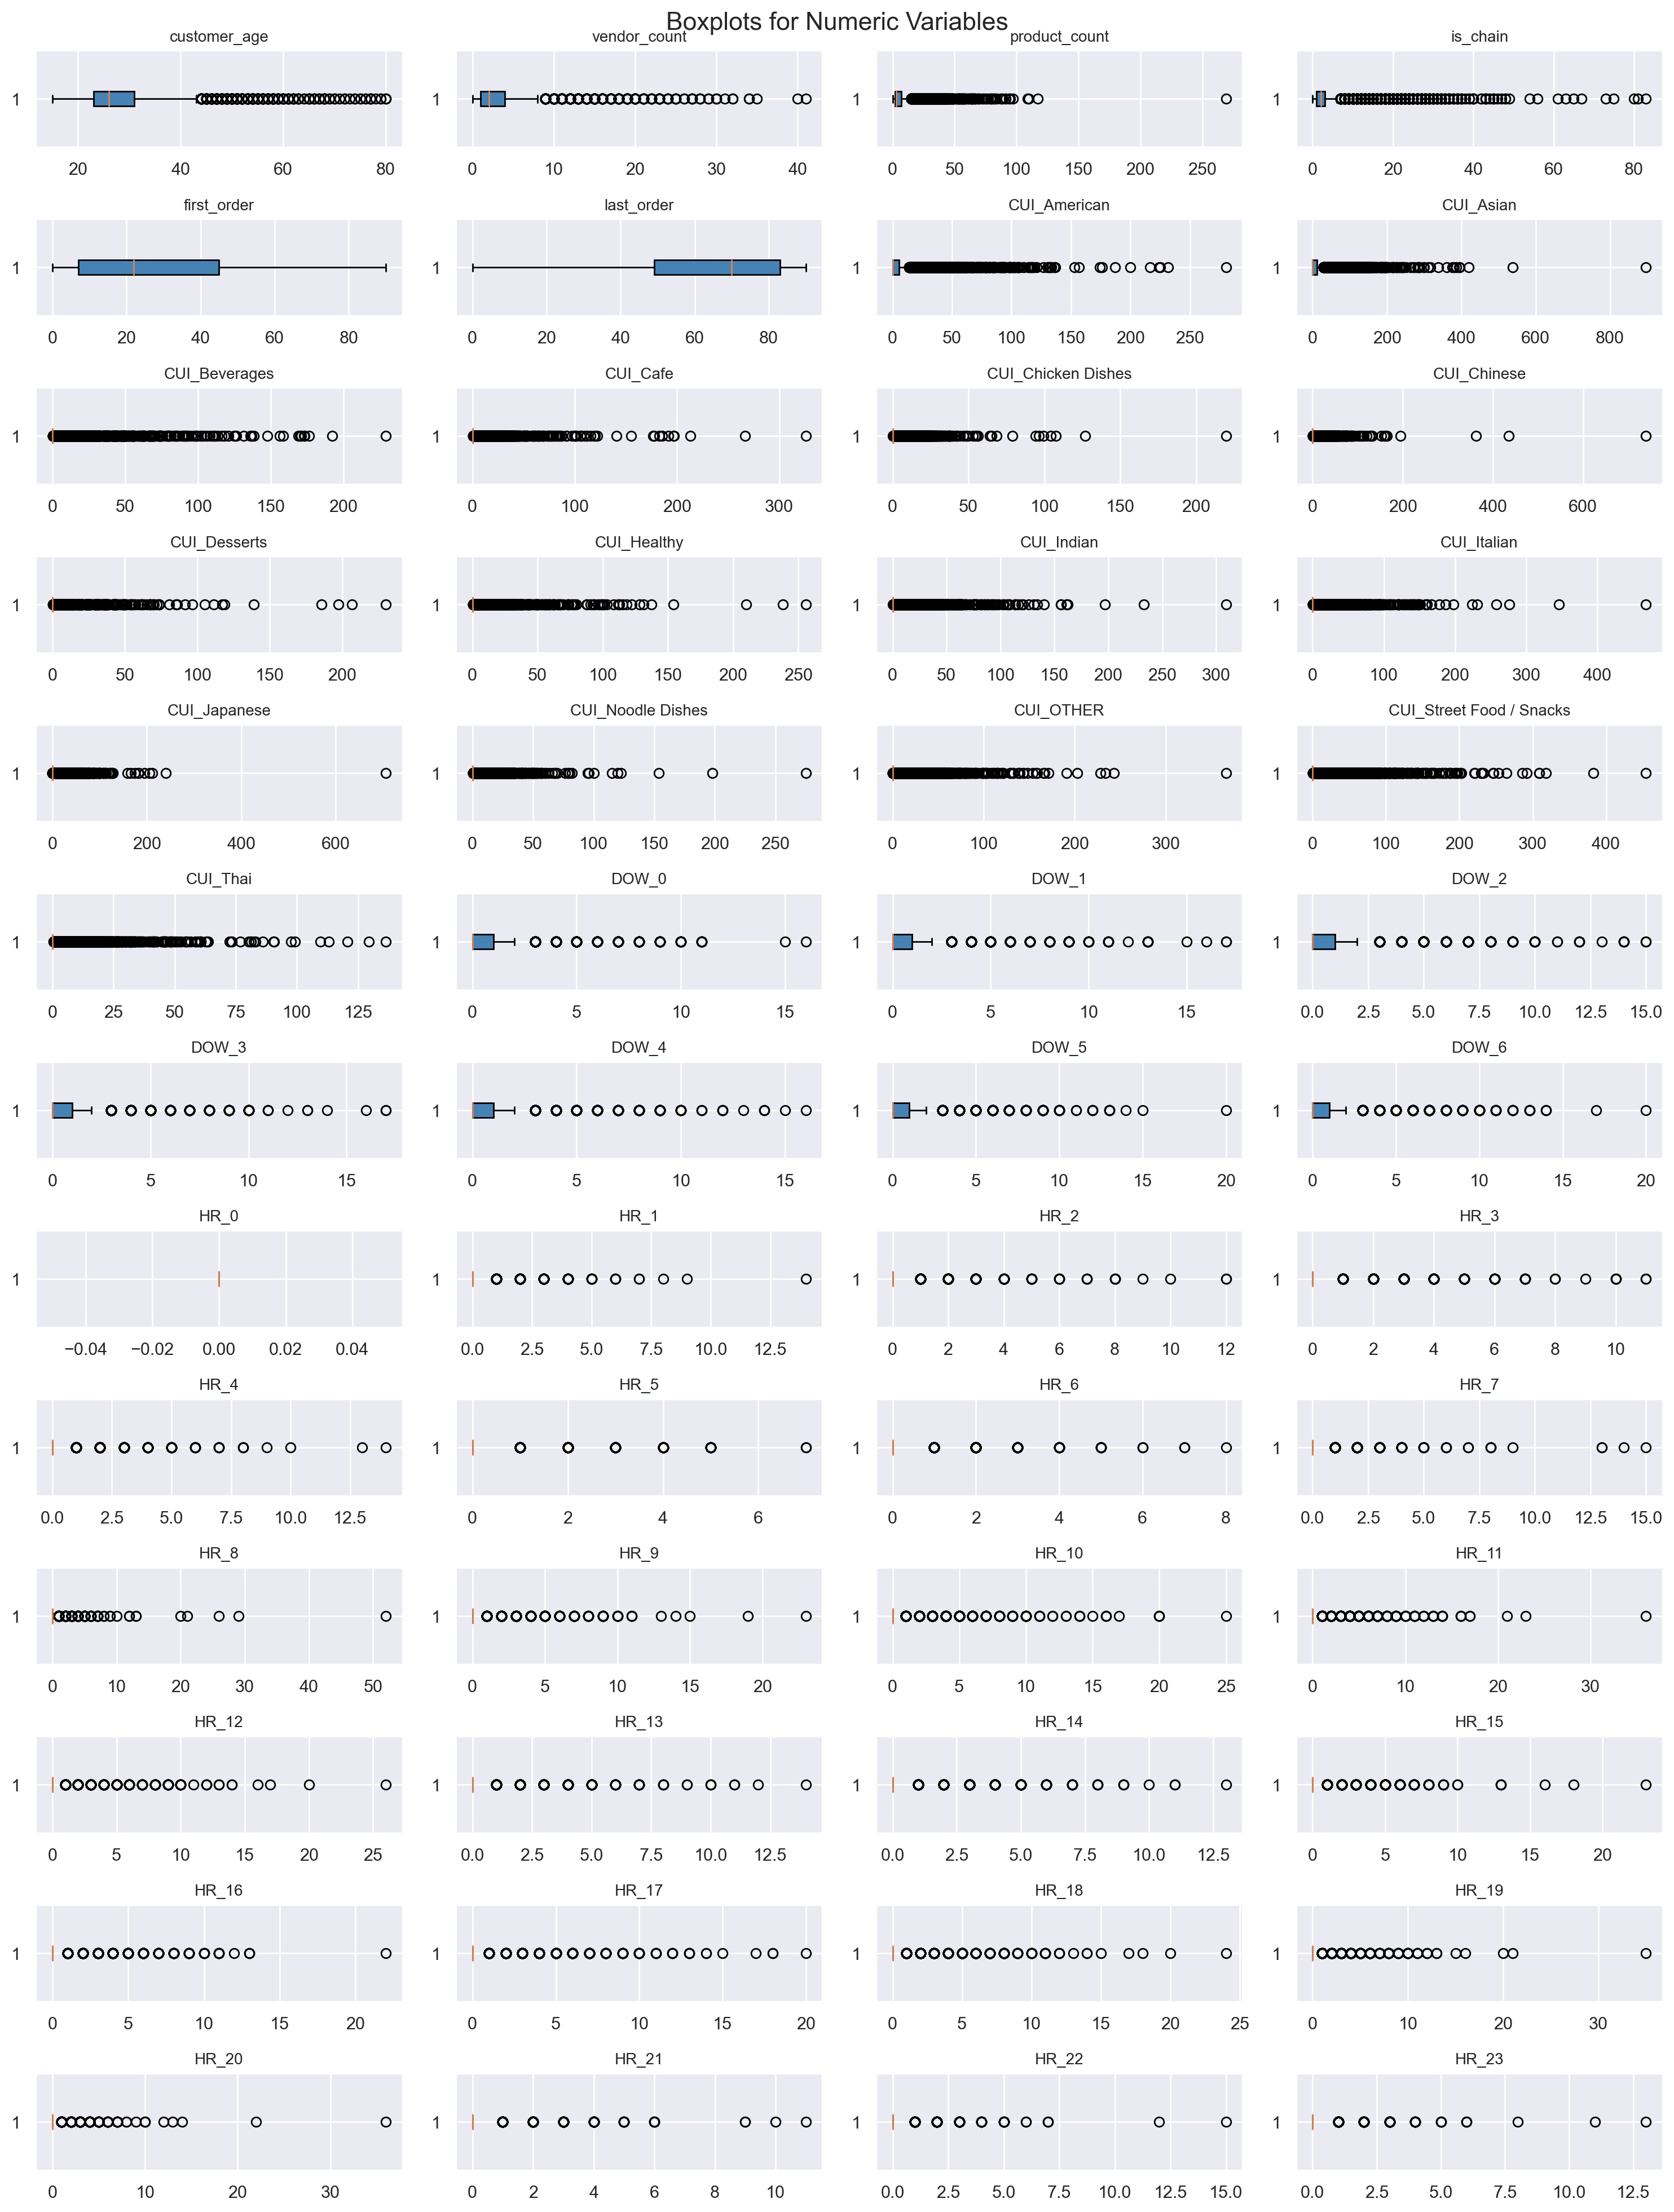

In [33]:
# Creating a grid of subplots for boxplots
fig, axes = plt.subplots(13, 4, figsize=(15, 20), tight_layout=True)

# Flattening axes for easier iteration
axes = axes.flatten()

# Iterating through the axes and the feature names to plot boxplots
for ax, feat in zip(axes, metric_features):
    # Cleaning the data by replacing infinite values with NaN and dropping NaNs
    cleaned_data = df[feat].replace([np.inf, -np.inf], np.nan).dropna()
    
    # Only plotting the boxplot if there is data available
    if not cleaned_data.empty:
        ax.boxplot(cleaned_data, vert=False, patch_artist=True, boxprops=dict(facecolor="steelblue"))
        ax.set_title(feat, fontsize=10, loc='center')  # Setting the title for the subplot
        ax.set_xlabel("")  # No xlabel to save space
    else:
        ax.set_title(f'{feat} (no data)', fontsize=10)  # Indicating no data available
        ax.axis('off')  # Turning off the axis if there's no data

# Hide any unused subplots
for ax in axes[len(metric_features):]:
    ax.axis('off')

# Adding a centered title for the entire figure
plt.suptitle("Boxplots for Numeric Variables", fontsize=16)

# Displaying the figure
plt.show()

We can observe the presence of outliers in most boxplots. On the next section, we will provide a more detailed treatment for these values.

<a class="anchor" id="forth-bullet">

# 4. Data Preprocessing

##  4.1. Handling Troublesome Values <a class="anchor" id="4.1"></a>

###  4.1.1 Dropping Anomalies <a class="anchor" id="4.1.2"></a>

In [34]:
# Checking for duplicates
df.duplicated().sum()

60

In [35]:
print(df[df.duplicated()])

            customer_region  customer_age  vendor_count  ...  HR_21  HR_22  HR_23
customer_id                                              ...                     
4336560739             2360          24.0             1  ...      0      0      0
dcc76a0a1b             4660          32.0             3  ...      0      0      0
b55012ee1c             8550          23.0             4  ...      0      0      0
a59a79af83             4660          25.0             4  ...      0      0      0
49a726df01             2360          29.0            11  ...      0      0      1
ef521b81c9             2360          35.0             4  ...      1      1      0
726f00c63b             2360          32.0             9  ...      0      3      0
f841c19db0             8670          19.0             6  ...      0      0      0
7a6db42ede             4660          31.0             4  ...      0      0      0
24251eb7da             8550          28.0             4  ...      0      0      0
d061dc5798      

* Remark: Duplicates appear in pairs (they have the same information as some other observation in the dataset, only different id's). We decided to drop one of them, since they're adding redundant information to the dataset, giving more weight to specific behaviours.

In [36]:
# Storing duplicate rows
df_duplicated = df[df.duplicated()]

# Dropping duplicates
df.drop_duplicates(inplace=True)

We previously considered anomalies all duplicate observations, people who are registered but haven't ordered yet, and inconsistent values such as people whose product count is lower than the order counts.

In [37]:
# Assuming 'anomalies' contains rows removed from the original df
original_size = df.shape[0]  # Total rows before removing anomalies
cleaned_size = df.shape[0] - anomalies.shape[0]  # Rows left after removing anomalies

# Calculate the percentage of data retained
percentage_kept = 100 * (cleaned_size / original_size)

print('Percentage of data kept after removing anomalies:', np.round(percentage_kept, 4))

Percentage of data kept after removing anomalies: 99.5099


We lose less than 1% of our data, thereby concluding it is not troublesome to drop these rows.

#NOTE: Anomalies have not been drop yet, only duplicate values, but the percentage is calculated here. Should we drop them next?

###  4.1.2 Handling Missing Values <a class="anchor" id="4.1.2"></a>

In [38]:
# Check for missing values
missing_summary = df.isnull().sum()
print(f"Missing values per column:\n{missing_summary}")

Missing values per column:
customer_region                0
customer_age                 727
vendor_count                   0
product_count                  0
is_chain                       0
first_order                  106
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                   0
CUI_Asian                      0
CUI_Beverages                  0
CUI_Cafe                       0
CUI_Chicken Dishes             0
CUI_Chinese                    0
CUI_Desserts                   0
CUI_Healthy                    0
CUI_Indian                     0
CUI_Italian                    0
CUI_Japanese                   0
CUI_Noodle Dishes              0
CUI_OTHER                      0
CUI_Street Food / Snacks       0
CUI_Thai                       0
DOW_0                          0
DOW_1                          0
DOW_2                          0
DOW_3                          0
DOW_4                          0
DOW_5           

* Check for strange values:

In [39]:
df["customer_region"].value_counts()

8670    9748
4660    9533
2360    8815
2440    1482
4140     856
8370     495
2490     444
-        442
8550      13
Name: customer_region, dtype: int64

**Missing values in the following columns:**
- customer_age - 727
- first_order - 106 
- HR_0 - 1165
- customer region - 442

### customer_age:

In [40]:
df[["customer_age"]].dtypes

customer_age    float64
dtype: object

In [41]:
#df_customer_age = df["customer_age"].fillna(0).replace([float('inf'), -float('inf')], 0).astype(int)
df_customer_age = df["customer_age"].dropna().astype(int)

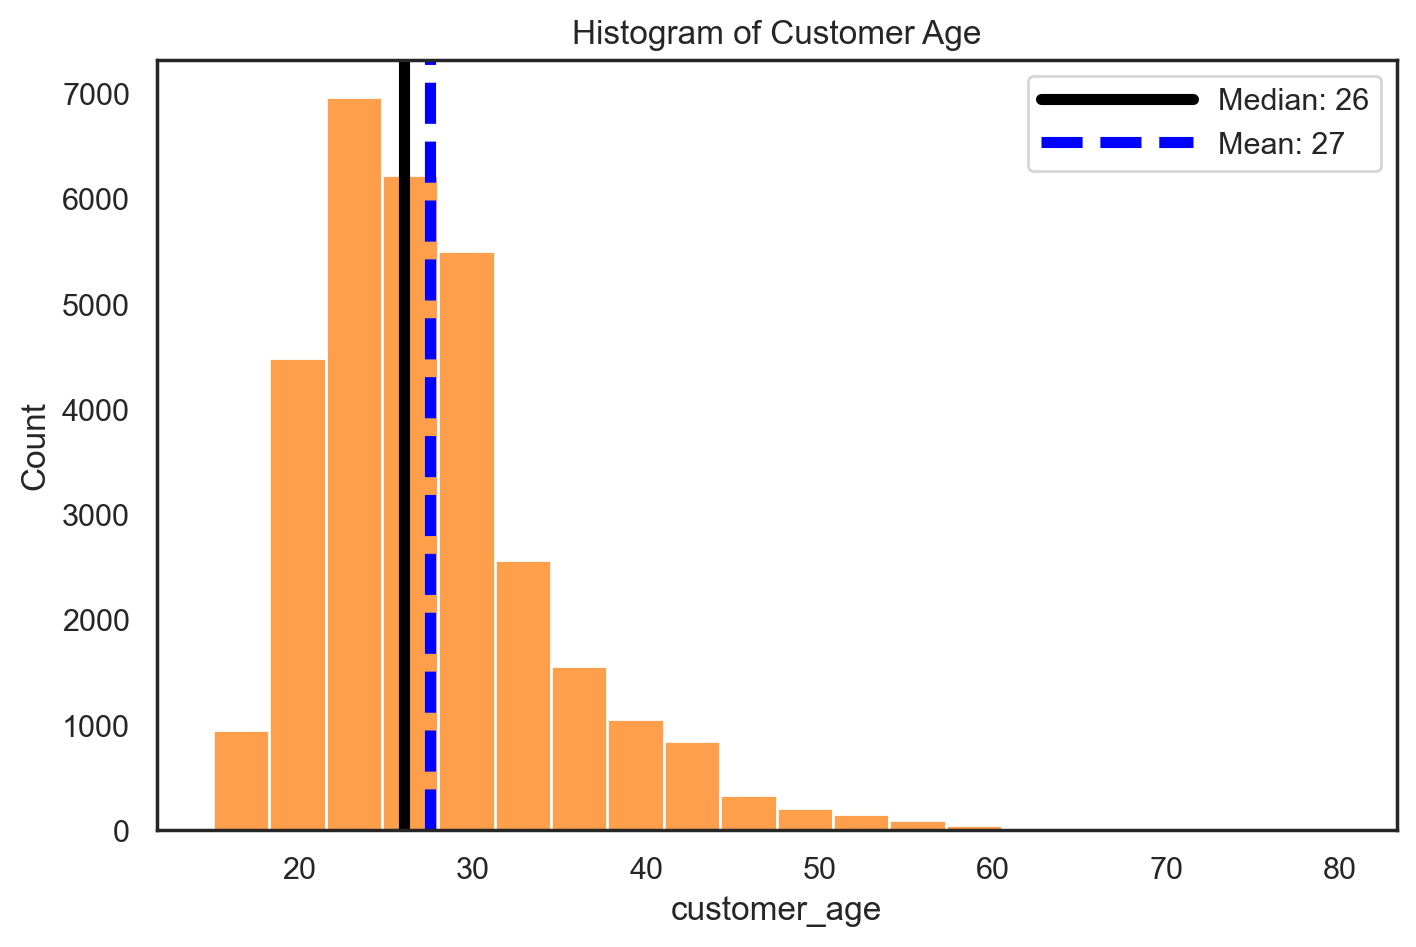

In [42]:
# Calculate statistics
median_age = np.median(df_customer_age)
mean_age = np.mean(df_customer_age)

# Set up the plot
sns.set_theme(style="white", palette=None)
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the histogram
sns.histplot(df['customer_age'], bins=20, ax=ax, color='tab:orange')

# Add vertical lines for median and mean
ax.axvline(median_age, color='black', linewidth=4,
           label=f'Median: {int(median_age)}')
ax.axvline(mean_age, color='blue', linestyle='dashed', linewidth=4,
           label=f'Mean: {int(mean_age)}')

# Add legend and title
ax.legend(handlelength=5)
ax.set_title("Histogram of Customer Age")

# Show the plot
plt.show()

# Reset seaborn to default
sns.set()

For this feature, there is no significant difference between median or mean. 

In [43]:
df['customer_age'] = df['customer_age'].fillna(df['customer_age'].median())

### **first_order:**

In [44]:
df[["first_order"]].dtypes

first_order    float64
dtype: object

In [45]:
# dropping NaN
df_first_order = df["first_order"].dropna().astype(int)

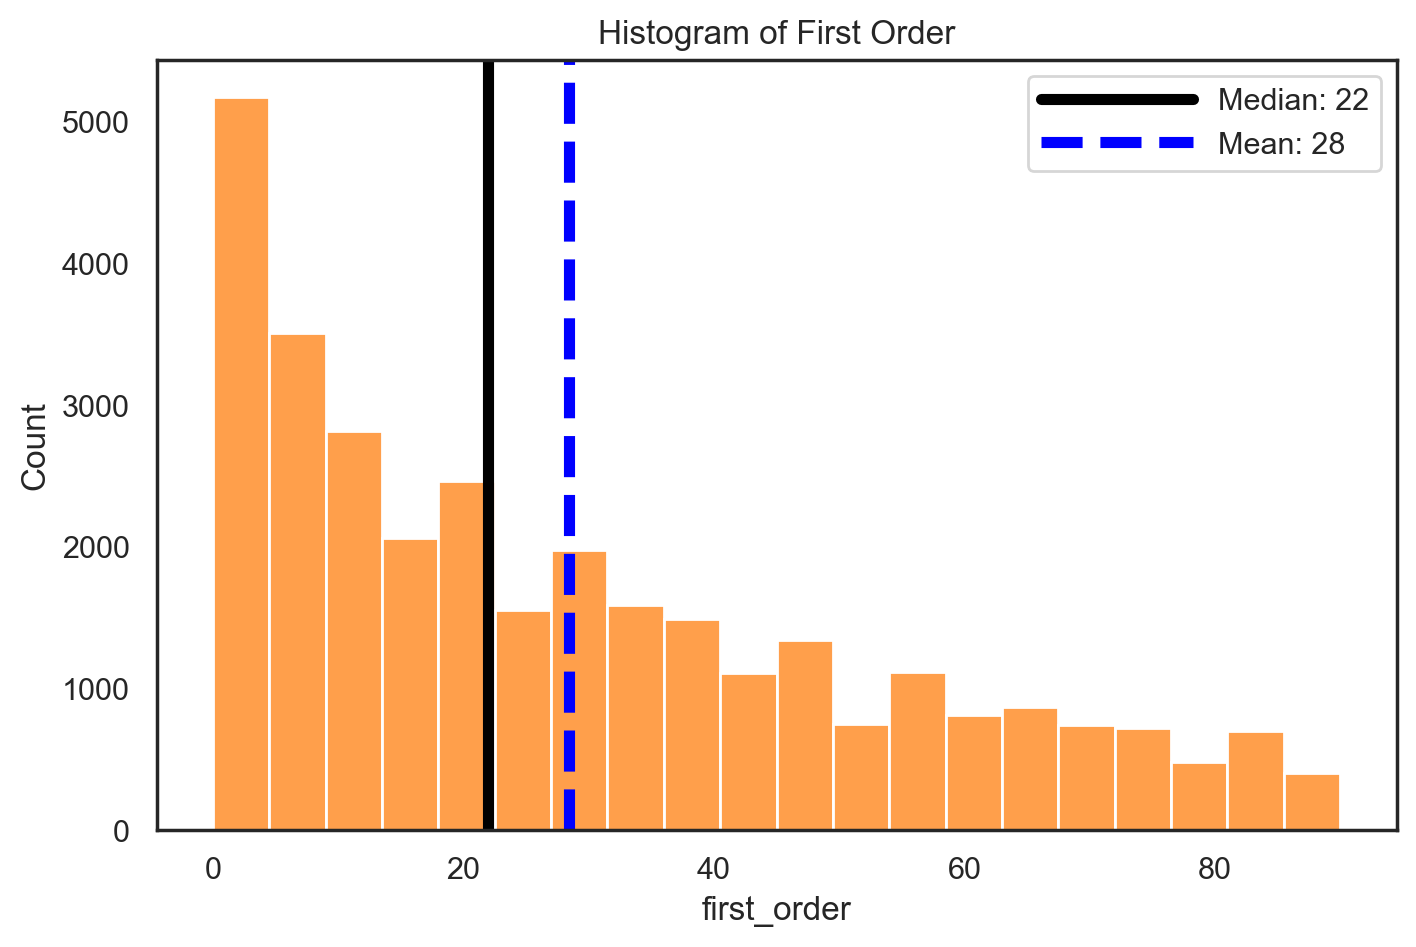

In [46]:
# Calculate statistics
median_age = np.median(df_first_order)
mean_age = np.mean(df_first_order)

# Set up the plot
sns.set_theme(style="white", palette=None)
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the histogram
sns.histplot(df['first_order'], bins=20, ax=ax, color='tab:orange')

# Add vertical lines for median and mean
ax.axvline(median_age, color='black', linewidth=4,
           label=f'Median: {int(median_age)}')
ax.axvline(mean_age, color='blue', linestyle='dashed', linewidth=4,
           label=f'Mean: {int(mean_age)}')

# Add legend and title
ax.legend(handlelength=5)
ax.set_title("Histogram of First Order")

# Show the plot
plt.show()

# Reset seaborn to default
sns.set()

For this feature, there's a visible difference between the median and mean values. We're going to fill in the missing values with the median, since it's more completely resistent to outliers.

In [47]:
df['first_order'] = df['first_order'].fillna(df['first_order'].median())

### **HR_0:**

We will substitute the missing values by the difference in total orders calculated with day of the week and hour of the day (we can do this because the DOW columns don't have any missing values), as we previously checked DOW total orders are always bigger or equal to HR total orders.

In [48]:
dow_columns = [f'DOW_{i}' for i in range(7)]
hr_columns = [f'HR_{i}' for i in range(24)]

# Checking if DOW total orders are always bigger or equal than HR total orders
len(df[df[dow_columns].sum(axis=1).astype(int) >= df[hr_columns].sum(axis=1).astype(int)]) == df.shape[0]

True

In [49]:
# Substituting missing values in HR_0 with the difference between DOW total orders and HR total orders
df['HR_0'] = df['HR_0'].fillna(df[dow_columns].sum(axis=1).astype(int) - df[hr_columns].sum(axis=1).astype(int))

In [50]:
# Checking if both ways of calculating total orders give the same result
df[dow_columns].sum(axis=1).astype(int).equals(df[hr_columns].sum(axis=1).astype(int))

True

HR_0 column is now coherent with the rest of the data.

### **customer_region:**

In [51]:
# Step 1: Calculate the mode of the 'customer_region' column
mode_value = df["customer_region"].mode()[0]
print(mode_value)

8670


In [52]:
# Step 2: Replace "-" with the mode value
df["customer_region"] = df["customer_region"].replace("-", mode_value)

We replaced the missing values in customer_region by the mode value, 8670. <br>

Now, no missing values should be present. Let's check them:

In [53]:
# Check if there are still missing values
pd.set_option('display.max_rows', None)  # Show all rows

# Count of missing values
df.isna().sum()

customer_region             0
customer_age                0
vendor_count                0
product_count               0
is_chain                    0
first_order                 0
last_order                  0
last_promo                  0
payment_method              0
CUI_American                0
CUI_Asian                   0
CUI_Beverages               0
CUI_Cafe                    0
CUI_Chicken Dishes          0
CUI_Chinese                 0
CUI_Desserts                0
CUI_Healthy                 0
CUI_Indian                  0
CUI_Italian                 0
CUI_Japanese                0
CUI_Noodle Dishes           0
CUI_OTHER                   0
CUI_Street Food / Snacks    0
CUI_Thai                    0
DOW_0                       0
DOW_1                       0
DOW_2                       0
DOW_3                       0
DOW_4                       0
DOW_5                       0
DOW_6                       0
HR_0                        0
HR_1                        0
HR_2      

##  4.2. First Outliers Treatment <a class="anchor" id="4.2"></a>

For the outlier removal, we are looking in depth into the boxplots to manually define thresholds.  

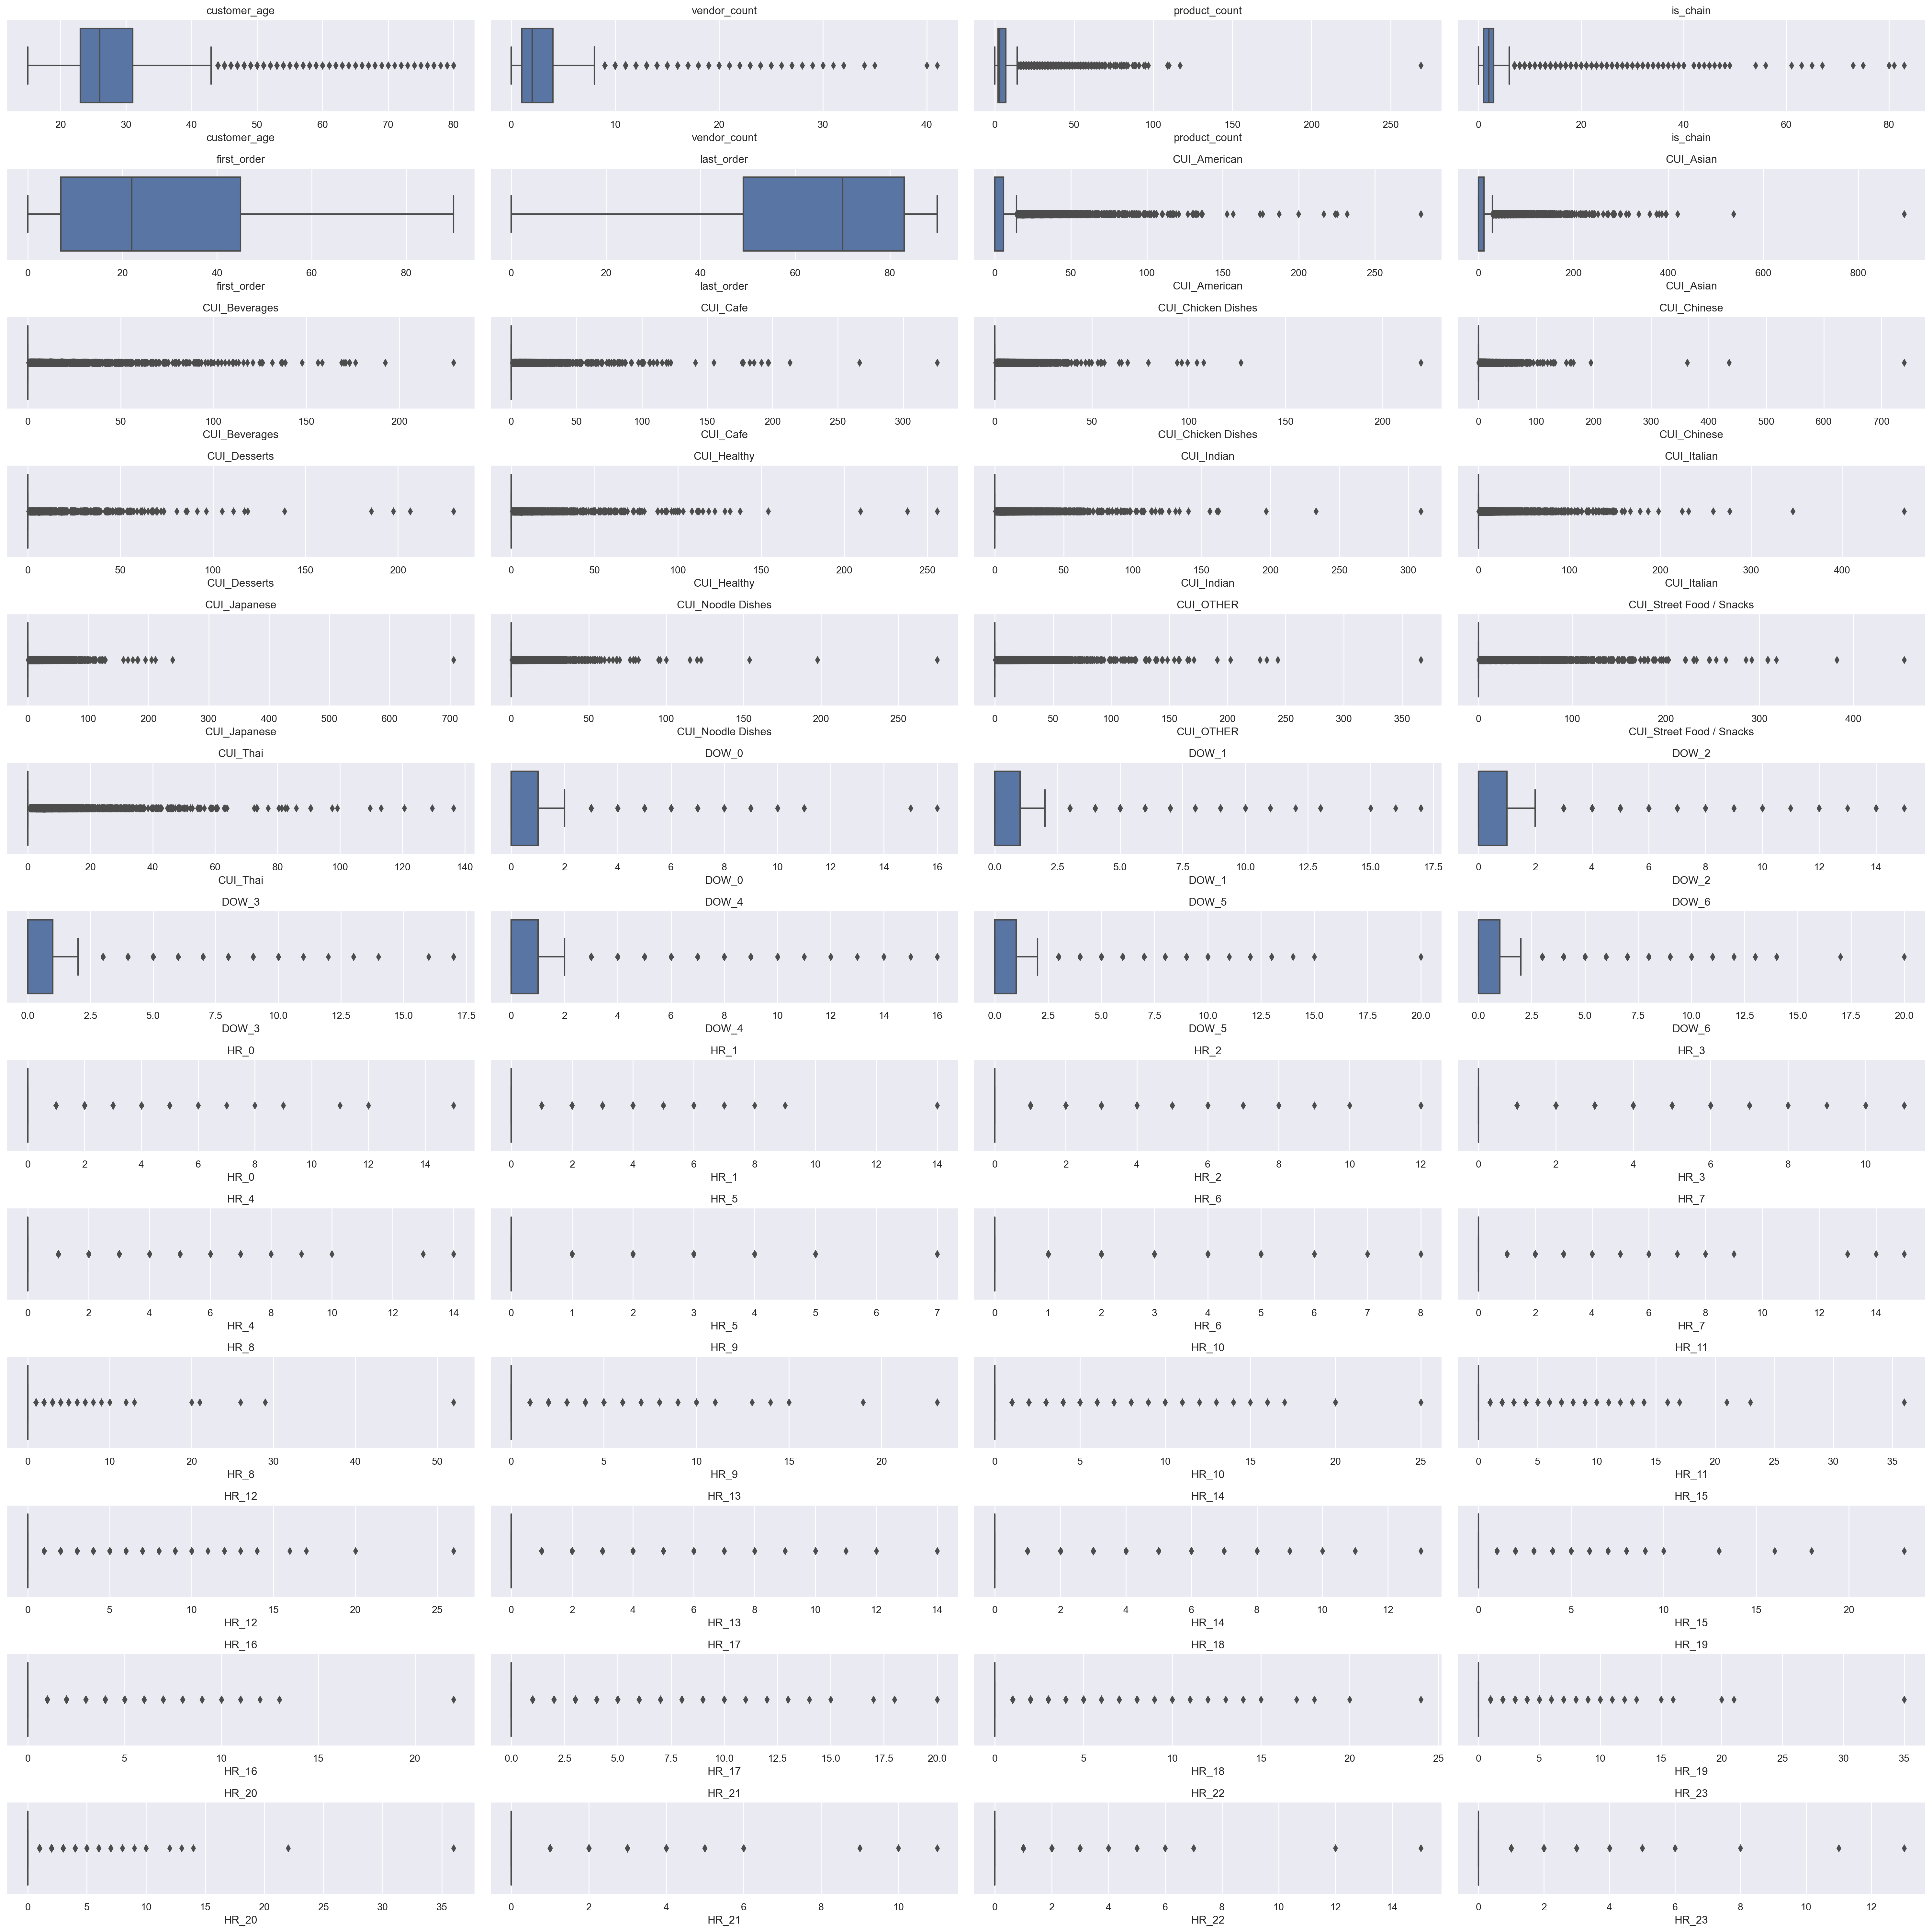

In [54]:
# Creating a 9x9 grid of subplots
fig, axes = plt.subplots(13, 4, figsize=(30, 30), tight_layout=True)

# Iterating across axes and associate each histogram
for ax, feat in zip(axes.flatten(), metric_features):
    # Ensuring the column exists and is numeric
    if feat in df.columns and pd.api.types.is_numeric_dtype(df[feat]):
        sns.boxplot(x=df[feat], ax=ax)
        ax.set_title(feat)
    else:
        ax.set_title(f"{feat} (not numeric)")  
        ax.axis('off')  # Turning off the axis if it's not numeric

# Showing the plot
plt.show()

In [55]:
filters_man = (
    (df['customer_age']<= 50) 
    &
    (df['vendor_count']<= 30) 
    &
    (df['product_count']<= 70) 
    &
    (df['is_chain']<= 40) 
    &
    (df['customer_region'] != "8550")
    &
    (df['CUI_American']<= 95) 
    &
    (df['CUI_American']<= 200)
    &
    (df['CUI_American']<= 120) 
    &
    (df['CUI_Cafe']<= 120)
    &
    (df['CUI_American']<= 200)
    &
    (df['CUI_Chicken Dishes']<= 60)
    &
    (df['CUI_Chinese']<= 100)
    &
    (df['CUI_Desserts']<= 70)
    &
    (df['CUI_Healthy']<= 80)
    &
    (df['CUI_Indian']<= 100)
    &
    (df['CUI_Italian']<= 150)
    &
    (df['CUI_Japanese']<= 105)
    &
    (df['CUI_Noodle Dishes']<= 70)
    &
    (df['CUI_OTHER']<= 95)
    &
    (df["CUI_Street Food / Snacks"] <= 160)
    &
    (df["CUI_Thai"] <= 65)
    &
    (df["DOW_0"] <= 11)
    &
    (df["DOW_1"] <= 13)
    &
    (df["DOW_3"] <= 14)
    &
    (df["DOW_5"] <= 15)
    &
    (df["DOW_6"] <= 14)
)

df_man = df[filters_man]

We're not defining tresholds for HR_ columns, as their outliers are giving us relevant information that should be taken into consideration

In [56]:
print('Percentage of data kept after removing outliers:', np.round(df_man.shape[0] / df.shape[0], 4))

Percentage of data kept after removing outliers: 0.9771


We dropped less than 3% of our data by removing the outliers.

In [57]:
# Change the original Dataset
df = df[filters_man]

##  4.3. Feature Engineering <a class="anchor" id="4.3"></a>

According to the DOW_'s distribution, we decided to group sunday-wednesday in weekdays and thursday-saturday in weekend days, since those days presented fairly similar distributions. Additionaly, we're calculating the mean per group for simplificity purposes. 

In [58]:
# Week_days (Dow_0 to Dow_3) and Weekend_days (Dow_4 to Dow_6)
df['Week_days_mean'] = df[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3']].mean(axis=1)
df['Weekend_days_mean'] = df[['DOW_4', 'DOW_5', 'DOW_6']].mean(axis=1)

In [59]:
# Lunch HR (HR_8 to HR_13), Dinner HR (HR_14 to HR_20) and  Dinner HR (HR_21 to HR_8)
df["Snack_HR_mean"] = df[["HR_21", 'HR_22', 'HR_23', "HR_0", 'HR_1', 'HR_2', "HR_3", "HR_4", "HR_5", "HR_6", "HR_7"]].mean(axis=1)
df['Lunch_HR_mean'] = df[['HR_8', 'HR_9','HR_10','HR_11', 'HR_12', 'HR_13']].mean(axis=1)
df['Dinner_HR_mean'] = df[["HR_14", "HR_15", 'HR_16', "HR_17",'HR_18', 'HR_19', 'HR_20']].mean(axis=1)

In [60]:
# Total Spend = Sum of all CUI_* columns
cuisine_columns = [col for col in df.columns if col.startswith('CUI_')]
Total_Spend = df[cuisine_columns].sum(axis=1)

In [61]:
# Average Spend per Vendor = Total Spend / vendor_count
df['Avg_Spend_per_Vendor'] = Total_Spend / df['vendor_count']

# Spend per Product = Total Spend / product_count
df['Spend_per_Product'] = Total_Spend / df['product_count']

In [62]:
# Cuisine Diversity = Number of non-zero CUI_* columns
Cuisine_Diversity = df[cuisine_columns].gt(0).sum(axis=1)

# Peak HR column for every customer
df['HR_peak'] = df.loc[:, 'HR_0':'HR_23'].idxmax(axis=1) #should we keep this, if we're clusteringn per meal?

# Customer Duration = last_order - first_order
df["Customer_Duration"] = df["last_order"] - df["first_order"]

# Product Frequency = Customer Duration / product_count
#df["Product_Frequency"] = df["Customer_Duration"] / df["product_count"] #--> use in the rfm

# Favourite Cuisine = Cuisine with the highest spend
Fav_Cuisine = df[cuisine_columns].idxmax(axis=1)

# Favourite Cuisine Concentration = Max Cuisine Spend / Total Spend
Fav_Cuisine_Concentration = df[cuisine_columns].max(axis=1) / Total_Spend

# Total Orders = Sum of all DOW_* columns
df['Total_Orders'] = df[dow_columns].sum(axis=1).astype(int)

# CUI_OTHER_Asian = CUI_Asian - Sum of the 4 main cuisines
CUI_OTHER_Asian = df["CUI_Asian"] - df[["CUI_Japanese", "CUI_Indian", "CUI_Chinese", "CUI_Thai"]].sum(axis=1)

# Chain preference = is_chain / Total_Orders
df['Chain_Preference'] = df['is_chain'] / df['Total_Orders']

# Average money spent per order = Total Spend / Total Orders
df['Avg_Spend_per_Order'] = Total_Spend / df['Total_Orders']

# Order Frequency = Total Orders / Customer Duration
df['Order_Frequency'] = df['Total_Orders'] / df['Customer_Duration']

# Peak Order Day = Day of the week with the most orders
df['DOW_Peak'] = df[dow_columns].idxmax(axis=1).apply(lambda x: int(x.split('_')[1])) #should we drop it?

# Product per Order
df['Product_per_Order'] = df['product_count'] / df['Total_Orders']

# Product Intensity = product_count / Customer Duration
df['Product_Intensity'] = df['product_count'] / df['Customer_Duration']
df['Product_Intensity'].fillna(0, inplace=True)  # Handling potential division by zero

# Repeat Customer: 1 if Customer Duration > 1, else 0
#X = 1  # If more than 1 day then it's considered a repeat customer
#df['Repeat_Customer'] = df['Customer_Duration'].apply(lambda x: 1 if x > X else 0)

# Churn Risk: 1 if days since last order > Threshold, else 0
threshold_days = 30  # Considering the max days is 90 then we decided 30 days would make sense as a threshold
Days_Since_Last_Order = df['last_order'].max() - df['last_order']  # Days since last order until the end of the dataset
df['Churn_Risk'] = Days_Since_Last_Order.apply(lambda x: 1 if x > threshold_days else 0)

In [63]:
# Remove "HR_" prefix and convert to numeric
df['HR_peak'] = df['HR_peak'].str.replace('HR_', '').astype(int)

Redo imputation of Missing Values:

In [64]:
df.isna().sum()

customer_region               0
customer_age                  0
vendor_count                  0
product_count                 0
is_chain                      0
first_order                   0
last_order                    0
last_promo                    0
payment_method                0
CUI_American                  0
CUI_Asian                     0
CUI_Beverages                 0
CUI_Cafe                      0
CUI_Chicken Dishes            0
CUI_Chinese                   0
CUI_Desserts                  0
CUI_Healthy                   0
CUI_Indian                    0
CUI_Italian                   0
CUI_Japanese                  0
CUI_Noodle Dishes             0
CUI_OTHER                     0
CUI_Street Food / Snacks      0
CUI_Thai                      0
DOW_0                         0
DOW_1                         0
DOW_2                         0
DOW_3                         0
DOW_4                         0
DOW_5                         0
DOW_6                         0
HR_0    

In [65]:
df['Chain_Preference'] = df['Chain_Preference'].fillna(df['Chain_Preference'].median())
df['Avg_Spend_per_Order'] = df['Avg_Spend_per_Order'].fillna(df['Avg_Spend_per_Order'].median())
df['Avg_Spend_per_Vendor'] = df['Avg_Spend_per_Vendor'].fillna(df['Avg_Spend_per_Vendor'].median())
df['Spend_per_Product'] = df['Spend_per_Product'].fillna(df['Spend_per_Product'].median())
df['Order_Frequency'] = df['Order_Frequency'].fillna(df['Order_Frequency'].median())
df['Product_per_Order'] = df['Product_per_Order'].fillna(df['Product_per_Order'].mode()[0])

##  4.4. Feature Selection <a class="anchor" id="4.4"></a>

It is intended to keep only the columns that gives us the most valuable insights. Most of the old features were used to build new ones that better characterize the customers. They were combined in such a way that the new features can capture the variance of the old ones. Therefore, most of the old features will be dropped to avoid redundancy and simplify the dataset.

* Dropping old features:

In [66]:
# dropping highly correlated columns
df.drop(columns=["vendor_count", "product_count", "is_chain", "last_order","first_order"] + dow_columns + hr_columns, inplace=True)

Let's check the correlation between numerical variables after this removal. The threshold of correlation will be 0.6.

In [67]:
numeric_features = list(df.select_dtypes(include=['number']))
correlation_matrix = df[numeric_features].corr()

# Set a correlation threshold
threshold = 0.75

# Get the absolute values of the correlation matrix
abs_corr_matrix = correlation_matrix.abs()

# Identify pairs with high correlation, avoiding duplicates by only considering the upper triangular matrix
high_corr_pairs = [
    (feature_1, feature_2, abs_corr_matrix.loc[feature_1, feature_2])
    for i, feature_1 in enumerate(abs_corr_matrix.columns)
    for j, feature_2 in enumerate(abs_corr_matrix.columns)
    if i < j and abs_corr_matrix.loc[feature_1, feature_2] > threshold
]

high_corr_pairs

[('Week_days_mean', 'Total_Orders', 0.8951300202917988),
 ('Weekend_days_mean', 'Total_Orders', 0.8334284419104853),
 ('Avg_Spend_per_Vendor', 'Avg_Spend_per_Order', 0.7621378074833761),
 ('Spend_per_Product', 'Avg_Spend_per_Order', 0.8146110750085815),
 ('Order_Frequency', 'Product_Intensity', 0.9487150884474285)]

After analysing the following pairs we decided to delete some of the new features, that could possibly give us some repeated information or less relevant.

In [68]:
# dropping highly correlated columns
df.drop(columns=["Product_Intensity", "Avg_Spend_per_Vendor", "Spend_per_Product"], inplace=True)  

# for now, we're dropping these 3 features, but perhaps it's important to check if it's valuable later on?

In [69]:
numeric_features = list(df.select_dtypes(include=['number']))
correlation_matrix = df[numeric_features].corr()

# Set a correlation threshold
threshold = 0.75

# Get the absolute values of the correlation matrix
abs_corr_matrix = correlation_matrix.abs()

# Identify pairs with high correlation, avoiding duplicates by only considering pairs where feature_1 < feature_2
high_corr_pairs = [
    (feature_1, feature_2, abs_corr_matrix.loc[feature_1, feature_2])
    for i, feature_1 in enumerate(abs_corr_matrix.columns)
    for j, feature_2 in enumerate(abs_corr_matrix.columns)
    if i < j and abs_corr_matrix.loc[feature_1, feature_2] > threshold
]

high_corr_pairs

[('Week_days_mean', 'Total_Orders', 0.8951300202917988),
 ('Weekend_days_mean', 'Total_Orders', 0.8334284419104853)]

We chose to keep all these 3 features, even though they're highly correlated, as they're being used in different clustering perspectives

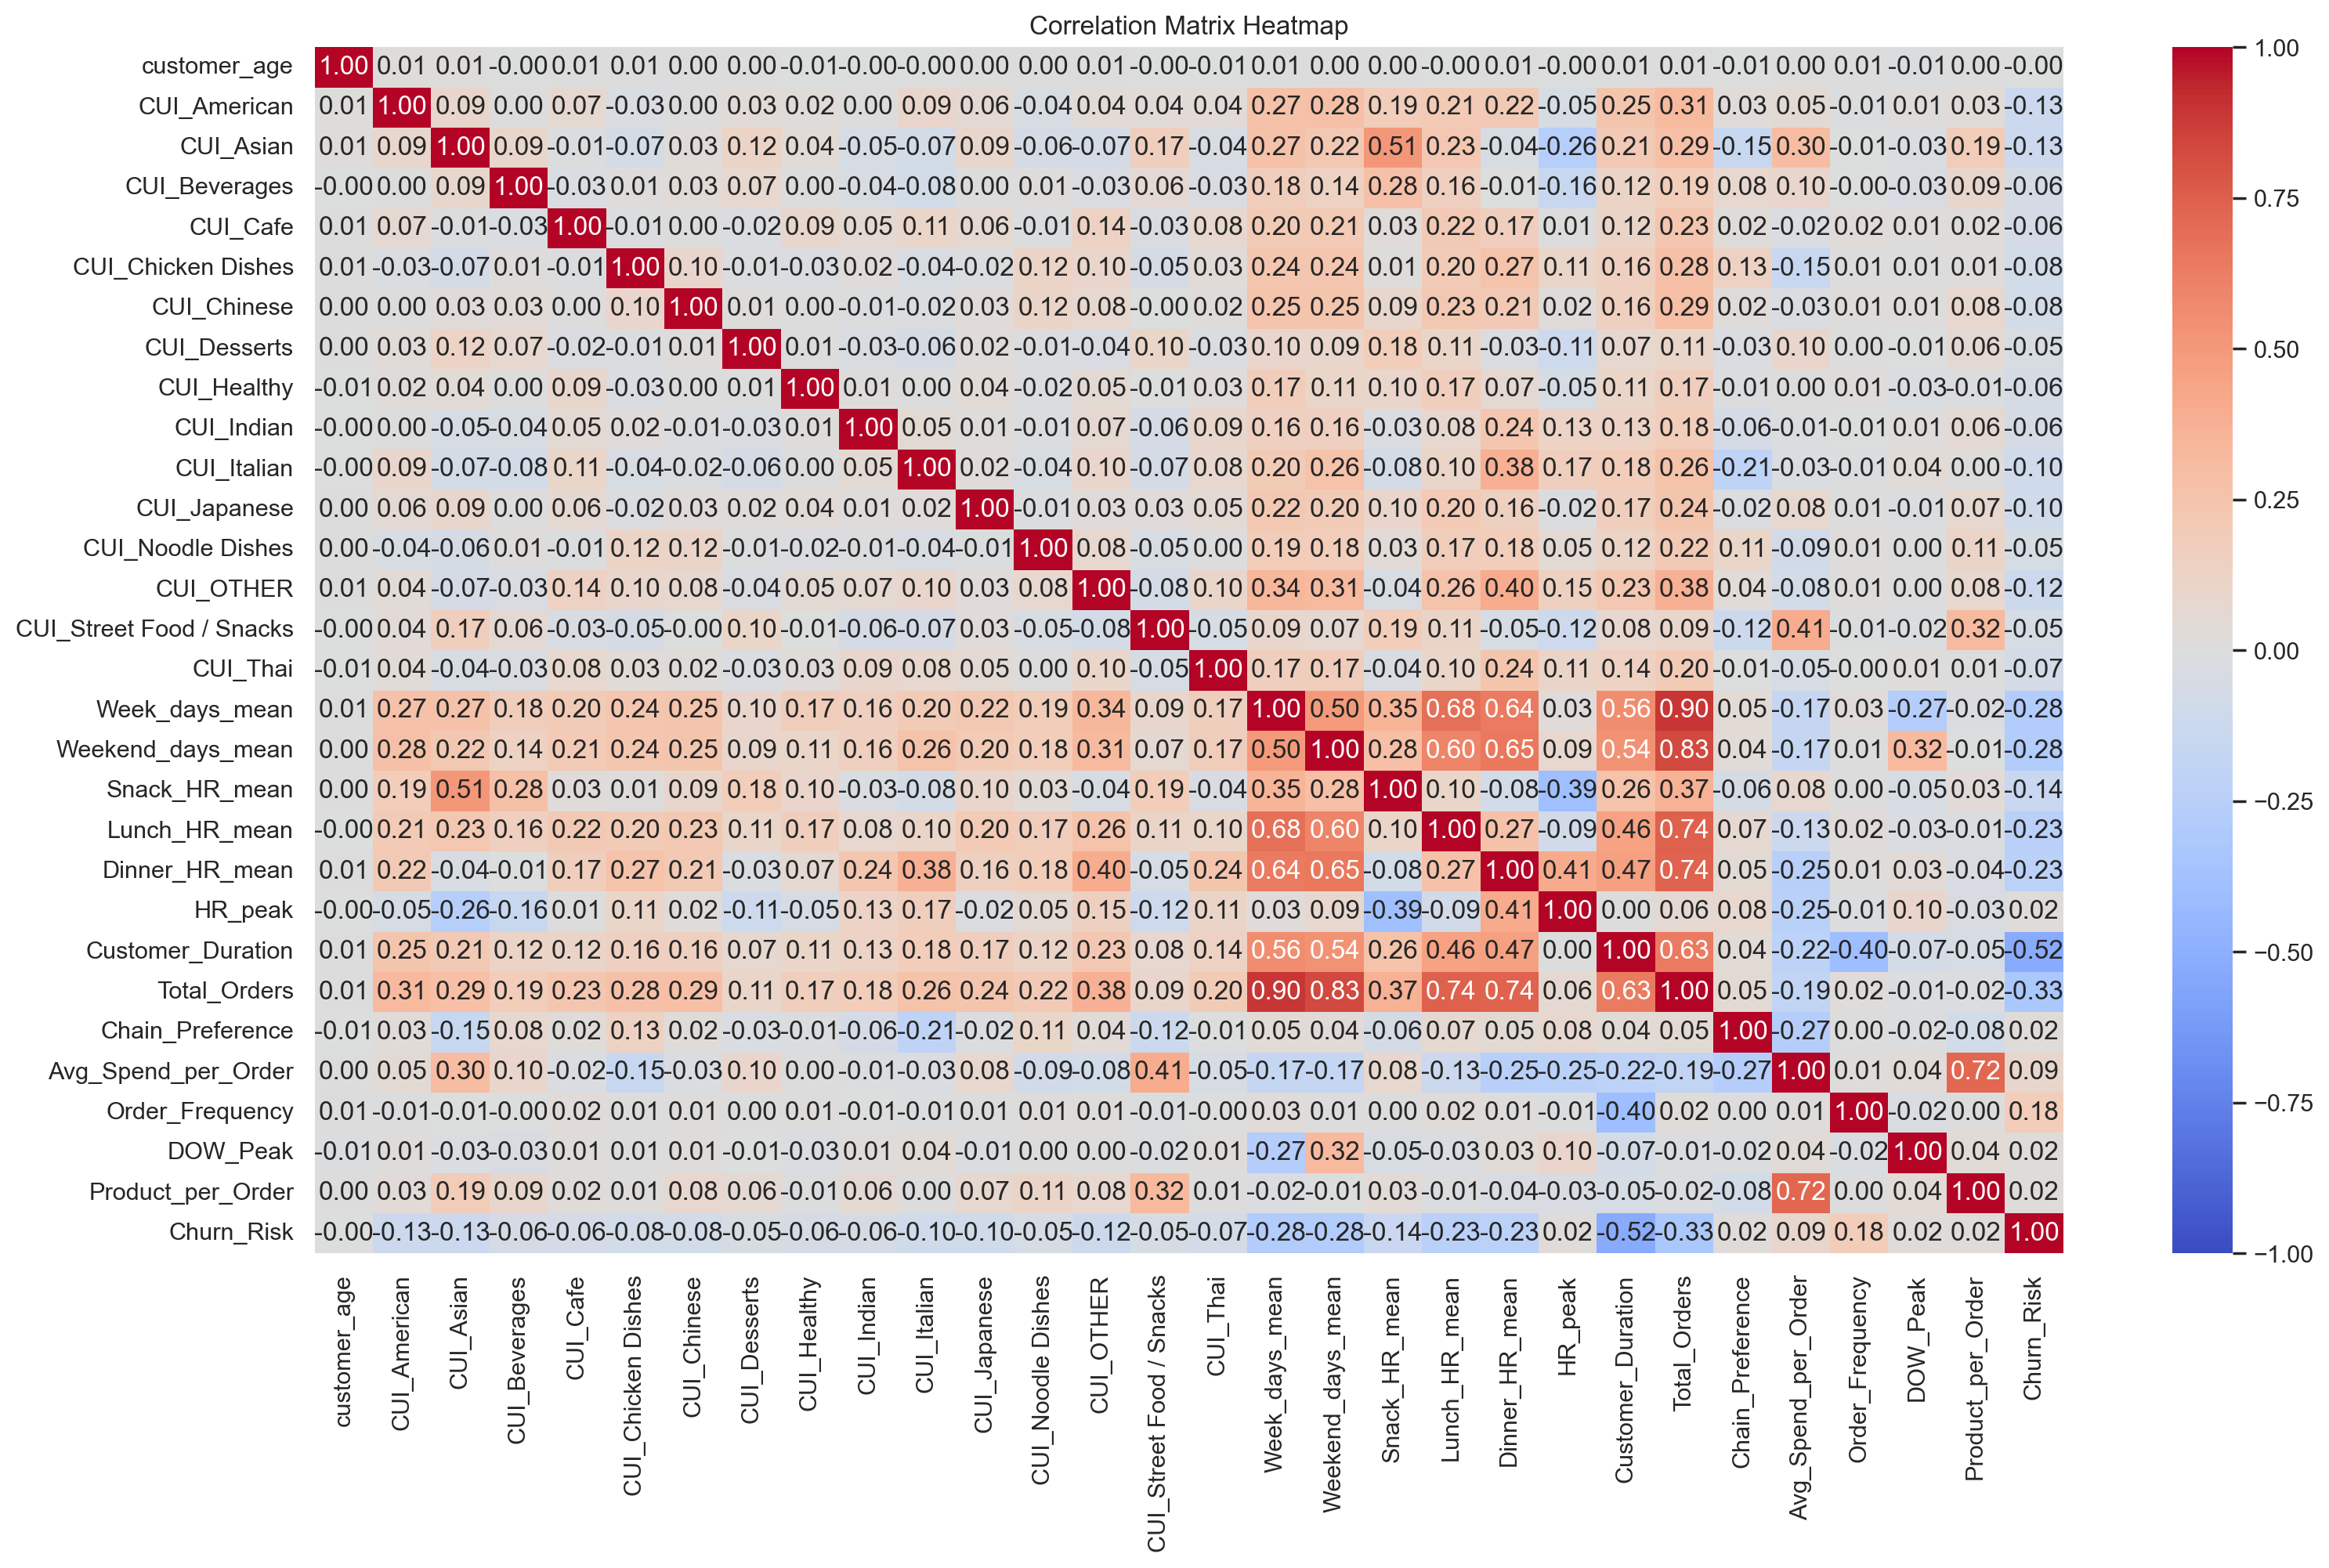

In [70]:
numeric_features = list(df.select_dtypes(include=['number'])) 
correlation_matrix = df[numeric_features].corr()

# Plot the heatmap
plt.figure(figsize=(18, 10))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

### Dimensionality Reduction 

PCA
> (Han, 2023)
> Data Mining concepts and techniques (4th ed.)
> 
> 
> The basic procedure is as follows:
> 
> 1. The input data are normalized, so that each attribute falls within the same range. This step helps ensure that attributes with large domains will not dominate attributes with smaller domains.
> 2. PCA computes k orthonormal vectors that provide a basis for the normalized input data. These are unit vectors that are perpendicular with each other. These vectors are referred to as the principal components. The input data are a linear combination of the principal components.
> 3. The principal components are sorted in order of decreasing “significance” or strength. The principal components essentially serve as a new set of axes for the data, providing important information about variance. That is, the sorted axes are such that the first axis shows the most variance among the data, the second axis shows the next highest variance, and so on. For example, Fig. 2.17 shows the first two principal components, $Y_1$ and $Y_2$, for the given set of data originally mapped to the axes $X_1$ and $X_2$. This information helps identify groups or patterns within the data.
> 4. Because the components are sorted in descending order of “significance,” the data size can be reduced by eliminating the weaker components, that is, those with low variance. Using the strongest principal components, it should be possible to reconstruct a good approximation of the original data.
>  
> Han, J., Pei, J., & Tong, H. (2023). Data, measurements, and data preprocessing. In Elsevier eBooks (pp. 23–84). https://doi.org/10.1016/b978-0-12-811760-6.00012-6

In [71]:
df_pca = df.copy()

Before PCA:

In [72]:
# Check for infinity values
print(df_pca.isin([np.inf, -np.inf]).sum())

# Replace infinity with NaN (or any placeholder value)
df_pca.replace([np.inf, -np.inf], np.nan, inplace=True)


customer_region                0
customer_age                   0
last_promo                     0
payment_method                 0
CUI_American                   0
CUI_Asian                      0
CUI_Beverages                  0
CUI_Cafe                       0
CUI_Chicken Dishes             0
CUI_Chinese                    0
CUI_Desserts                   0
CUI_Healthy                    0
CUI_Indian                     0
CUI_Italian                    0
CUI_Japanese                   0
CUI_Noodle Dishes              0
CUI_OTHER                      0
CUI_Street Food / Snacks       0
CUI_Thai                       0
Week_days_mean                 0
Weekend_days_mean              0
Snack_HR_mean                  0
Lunch_HR_mean                  0
Dinner_HR_mean                 0
HR_peak                        0
Customer_Duration              0
Total_Orders                   0
Chain_Preference              75
Avg_Spend_per_Order            0
Order_Frequency             6945
DOW_Peak  

In [73]:
df_pca = df_pca.fillna(df_pca.median())

In [74]:
# Check for infinity values
print(df_pca.isin([np.inf, -np.inf]).sum())

customer_region             0
customer_age                0
last_promo                  0
payment_method              0
CUI_American                0
CUI_Asian                   0
CUI_Beverages               0
CUI_Cafe                    0
CUI_Chicken Dishes          0
CUI_Chinese                 0
CUI_Desserts                0
CUI_Healthy                 0
CUI_Indian                  0
CUI_Italian                 0
CUI_Japanese                0
CUI_Noodle Dishes           0
CUI_OTHER                   0
CUI_Street Food / Snacks    0
CUI_Thai                    0
Week_days_mean              0
Weekend_days_mean           0
Snack_HR_mean               0
Lunch_HR_mean               0
Dinner_HR_mean              0
HR_peak                     0
Customer_Duration           0
Total_Orders                0
Chain_Preference            0
Avg_Spend_per_Order         0
Order_Frequency             0
DOW_Peak                    0
Product_per_Order           0
Churn_Risk                  0
dtype: int

Running PCA:

In [75]:
# Use PCA to reduce dimensionality of data
pca = PCA()
pca_feat = pca.fit_transform(df_pca[numeric_features])
pca_feat

array([[-3.56107860e+01,  5.85615231e-01, -1.81720998e+00, ...,
        -1.12358798e-01,  4.22628429e-14, -1.19463911e-13],
       [-3.28062598e+01,  7.05868329e+00, -3.05924284e+00, ...,
        -1.29050657e-02,  7.27380069e-14, -1.76538388e-13],
       [-3.49484339e+01,  5.39116778e-01, -3.06918914e+00, ...,
        -4.46264122e-03,  7.67178693e-14, -1.83348033e-13],
       ...,
       [-5.74609038e+01,  1.04596474e+01,  9.84451664e-02, ...,
         1.65215012e-02, -1.27197879e-14,  3.58558454e-14],
       [-5.37758170e+01,  1.96769636e+01, -4.57970941e+00, ...,
         8.14856891e-02,  5.92932108e-15,  1.29495712e-14],
       [-5.70665795e+01,  6.89490224e+00, -3.73860845e+00, ...,
         6.23977116e-03, -9.16051280e-15,  3.32253280e-14]])

Selecting the Principal Components we should retain:

In [76]:
# Get PCA output as table

# Get the eigenvalues (explained variance)
explained_variance = pca.explained_variance_

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# get the cumulative explained variance ratio 
# Hint: use np.cumsum()
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Combine into a dataframe
pca_results = pd.DataFrame(
    {
        "Eigenvalue": explained_variance,
        "Difference": np.insert(np.diff(explained_variance), 0, 0),
        "Proportion": explained_variance_ratio,
        "Cumulative": cumulative_explained_variance_ratio
    },
        index=range(1, pca.n_components_ + 1)
)

pca_results.head()

Eigenvalue  Difference  Proportion  Cumulative
1  940.194927    0.000000    0.417120    0.417120
2  483.348990 -456.845937    0.214439    0.631559
3  177.352171 -305.996818    0.078683    0.710242
4  102.587863  -74.764308    0.045513    0.755756
5   89.786118  -12.801746    0.039834    0.795589

Plot the results:

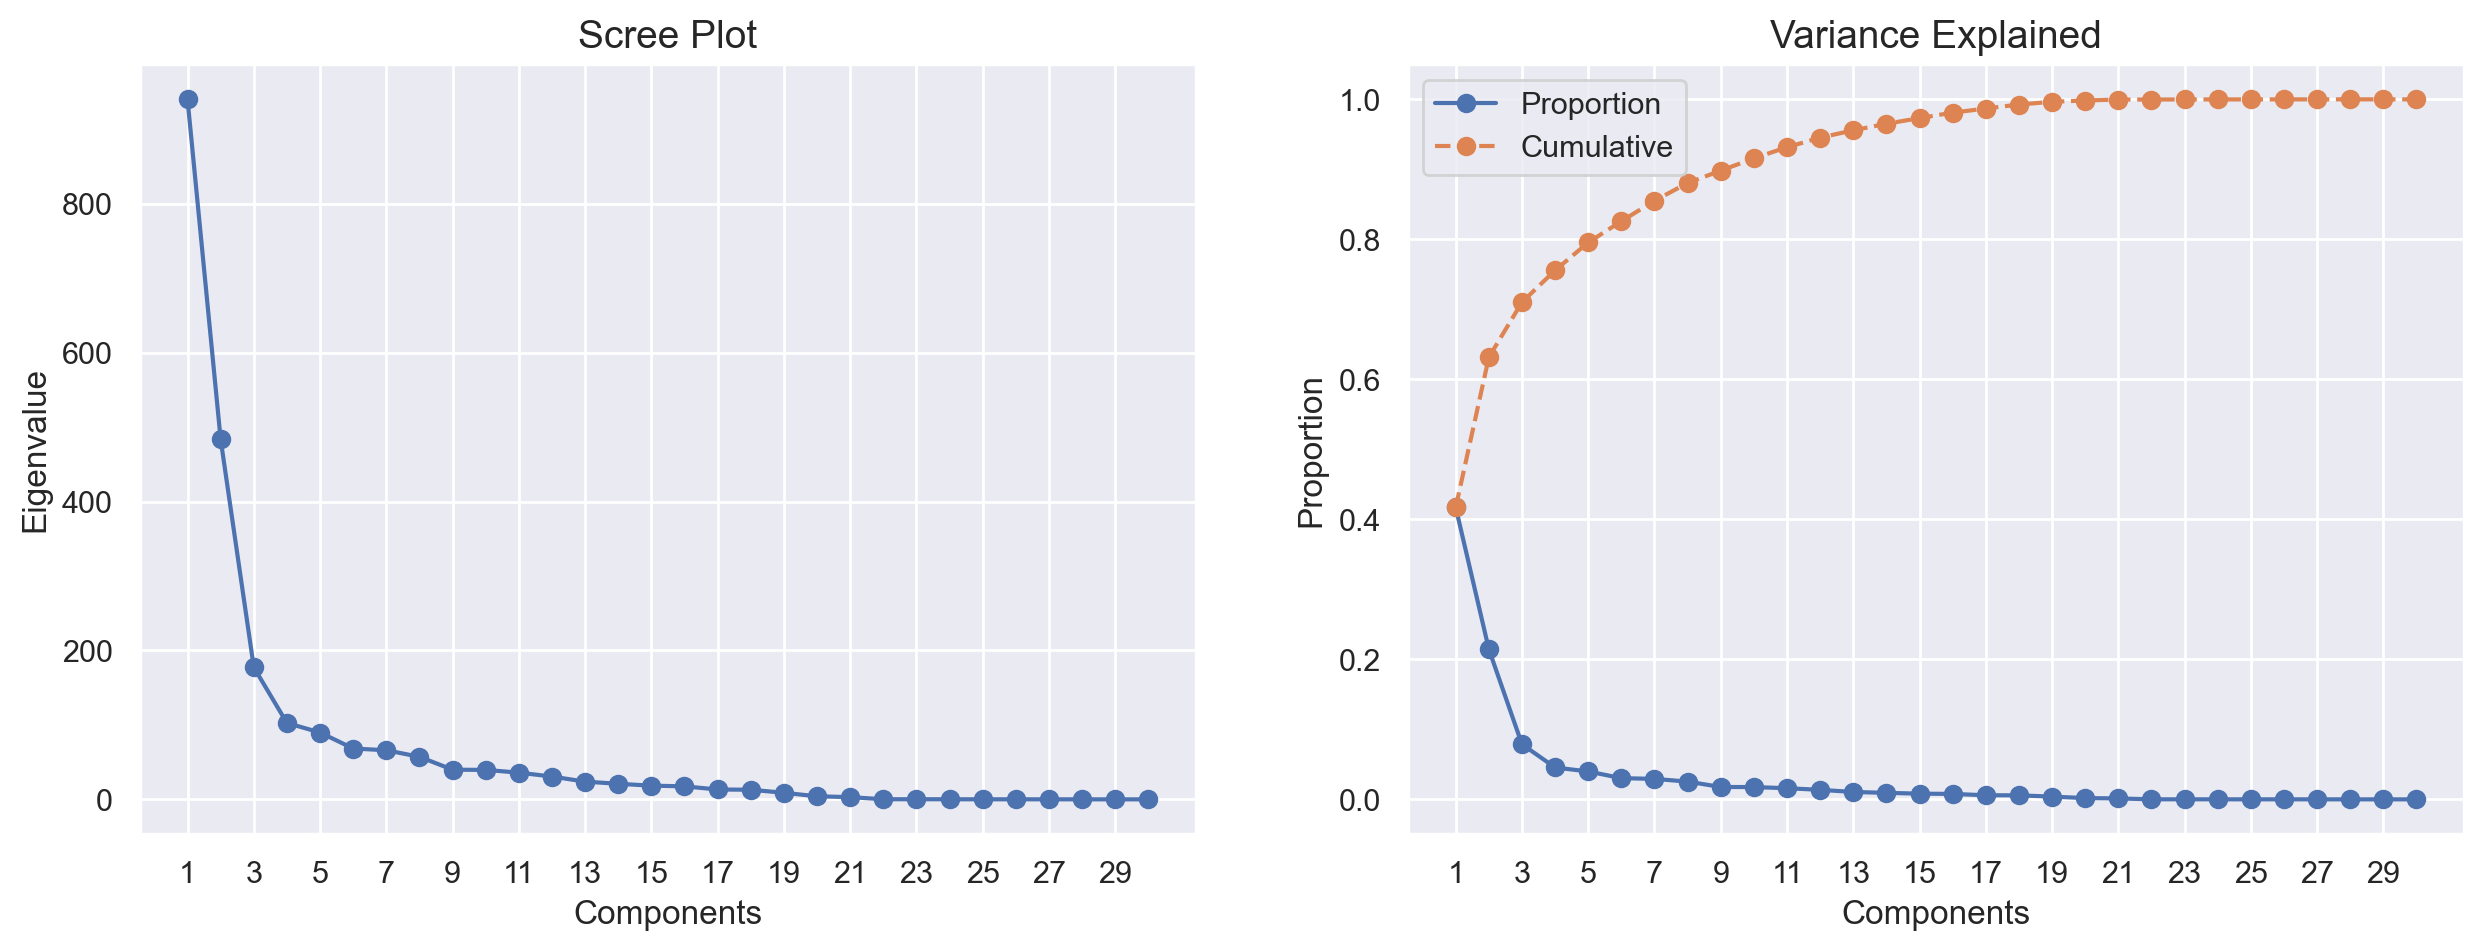

In [77]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots

ax1.plot(explained_variance, # PLOT THE EIGENVALUES (EXPLAINED VARIANCE)
         marker=".", markersize=12)

ax2.plot(explained_variance_ratio,  # PLOT THE EXPLAINED VARIANCE RATIO
         marker=".", markersize=12, label="Proportion")

ax2.plot(cumulative_explained_variance_ratio,  # PLOT THE CUMULATIVE EXPLAINED VARIANCE RATIO
         marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

In [78]:
# Perform PCA again with the number of principal components you want to retain
pca = PCA(n_components=4)
pca_feat = pca.fit_transform(df_pca[numeric_features])
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]

# remember index=df_pca.index
pca_df = pd.DataFrame(pca_feat, index=df_pca.index, columns=pca_feat_names)  
pca_df.head()

PC0        PC1       PC2        PC3
customer_id                                           
1b8f824d5e  -35.610786   0.585615 -1.817210  -0.287481
5d272b9dcb  -32.806260   7.058683 -3.059243   6.739179
f6d1b2ba63  -34.948434   0.539117 -3.069189   3.597859
180c632ed8  -30.550171  13.929055 -3.864462  -0.395523
4eb37a6705  -21.377358  41.471359 -5.693283  11.055507

In [79]:
# Reassigning df to contain pca variables
df_pca = pd.concat([df_pca, pca_df], axis=1)
df_pca.head()

customer_region  customer_age  ...       PC2        PC3
customer_id                                ...                     
1b8f824d5e             2360          18.0  ... -1.817210  -0.287481
5d272b9dcb             8670          17.0  ... -3.059243   6.739179
f6d1b2ba63             4660          38.0  ... -3.069189   3.597859
180c632ed8             4660          26.0  ... -3.864462  -0.395523
4eb37a6705             4660          20.0  ... -5.693283  11.055507

[5 rows x 37 columns]

Interpreting the PC's:

In [80]:
loadings = df_pca[numeric_features + pca_feat_names].corr().loc[numeric_features, pca_feat_names] 

In [81]:
def _color_red_or_green(val):
    if val < -0.45:
        color = 'background-color: #ffbdbd'
    elif val > 0.45:
        color = 'background-color: #b3ffcc'
    else:
        color = ''
    return color

# Interpreting each Principal Component
loadings.style.applymap(_color_red_or_green)

**Remarks:**
After closely analysing the PCA results, we decided not to include them in our final dataset, since the interpretability would be very troublesome and we'd be losing too much important information. 

## 4.4.1 Creating clustering perspectives

Creating the Dataframe for each perspective: <br> <br>
**1. Cuisine Preferences**

In [82]:
df_CUI = df[cuisine_columns]

# Define Asian-related cuisines
asian_cuisines = ['CUI_Asian', 'CUI_Chinese', 'CUI_Indian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_Thai']

# Group Asian-related cuisines into `CUI_Asian`
df_CUI['CUI_Asian'] = df_CUI[asian_cuisines].sum(axis=1)

# Define columns to retain and consolidate the rest into `CUI_OTHER`
retain_columns = ['CUI_American', 'CUI_Italian', 'CUI_Asian']
other_columns = [col for col in df_CUI.columns if col not in retain_columns + asian_cuisines]

# Group the rest into `CUI_OTHER`
df_CUI['CUI_OTHER'] = df_CUI[other_columns].sum(axis=1)

# Keep only the desired columns
df_CUI = df_CUI[retain_columns + ['CUI_OTHER']]

# Add Chain_preference
df_CUI = pd.concat([df_CUI, df['Chain_Preference']], axis = 1)

df_CUI.head(10)


CUI_American  CUI_Italian  CUI_Asian  CUI_OTHER  Chain_Preference
customer_id                                                                   
1b8f824d5e           0.00          0.0      28.88       0.00          0.500000
5d272b9dcb          12.82          0.0       6.39       0.00          1.000000
f6d1b2ba63           9.20          0.0       0.00       0.00          1.000000
180c632ed8           0.00          0.0      31.56       0.00          0.500000
4eb37a6705          14.57          0.0      40.87       0.00          0.000000
6aef2b6726           0.00          0.0      24.92       0.00          0.000000
8475ee66ef           5.88          0.0       0.00       1.53          1.000000
f2f53bcc67          11.71          0.0       0.00      24.40          1.000000
5b650c89cc           2.75          0.0       0.00      11.69          0.666667
84775a7237           0.00          0.0      32.48       0.00          0.000000

**2. Economic Preferences**

In [83]:
df_ECO = df[['Order_Frequency', 'Avg_Spend_per_Order', 'Product_per_Order', 'Total_Orders','Customer_Duration']]
# I think duration can be valuable for this perspective when combined with order frequency. For eg. a customer with high order frequency is more valuable when the duration is higher, indicating an active and loyal customer.

df_ECO.head(10)

Order_Frequency  ...  Customer_Duration
customer_id                   ...                   
1b8f824d5e          2.000000  ...                1.0
5d272b9dcb          2.000000  ...                1.0
f6d1b2ba63          2.000000  ...                1.0
180c632ed8          1.000000  ...                2.0
4eb37a6705          1.000000  ...                2.0
6aef2b6726          1.000000  ...                2.0
8475ee66ef          1.000000  ...                2.0
f2f53bcc67          1.000000  ...                2.0
5b650c89cc          1.000000  ...                3.0
84775a7237          0.666667  ...                3.0

[10 rows x 5 columns]

**3. Demographic Preferences**

In [84]:
df_DEMO = df[['Week_days_mean','Weekend_days_mean', 'HR_peak', 'DOW_Peak', 'customer_age']]
# 'customer_region' was taken out, since it's categorical. But we intend to study it from this perspective later on

df_DEMO.head(10)

Week_days_mean  Weekend_days_mean  HR_peak  DOW_Peak  customer_age
customer_id                                                                    
1b8f824d5e             0.25           0.333333       18         0          18.0
5d272b9dcb             0.25           0.333333       10         0          17.0
f6d1b2ba63             0.25           0.333333        9         0          38.0
180c632ed8             0.25           0.333333       11         1          26.0
4eb37a6705             0.25           0.333333        8         1          20.0
6aef2b6726             0.25           0.333333        1         1          40.0
8475ee66ef             0.25           0.333333       11         1          24.0
f2f53bcc67             0.25           0.333333        6         1          27.0
5b650c89cc             0.25           0.666667       17         6          20.0
84775a7237             0.25           0.333333        3         2          20.0

##  4.5. Data Normalization <a class="anchor" id="4.4"></a>

Comparing MinMax scaler to the Normalization scaler: <br> <br>
To nomalize: <br>
1 - df_CUI <br>
2 - df_ECO <br>
3 - df_DEMO <br>

1.1 - df_CUI_minmax

In [85]:
df_CUI_minmax = df_CUI.copy()
df_CUI_minmax.columns

Index(['CUI_American', 'CUI_Italian', 'CUI_Asian', 'CUI_OTHER',
       'Chain_Preference'],
      dtype='object')

In [86]:
# Replace inf/-inf with NaN
df_CUI_minmax.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN with the maximum value of each column
for col in df_CUI_minmax.columns:
    max_val = df_CUI_minmax[col].max()  # Calculate max value excluding NaN
    df_CUI_minmax[col].fillna(max_val, inplace=True)

# Initialize MinMaxScaler
mm_scaler = MinMaxScaler()

# Apply MinMaxScaler and create a new DataFrame with scaled values
mm_scaled_feat = mm_scaler.fit_transform(df_CUI_minmax)

# Replace the original columns with scaled values
df_CUI_minmax = pd.DataFrame(mm_scaled_feat, columns=df_CUI_minmax.columns)

# Display the updated DataFrame
df_CUI_minmax.head()

CUI_American  CUI_Italian  CUI_Asian  CUI_OTHER  Chain_Preference
0      0.000000          0.0   0.047800        0.0               0.5
1      0.135332          0.0   0.010576        0.0               1.0
2      0.097118          0.0   0.000000        0.0               1.0
3      0.000000          0.0   0.052236        0.0               0.5
4      0.153806          0.0   0.067645        0.0               0.0

In [87]:
# Replace inf/-inf with NaN
df_CUI_minmax.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN with the maximum value of each column
for col in df_CUI_minmax.columns:
    max_val = df_CUI_minmax[col].max()  # Calculate max value excluding NaN
    df_CUI_minmax[col].fillna(max_val, inplace=True)

In [88]:
df_CUI_minmax.head()

CUI_American  CUI_Italian  CUI_Asian  CUI_OTHER  Chain_Preference
0      0.000000          0.0   0.047800        0.0               0.5
1      0.135332          0.0   0.010576        0.0               1.0
2      0.097118          0.0   0.000000        0.0               1.0
3      0.000000          0.0   0.052236        0.0               0.5
4      0.153806          0.0   0.067645        0.0               0.0

In [89]:
mm_scaler = MinMaxScaler()
mm_scaled_feat = mm_scaler.fit_transform(df_CUI_minmax)

# If you want to replace the original columns with the scaled values:
df_CUI_minmax = pd.DataFrame(mm_scaled_feat, columns=df_CUI_minmax.columns)

# Display the updated dataframe
df_CUI_minmax.head()

CUI_American  CUI_Italian  CUI_Asian  CUI_OTHER  Chain_Preference
0      0.000000          0.0   0.047800        0.0               0.5
1      0.135332          0.0   0.010576        0.0               1.0
2      0.097118          0.0   0.000000        0.0               1.0
3      0.000000          0.0   0.052236        0.0               0.5
4      0.153806          0.0   0.067645        0.0               0.0

1.2 - df_CUI_standard

In [90]:
df_CUI_standard = df_CUI.copy()

In [91]:
# Replace inf/-inf with NaN
df_CUI_standard.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN with the maximum value of each column
for col in df_CUI_standard.columns:
    max_val = df_CUI_standard[col].max()  # Calculate max value excluding NaN
    df_CUI_standard[col].fillna(max_val, inplace=True)

# Initialize the StandardScaler
ss_scaler = StandardScaler()

# Apply StandardScaler and create a new DataFrame with scaled values
ss_scaled_feat = ss_scaler.fit_transform(df_CUI_standard)

# Replace the original columns with scaled values
df_CUI_standard = pd.DataFrame(ss_scaled_feat, columns=df_CUI_standard.columns)

# Display the updated DataFrame
df_CUI_standard.head()

CUI_American  CUI_Italian  CUI_Asian  CUI_OTHER  Chain_Preference
0     -0.454995    -0.310663   0.459250  -0.591954         -0.332520
1      0.819296    -0.310663  -0.394150  -0.591954          0.958296
2      0.459472    -0.310663  -0.636624  -0.591954          0.958296
3     -0.454995    -0.310663   0.560945  -0.591954         -0.332520
4      0.993243    -0.310663   0.914220  -0.591954         -1.623335

#### 2.1 - df_ECO_minmax

In [92]:
df_ECO_minmax = df_ECO.copy()
df_ECO_minmax.columns

Index(['Order_Frequency', 'Avg_Spend_per_Order', 'Product_per_Order',
       'Total_Orders', 'Customer_Duration'],
      dtype='object')

In [93]:
df_ECO_minmax.head()

Order_Frequency  ...  Customer_Duration
customer_id                   ...                   
1b8f824d5e               2.0  ...                1.0
5d272b9dcb               2.0  ...                1.0
f6d1b2ba63               2.0  ...                1.0
180c632ed8               1.0  ...                2.0
4eb37a6705               1.0  ...                2.0

[5 rows x 5 columns]

In [94]:
# Replace inf/-inf with NaN
df_ECO_minmax.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN with the maximum value of each column
for col in df_ECO_minmax.columns:
    max_val = df_ECO_minmax[col].max()  # Calculate max value excluding NaN
    df_ECO_minmax[col].fillna(max_val, inplace=True)

# Initialize MinMaxScaler
mm_scaler = MinMaxScaler()

# Apply MinMaxScaler and create a new DataFrame with scaled values
mm_scaled_feat = mm_scaler.fit_transform(df_ECO_minmax)

# Replace the original columns with scaled values
df_ECO_minmax = pd.DataFrame(mm_scaled_feat, columns=df_ECO_minmax.columns)

# Display the updated DataFrame
df_ECO_minmax.head()

Order_Frequency  Avg_Spend_per_Order  ...  Total_Orders  Customer_Duration
0         0.511111             0.135354  ...      0.036364           0.205357
1         0.511111             0.088841  ...      0.036364           0.205357
2         0.511111             0.040693  ...      0.036364           0.205357
3         0.266667             0.148244  ...      0.036364           0.214286
4         0.266667             0.263107  ...      0.036364           0.214286

[5 rows x 5 columns]

#### 2.2 - df_ECO_standard

In [95]:
df_ECO_standard = df_ECO.copy()

In [96]:
# Replace inf/-inf with NaN
df_ECO_standard.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN with the maximum value of each column
for col in df_ECO_standard.columns:
    max_val = df_ECO_standard[col].max()  # Calculate max value excluding NaN
    df_ECO_standard[col].fillna(max_val, inplace=True)

# Initialize the StandardScaler
ss_scaler = StandardScaler()

# Apply StandardScaler to the metric features
scaled_features = ss_scaler.fit_transform(df_ECO_standard)

# Replace the original columns with scaled values
df_ECO_standard = pd.DataFrame(ss_scaled_feat, columns=df_ECO_standard.columns)

# Display the updated DataFrame
df_ECO_standard.head()

Order_Frequency  Avg_Spend_per_Order  ...  Total_Orders  Customer_Duration
0        -0.454995            -0.310663  ...     -0.591954          -0.332520
1         0.819296            -0.310663  ...     -0.591954           0.958296
2         0.459472            -0.310663  ...     -0.591954           0.958296
3        -0.454995            -0.310663  ...     -0.591954          -0.332520
4         0.993243            -0.310663  ...     -0.591954          -1.623335

[5 rows x 5 columns]

#### 3.1 - df_DEMO_minmax

In [97]:
df_DEMO_minmax = df_DEMO.copy()
df_DEMO_minmax.columns

Index(['Week_days_mean', 'Weekend_days_mean', 'HR_peak', 'DOW_Peak',
       'customer_age'],
      dtype='object')

In [98]:
df_DEMO_minmax.head()

Week_days_mean  Weekend_days_mean  HR_peak  DOW_Peak  customer_age
customer_id                                                                    
1b8f824d5e             0.25           0.333333       18         0          18.0
5d272b9dcb             0.25           0.333333       10         0          17.0
f6d1b2ba63             0.25           0.333333        9         0          38.0
180c632ed8             0.25           0.333333       11         1          26.0
4eb37a6705             0.25           0.333333        8         1          20.0

In [99]:
# Replace inf/-inf with NaN
df_DEMO_minmax.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN with the maximum value of each column
for col in df_DEMO_minmax.columns:
    max_val = df_DEMO_minmax[col].max()  # Calculate max value excluding NaN
    df_DEMO_minmax[col].fillna(max_val, inplace=True)

# Initialize MinMaxScaler
mm_scaler = MinMaxScaler()

# Apply MinMaxScaler and create a new DataFrame with scaled values
mm_scaled_feat = mm_scaler.fit_transform(df_DEMO_minmax)

# Replace the original columns with scaled values
df_DEMO_minmax = pd.DataFrame(mm_scaled_feat, columns=df_DEMO_minmax.columns)

# Display the updated DataFrame
df_DEMO_minmax.head()

Week_days_mean  Weekend_days_mean   HR_peak  DOW_Peak  customer_age
0        0.028571           0.034483  0.782609  0.000000      0.085714
1        0.028571           0.034483  0.434783  0.000000      0.057143
2        0.028571           0.034483  0.391304  0.000000      0.657143
3        0.028571           0.034483  0.478261  0.166667      0.314286
4        0.028571           0.034483  0.347826  0.166667      0.142857

#### 3.2 - df_DEMO_standard

In [100]:
df_DEMO_standard = df_DEMO.copy()

In [101]:
# Replace inf/-inf with NaN
df_DEMO_standard.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN with the maximum value of each column
for col in df_DEMO_standard.columns:
    max_val = df_DEMO_standard[col].max()  # Calculate max value excluding NaN
    df_DEMO_standard[col].fillna(max_val, inplace=True)

# Initialize the StandardScaler
ss_scaler = StandardScaler()

# Apply StandardScaler to the metric features
scaled_features = ss_scaler.fit_transform(df_DEMO_standard)

# Replace the original columns with scaled values
df_DEMO_standard = pd.DataFrame(ss_scaled_feat, columns=df_DEMO_standard.columns)

# Display the updated DataFrame
df_DEMO_standard.head()

Week_days_mean  Weekend_days_mean   HR_peak  DOW_Peak  customer_age
0       -0.454995          -0.310663  0.459250 -0.591954     -0.332520
1        0.819296          -0.310663 -0.394150 -0.591954      0.958296
2        0.459472          -0.310663 -0.636624 -0.591954      0.958296
3       -0.454995          -0.310663  0.560945 -0.591954     -0.332520
4        0.993243          -0.310663  0.914220 -0.591954     -1.623335

### Comparing the 2 scalers:

##### - Comparing MinMax and Standard Scaler for df_CUI:

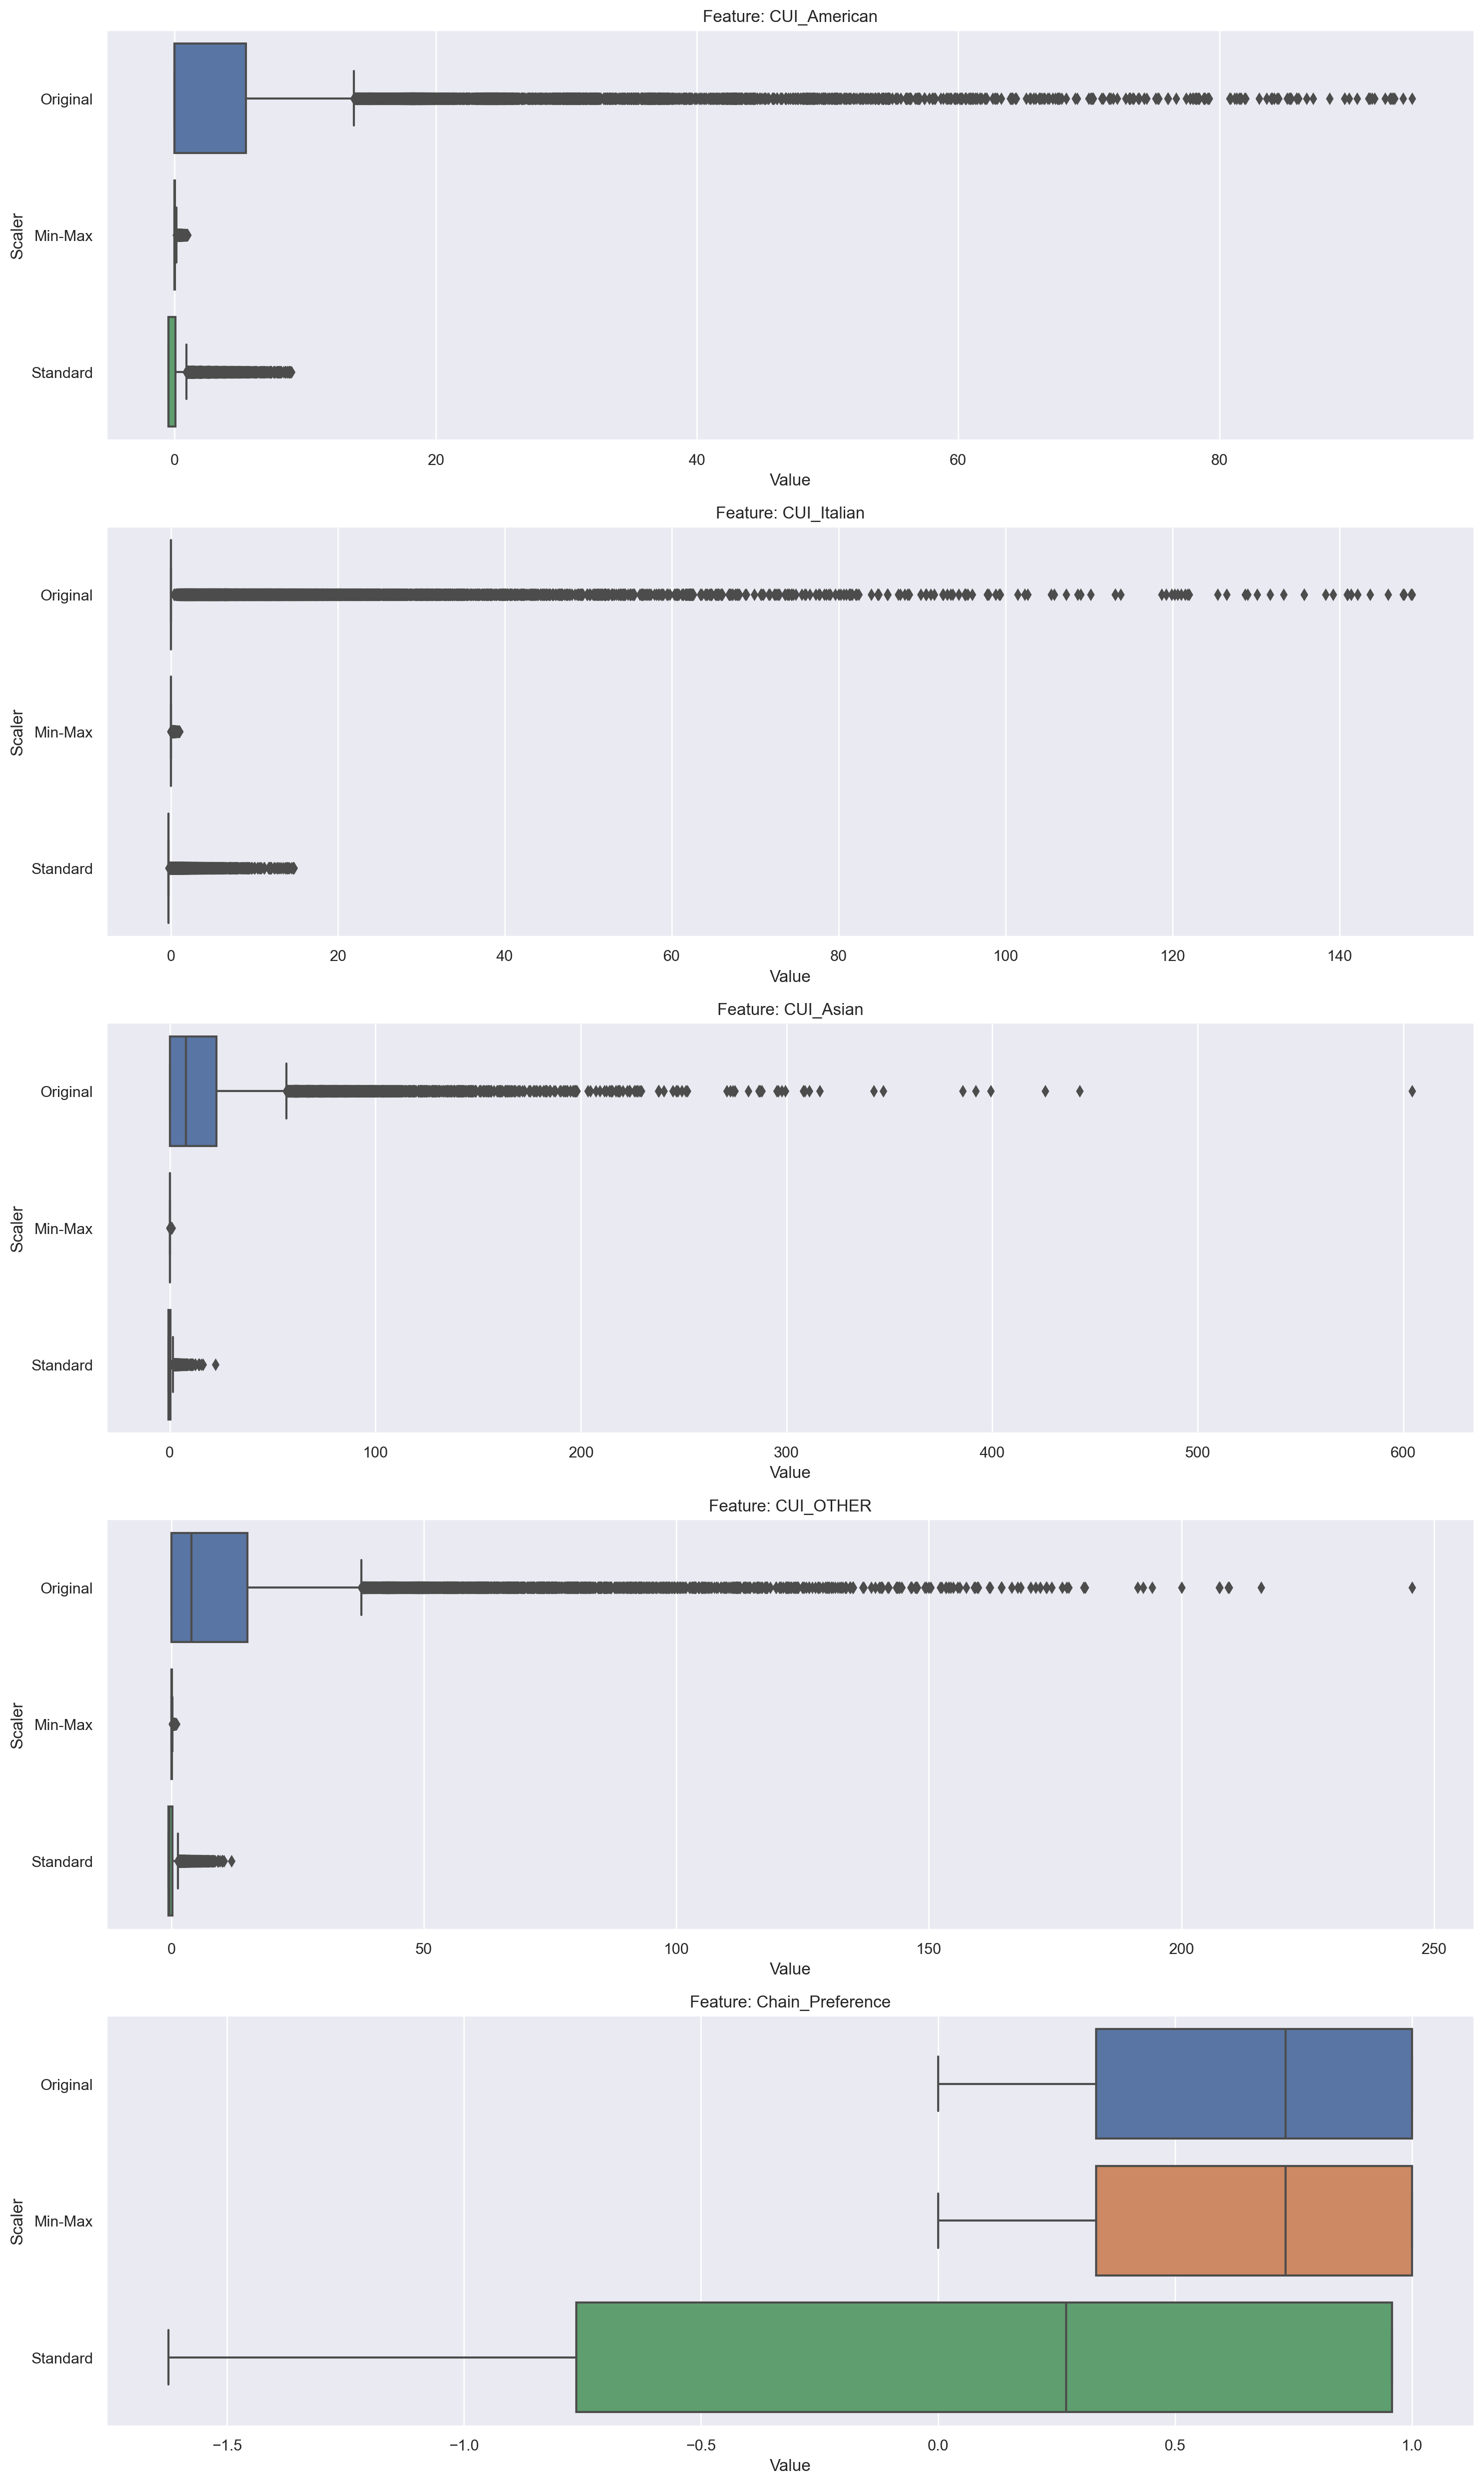

In [102]:
# Prepare an empty DataFrame to combine data for plotting
data_for_plot = pd.DataFrame()

# Loop over each column in the DataFrames
for feature in df_CUI.columns:
    # Combine data from all three DataFrames for the current feature
    df_original = df_CUI[[feature]].rename(columns={feature: 'Value'})
    df_original['Scaler'] = 'Original'
    df_original['Feature'] = feature

    df_minmax = df_CUI_minmax[[feature]].rename(columns={feature: 'Value'})
    df_minmax['Scaler'] = 'Min-Max'
    df_minmax['Feature'] = feature

    df_standard = df_CUI_standard[[feature]].rename(columns={feature: 'Value'})
    df_standard['Scaler'] = 'Standard'
    df_standard['Feature'] = feature

    # Concatenate into the plotting DataFrame
    data_for_plot = pd.concat([data_for_plot, df_original, df_minmax, df_standard])

# Plotting: Create boxplots for each feature
num_features = len(df_CUI.columns)
rows_per_figure = 6  # Number of rows (features) to plot per figure

for start_idx in range(0, num_features, rows_per_figure):
    # Define the range of features to plot in this figure
    end_idx = min(start_idx + rows_per_figure, num_features)
    features_to_plot = df_CUI.columns[start_idx:end_idx]

    # Filter data for this subset of features
    subset_data = data_for_plot[data_for_plot['Feature'].isin(features_to_plot)]

    # Create the figure
    plt.figure(figsize=(15, 5 * len(features_to_plot)))

    # Loop through each feature and create a subplot
    for idx, feature in enumerate(features_to_plot, 1):
        plt.subplot(len(features_to_plot), 1, idx)
        sns.boxplot(data=subset_data[subset_data['Feature'] == feature], x='Value', y='Scaler', orient='h')
        plt.title(f'Feature: {feature}')

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

#### - Comparing MinMax and Standard Scaler for df_ECO:

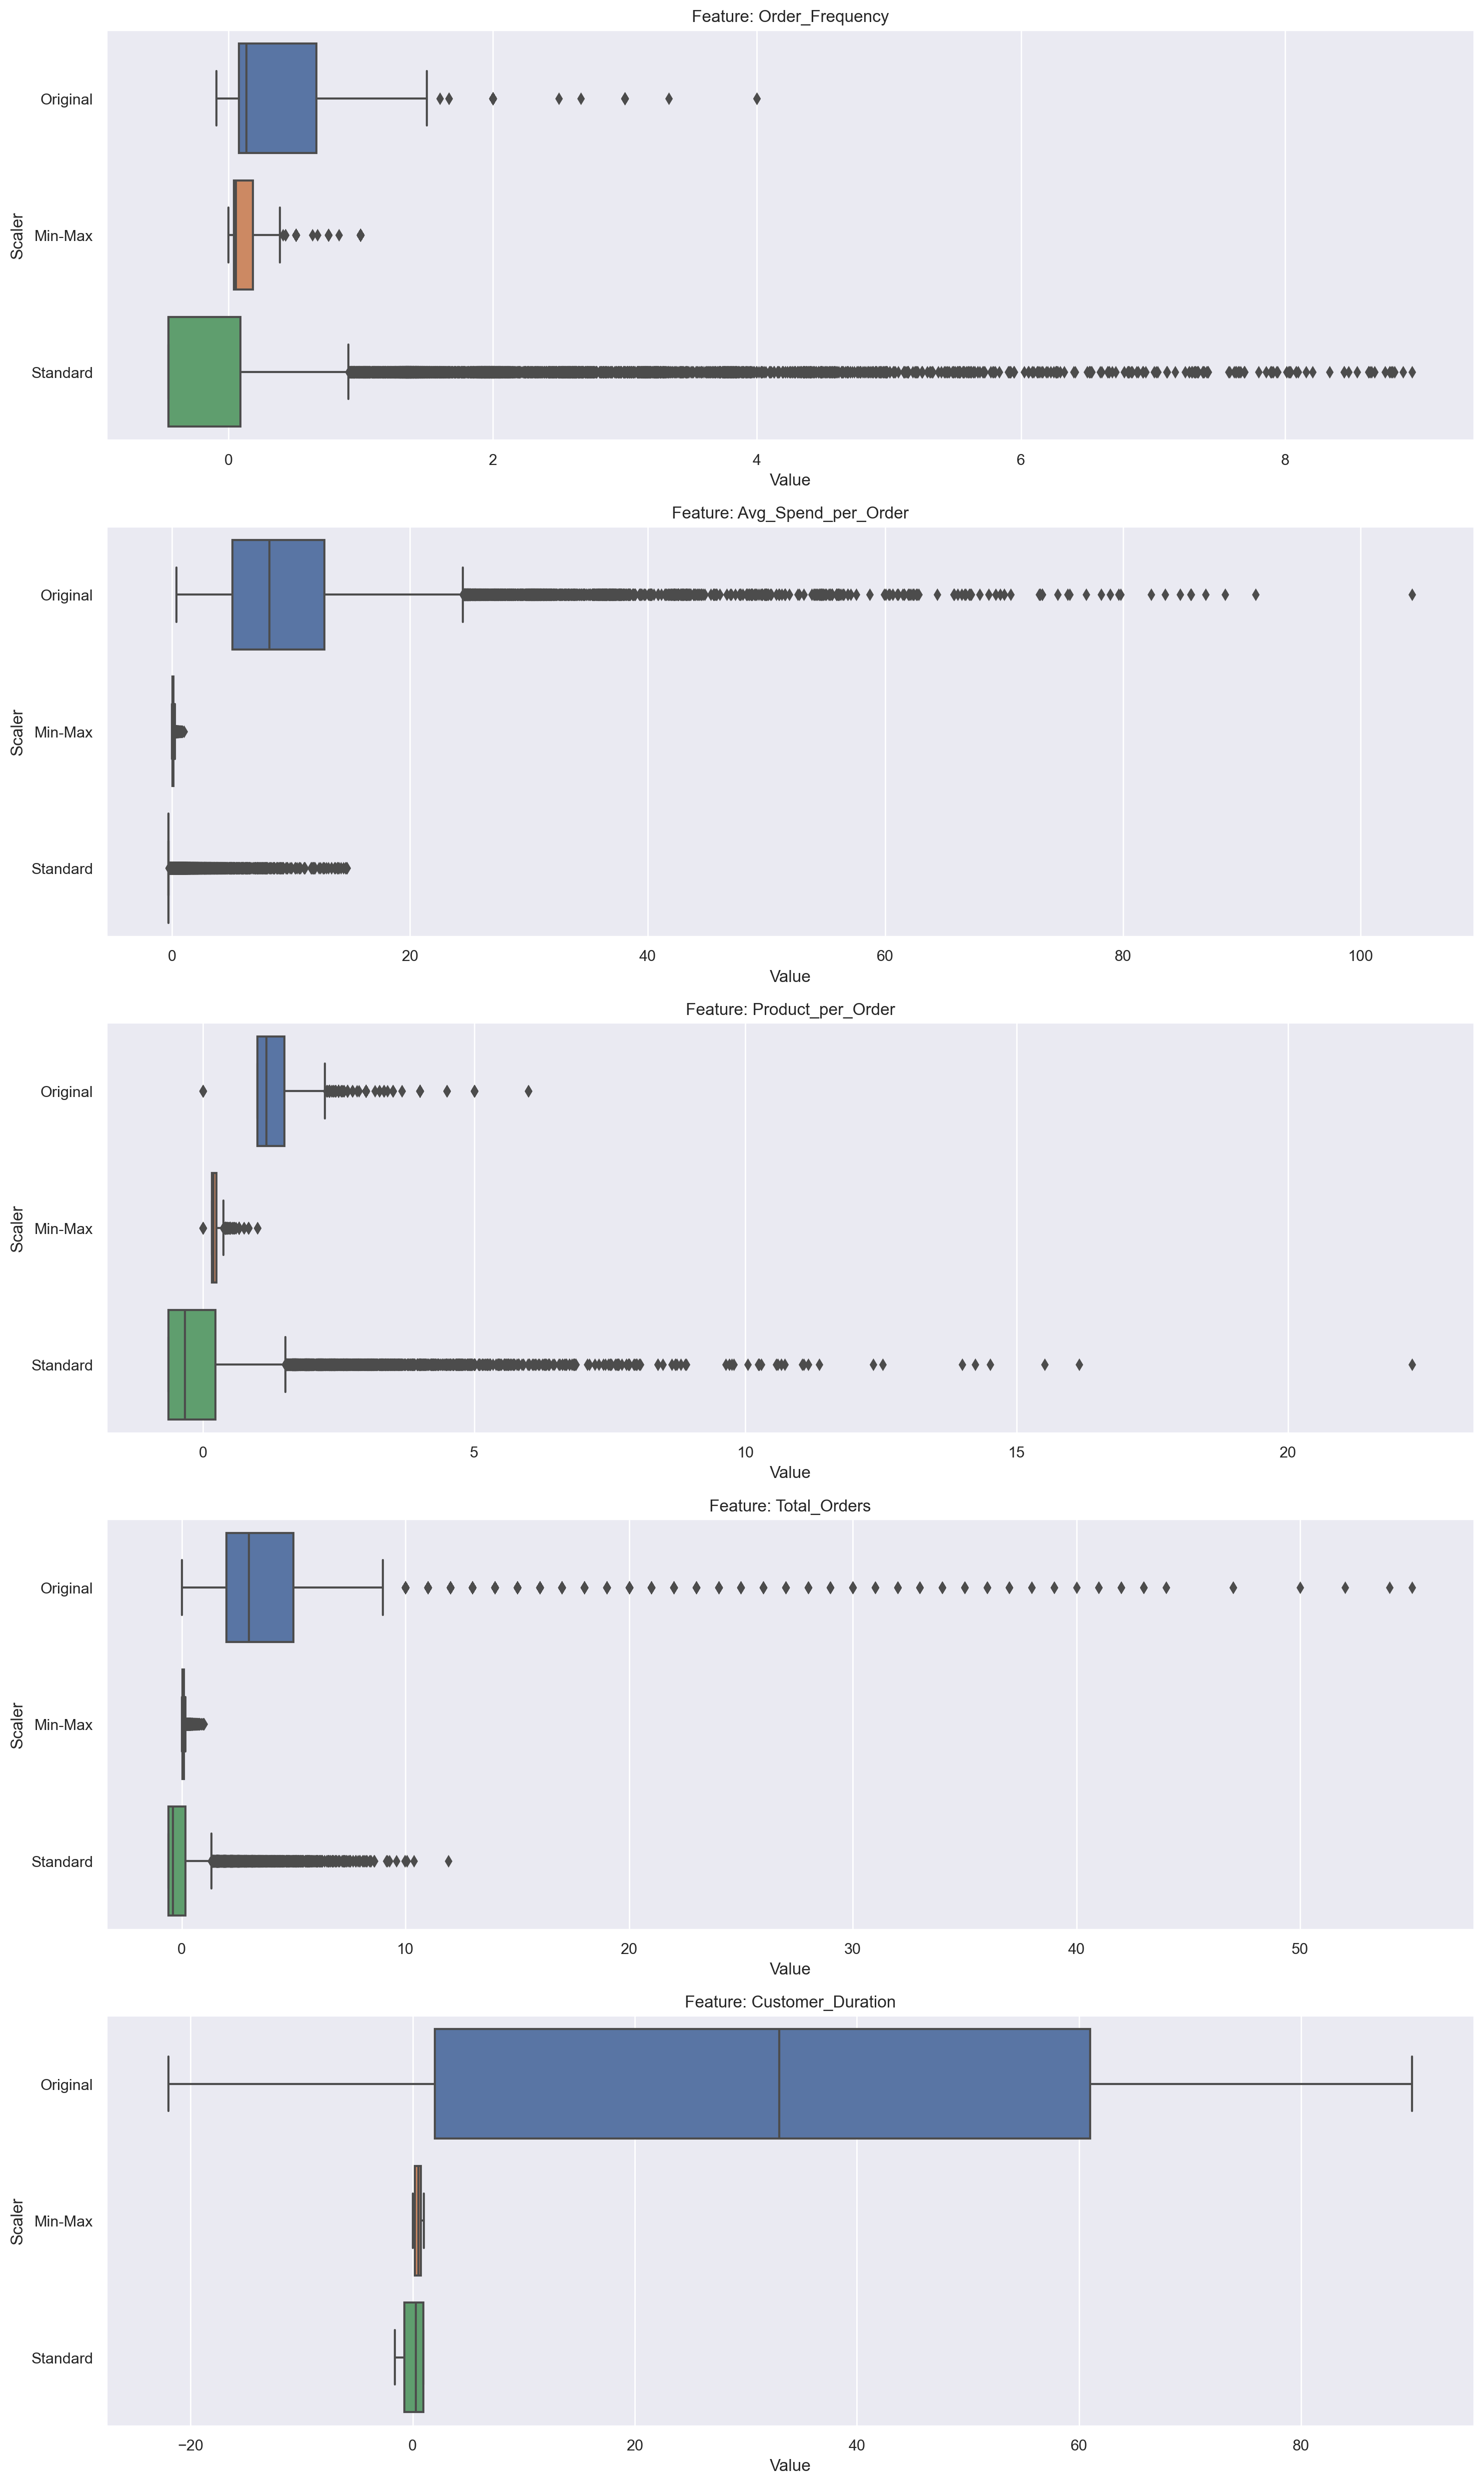

In [103]:
# Prepare an empty DataFrame to combine data for plotting
data_for_plot = pd.DataFrame()

# Loop over each column in the DataFrames
for feature in df_ECO.columns:
    # Combine data from all three DataFrames for the current feature
    df_original = df_ECO[[feature]].rename(columns={feature: 'Value'})
    df_original['Scaler'] = 'Original'
    df_original['Feature'] = feature

    df_minmax = df_ECO_minmax[[feature]].rename(columns={feature: 'Value'})
    df_minmax['Scaler'] = 'Min-Max'
    df_minmax['Feature'] = feature

    df_standard = df_ECO_standard[[feature]].rename(columns={feature: 'Value'})
    df_standard['Scaler'] = 'Standard'
    df_standard['Feature'] = feature

    # Concatenate into the plotting DataFrame
    data_for_plot = pd.concat([data_for_plot, df_original, df_minmax, df_standard])

# Convert the 'Value' column to numeric (to avoid errors with non-numeric data)
data_for_plot['Value'] = pd.to_numeric(data_for_plot['Value'], errors='coerce')

# Plotting: Create boxplots for each feature
num_features = len(df_ECO.columns)
rows_per_figure = 6  # Number of rows (features) to plot per figure

for start_idx in range(0, num_features, rows_per_figure):
    # Define the range of features to plot in this figure
    end_idx = min(start_idx + rows_per_figure, num_features)
    features_to_plot = df_ECO.columns[start_idx:end_idx]

    # Filter data for this subset of features
    subset_data = data_for_plot[data_for_plot['Feature'].isin(features_to_plot)]

    # Create the figure
    plt.figure(figsize=(15, 5 * len(features_to_plot)))

    # Loop through each feature and create a subplot
    for idx, feature in enumerate(features_to_plot, 1):
        plt.subplot(len(features_to_plot), 1, idx)
        sns.boxplot(data=subset_data[subset_data['Feature'] == feature], x='Value', y='Scaler', orient='h')
        plt.title(f'Feature: {feature}')

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

#### - Comparing MinMax and Standard Scaler for df_DEMO:

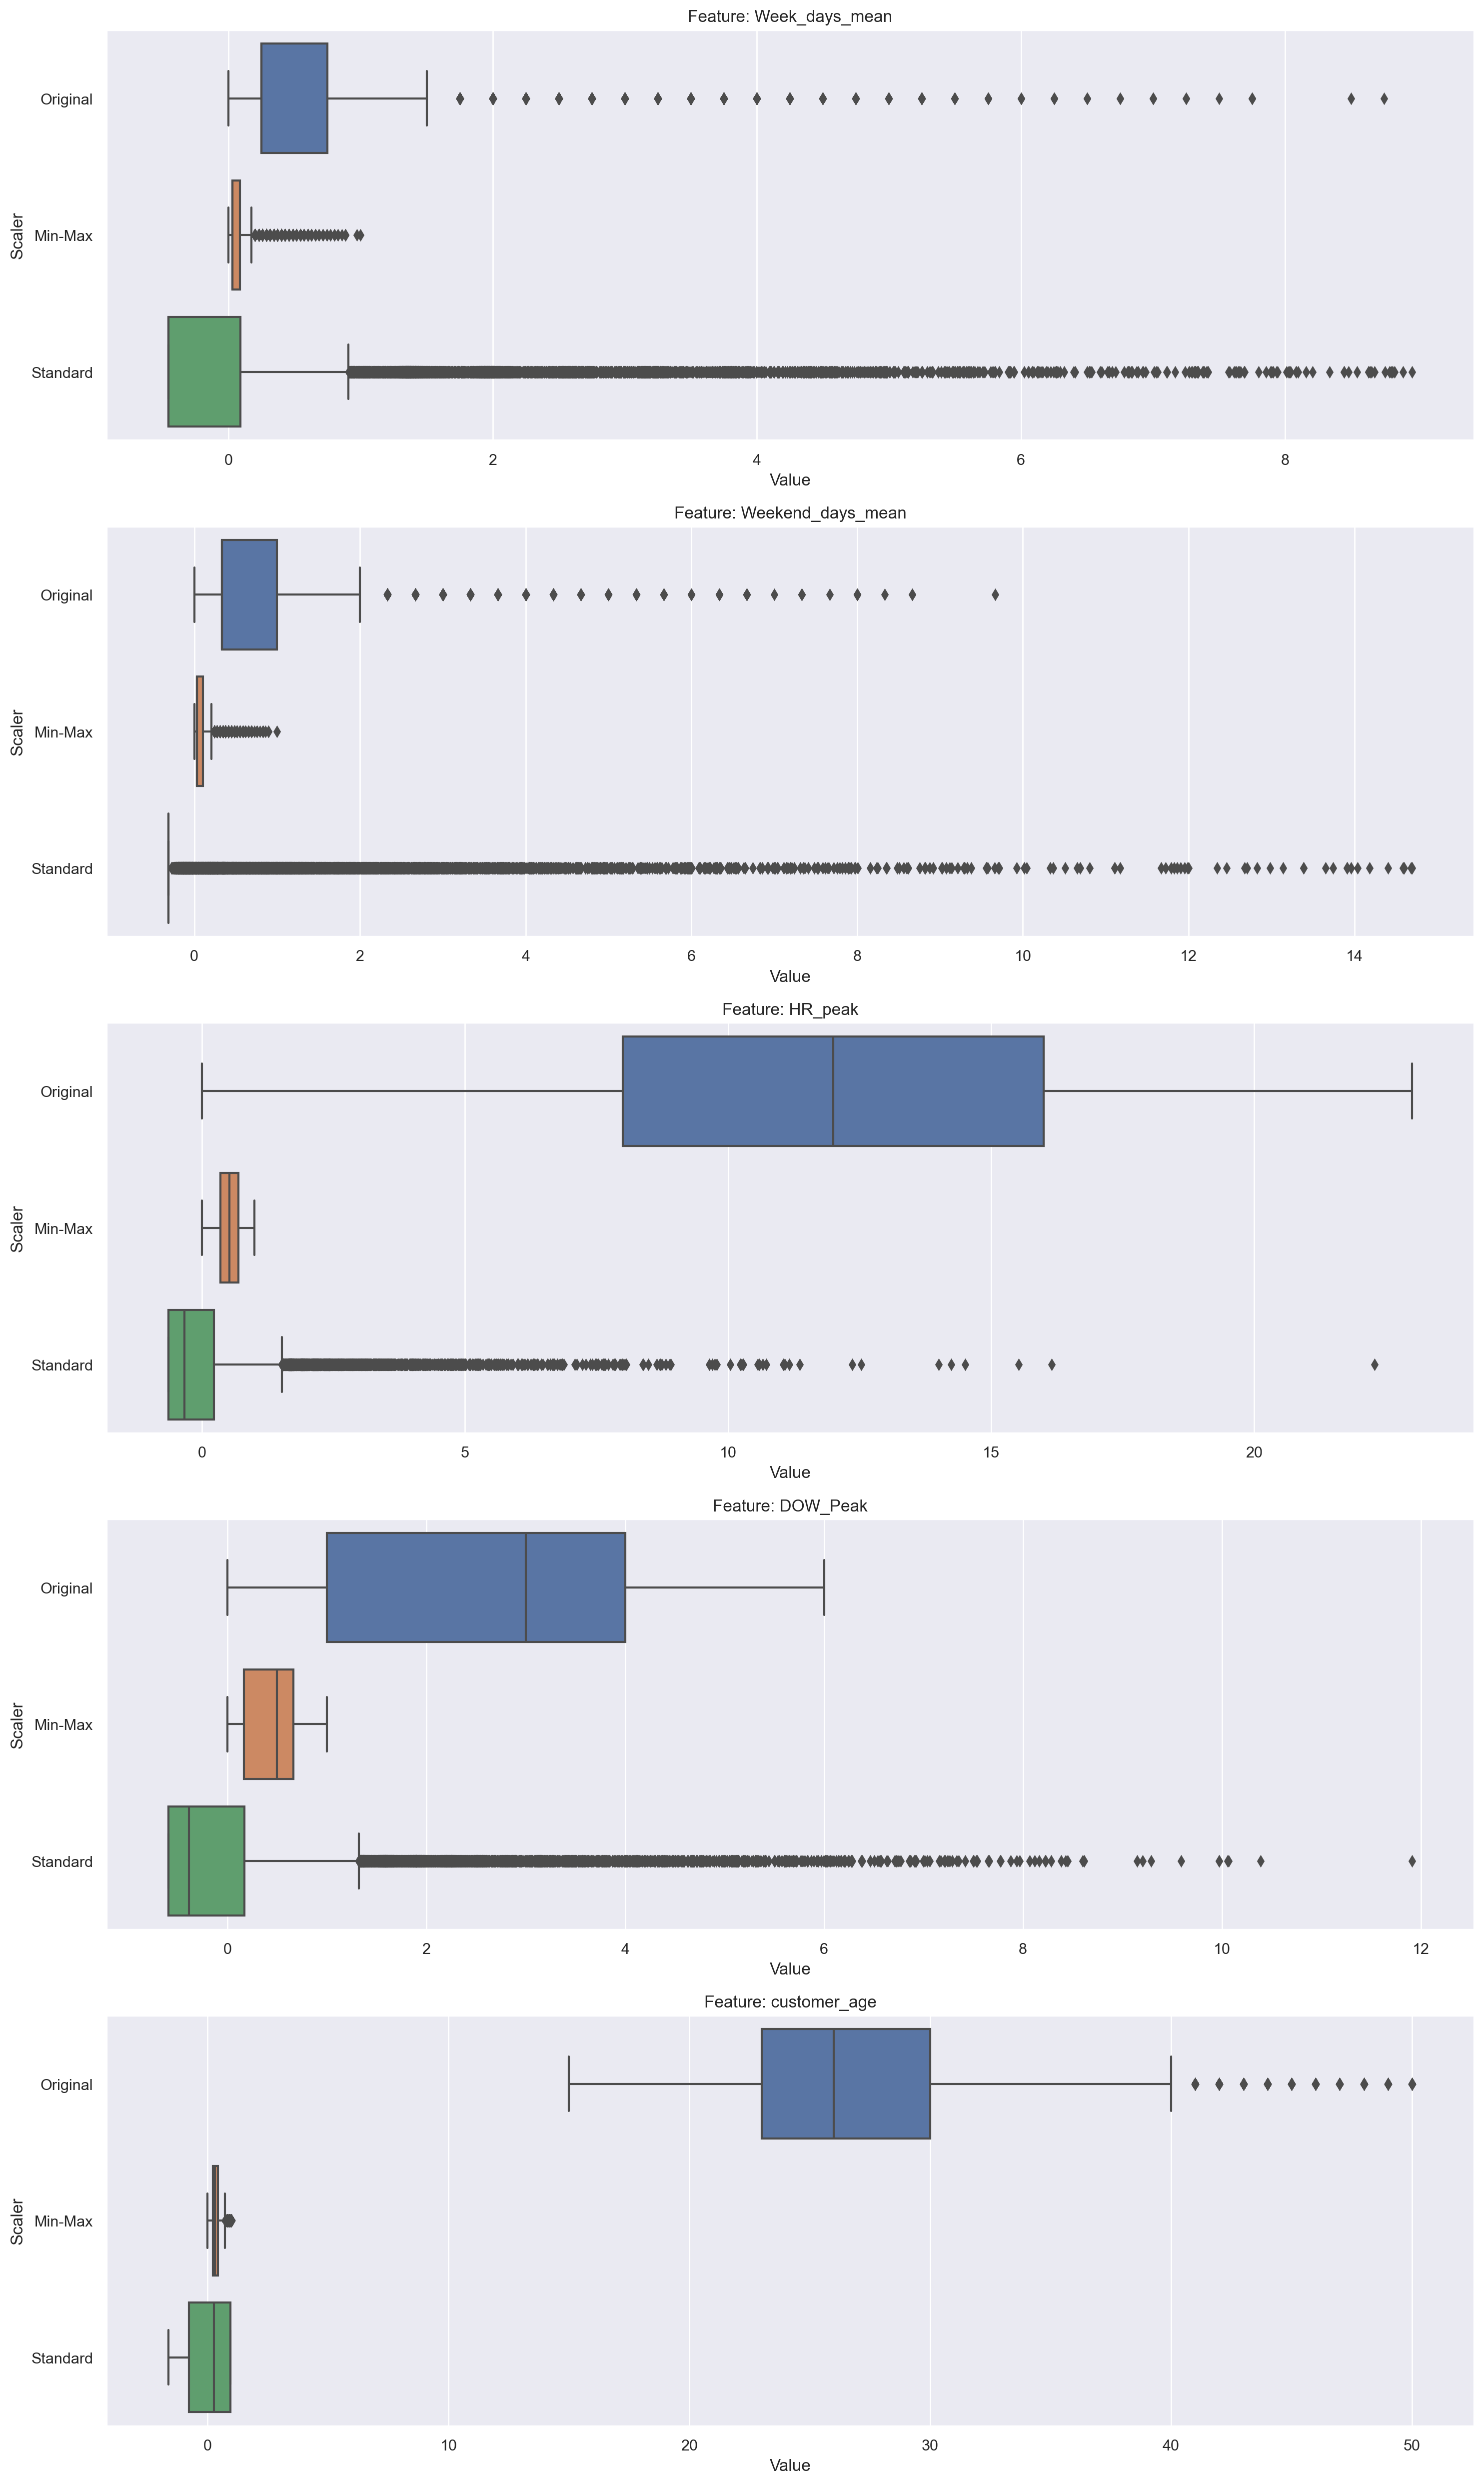

In [104]:
# Prepare an empty DataFrame to combine data for plotting
data_for_plot = pd.DataFrame()

# Loop over each column in the DataFrames
for feature in df_DEMO.columns:
    # Combine data from all three DataFrames for the current feature
    df_original = df_DEMO[[feature]].rename(columns={feature: 'Value'})
    df_original['Scaler'] = 'Original'
    df_original['Feature'] = feature

    df_minmax = df_DEMO_minmax[[feature]].rename(columns={feature: 'Value'})
    df_minmax['Scaler'] = 'Min-Max'
    df_minmax['Feature'] = feature

    df_standard = df_DEMO_standard[[feature]].rename(columns={feature: 'Value'})
    df_standard['Scaler'] = 'Standard'
    df_standard['Feature'] = feature

    # Concatenate into the plotting DataFrame
    data_for_plot = pd.concat([data_for_plot, df_original, df_minmax, df_standard])

# Convert the 'Value' column to numeric (to avoid errors with non-numeric data)
data_for_plot['Value'] = pd.to_numeric(data_for_plot['Value'], errors='coerce')

# Plotting: Create boxplots for each feature
num_features = len(df_DEMO.columns)
rows_per_figure = 6  # Number of rows (features) to plot per figure

for start_idx in range(0, num_features, rows_per_figure):
    # Define the range of features to plot in this figure
    end_idx = min(start_idx + rows_per_figure, num_features)
    features_to_plot = df_DEMO.columns[start_idx:end_idx]

    # Filter data for this subset of features
    subset_data = data_for_plot[data_for_plot['Feature'].isin(features_to_plot)]

    # Create the figure
    plt.figure(figsize=(15, 5 * len(features_to_plot)))

    # Loop through each feature and create a subplot
    for idx, feature in enumerate(features_to_plot, 1):
        plt.subplot(len(features_to_plot), 1, idx)
        sns.boxplot(data=subset_data[subset_data['Feature'] == feature], x='Value', y='Scaler', orient='h')
        plt.title(f'Feature: {feature}')

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

In [105]:
# We're using the standard scaler
df_CUI = df_CUI_standard
df_DEMO = df_DEMO_standard
df_ECO = df_ECO_standard

# Concatenate the three DataFrames along columns (axis=1)
final_df_ohc = pd.concat([df_DEMO, df_ECO, df_CUI], axis=1)

In [106]:
final_df_ohc.columns

Index(['Week_days_mean', 'Weekend_days_mean', 'HR_peak', 'DOW_Peak',
       'customer_age', 'Order_Frequency', 'Avg_Spend_per_Order',
       'Product_per_Order', 'Total_Orders', 'Customer_Duration',
       'CUI_American', 'CUI_Italian', 'CUI_Asian', 'CUI_OTHER',
       'Chain_Preference'],
      dtype='object')

In [107]:
print(final_df_ohc.isna().sum())


Week_days_mean         0
Weekend_days_mean      0
HR_peak                0
DOW_Peak               0
customer_age           0
Order_Frequency        0
Avg_Spend_per_Order    0
Product_per_Order      0
Total_Orders           0
Customer_Duration      0
CUI_American           0
CUI_Italian            0
CUI_Asian              0
CUI_OTHER              0
Chain_Preference       0
dtype: int64


In [108]:
# Filled NaN values with 0
final_df_ohc = final_df_ohc.fillna(0)

In [109]:
print(final_df_ohc.isna().sum().sum())

0


## DBSCAN

In [110]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=1.9, min_samples=20, n_jobs=4)
dbscan_labels = dbscan.fit_predict(final_df_ohc)

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

Number of estimated clusters : 2


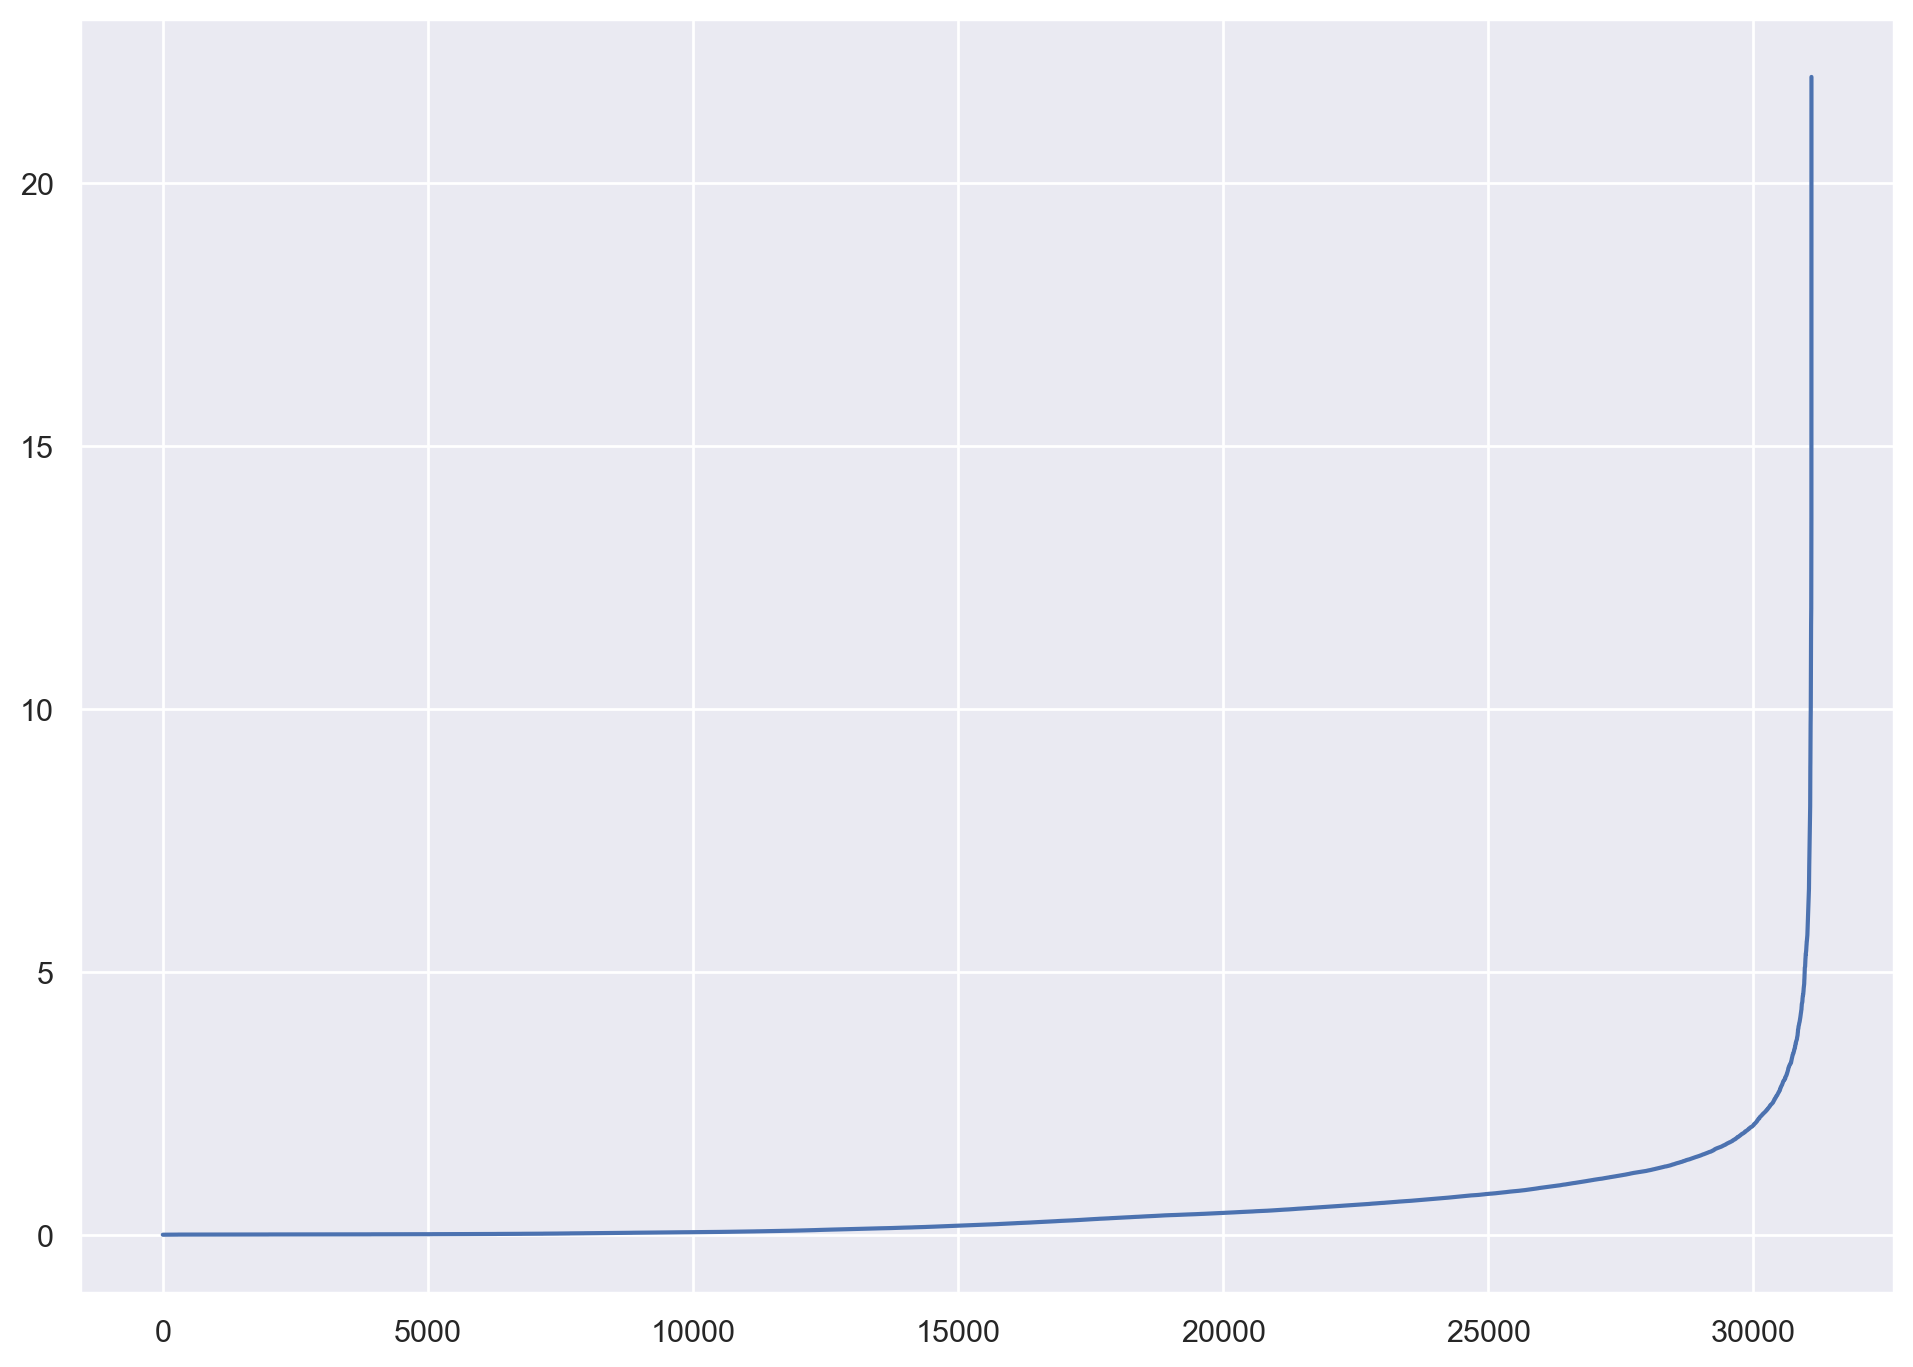

In [111]:
# K-distance graph to find out the right eps value
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(final_df_ohc)
distances, _ = neigh.kneighbors(final_df_ohc)
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.show()

In [112]:
# Concatenating the labels to df
df_concat = pd.concat([final_df_ohc, pd.Series(dbscan_labels, index=final_df_ohc.index, name="dbscan_labels")], axis=1)
df_concat.head()

Week_days_mean  Weekend_days_mean  ...  Chain_Preference  dbscan_labels
0       -0.454995          -0.310663  ...         -0.332520              0
1        0.819296          -0.310663  ...          0.958296              0
2        0.459472          -0.310663  ...          0.958296              0
3       -0.454995          -0.310663  ...         -0.332520              0
4        0.993243          -0.310663  ...         -1.623335              0

[5 rows x 16 columns]

In [113]:
# Detecting noise (potential outliers)
df_concat.loc[df_concat['dbscan_labels'] == -1].head()

Week_days_mean  Weekend_days_mean  ...  Chain_Preference  dbscan_labels
222        7.934252           0.691523  ...          0.835361             -1
259        2.682027           3.142995  ...         -0.418574             -1
298        7.799070           1.197158  ...         -0.885727             -1
331        6.654991           1.836014  ...          0.220687             -1
374       -0.454995          10.045265  ...         -1.623335             -1

[5 rows x 16 columns]

In [114]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

In [115]:
print(final_df_ohc.dtypes)

Week_days_mean         float64
Weekend_days_mean      float64
HR_peak                float64
DOW_Peak               float64
customer_age           float64
Order_Frequency        float64
Avg_Spend_per_Order    float64
Product_per_Order      float64
Total_Orders           float64
Customer_Duration      float64
CUI_American           float64
CUI_Italian            float64
CUI_Asian              float64
CUI_OTHER              float64
Chain_Preference       float64
dtype: object


In [116]:
print(final_df_ohc['customer_region'].unique())

KeyError: 'customer_region'

In [307]:
final_df_ohc['customer_region'] = final_df_ohc['customer_region'].astype(int)

In [308]:
print(final_df_ohc['customer_region'].dtype)  # Should show 'int64'

int32


In [299]:
# Select columns with float64 type
float_columns = final_df_ohc.select_dtypes(include=['float64']).columns

# Convert all float columns to integer
final_df_ohc[float_columns] = final_df_ohc[float_columns].astype('int32')

# Verify the data types after conversion
print(final_df_ohc.dtypes)

Week_days_mean         int32
Weekend_days_mean      int32
HR_peak                int32
DOW_Peak               int32
customer_age           int32
customer_region        int32
Order_Frequency        int32
Avg_Spend_per_Order    int32
Product_per_Order      int32
Total_Orders           int32
Customer_Duration      int32
CUI_American           int32
CUI_Italian            int32
CUI_Asian              int32
CUI_OTHER              int32
Chain_Preference       int32
dtype: object


In [301]:
# Check columns with non-numeric data
non_numeric_columns = df_nonoise.select_dtypes(exclude=[np.number]).columns
print(non_numeric_columns)

Index(['customer_region'], dtype='object')


In [302]:
print(final_df_ohc['customer_region'].unique())

[2360 8670 4660 2440 4140 2490 8370    0]


In [300]:
# Computing the R^2 of the cluster solution
df_nonoise = df_concat.loc[df_concat['dbscan_labels'] != -1]
sst = get_ss(df[metric_features])  # get total sum of squares
ssw_labels = df_nonoise.groupby(by='dbscan_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

TypeError: unsupported operand type(s) for -: 'float' and 'str'

# 5. Clustering

### Testing on K-means and Hierarchical clustering

Testing on K-means and Hierarchical clustering

In [117]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

def r2(df, labels):
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return 1 - ssw/sst
    
def get_r2_scores(df, clusterer, min_k=2, max_k=10):
    """
    Loop over different values of k. To be used with sklearn clusterers.
    """
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        r2_clust[n] = r2(df, labels)
    return r2_clust


# Set up the clusterers
kmeans = KMeans(
    init='k-means++',
    n_init=20,
    random_state=42
)

hierarchical = AgglomerativeClustering(
    metric='euclidean'
)

Finding the optimal clusterer on Demographic variables

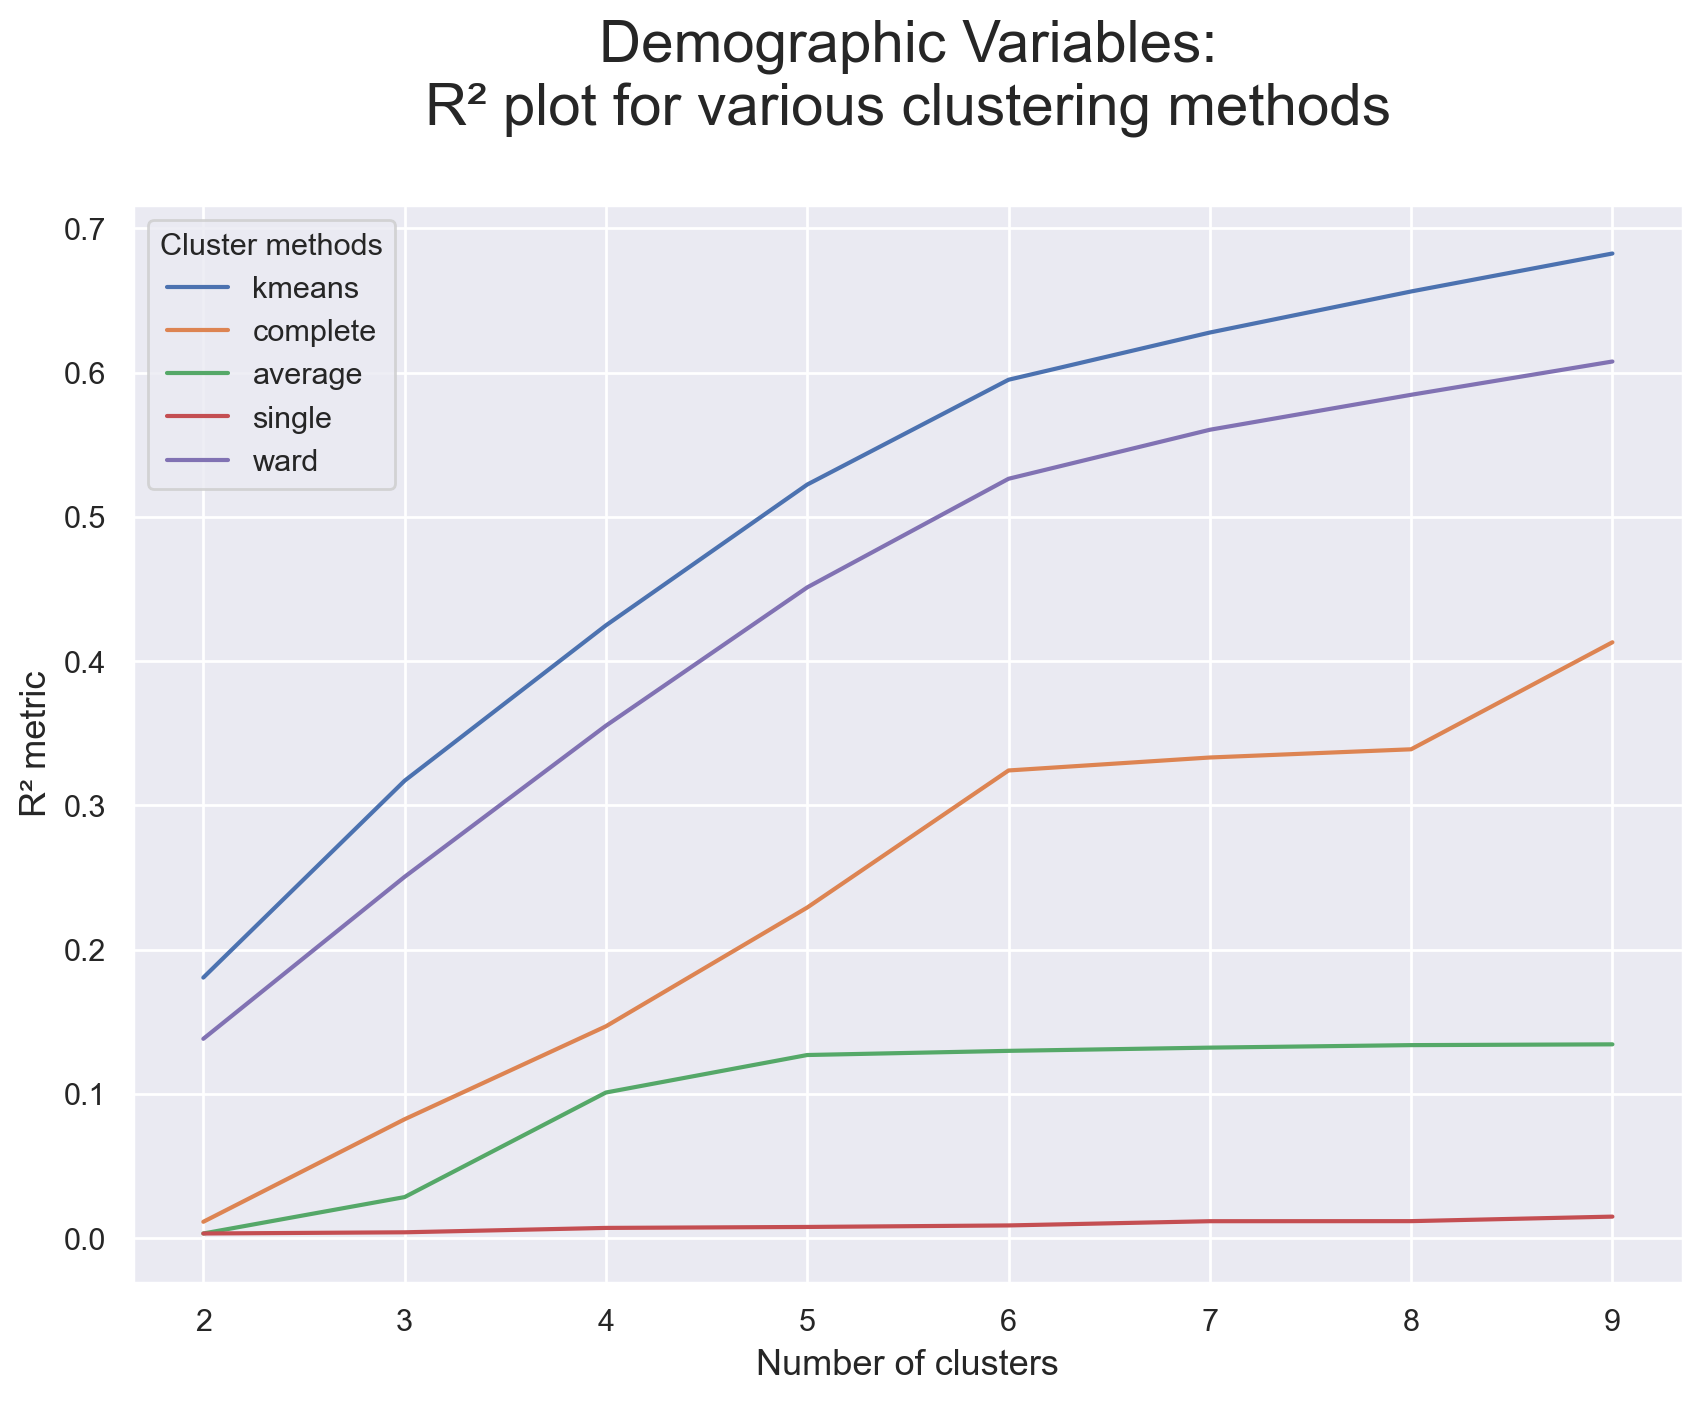

In [118]:
# Obtaining the R² scores for each cluster solution on demographic variables
r2_scores = {}
r2_scores['kmeans'] = get_r2_scores(df_DEMO, kmeans)

for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores[linkage] = get_r2_scores(
        df_DEMO, hierarchical.set_params(linkage=linkage)
    )

pd.DataFrame(r2_scores)

# Visualizing the R² scores for each cluster solution on demographic variables
pd.DataFrame(r2_scores).plot.line(figsize=(10,7))

plt.title("Demographic Variables:\nR² plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R² metric", fontsize=13)
plt.show()

Repeat the process for Economic variables

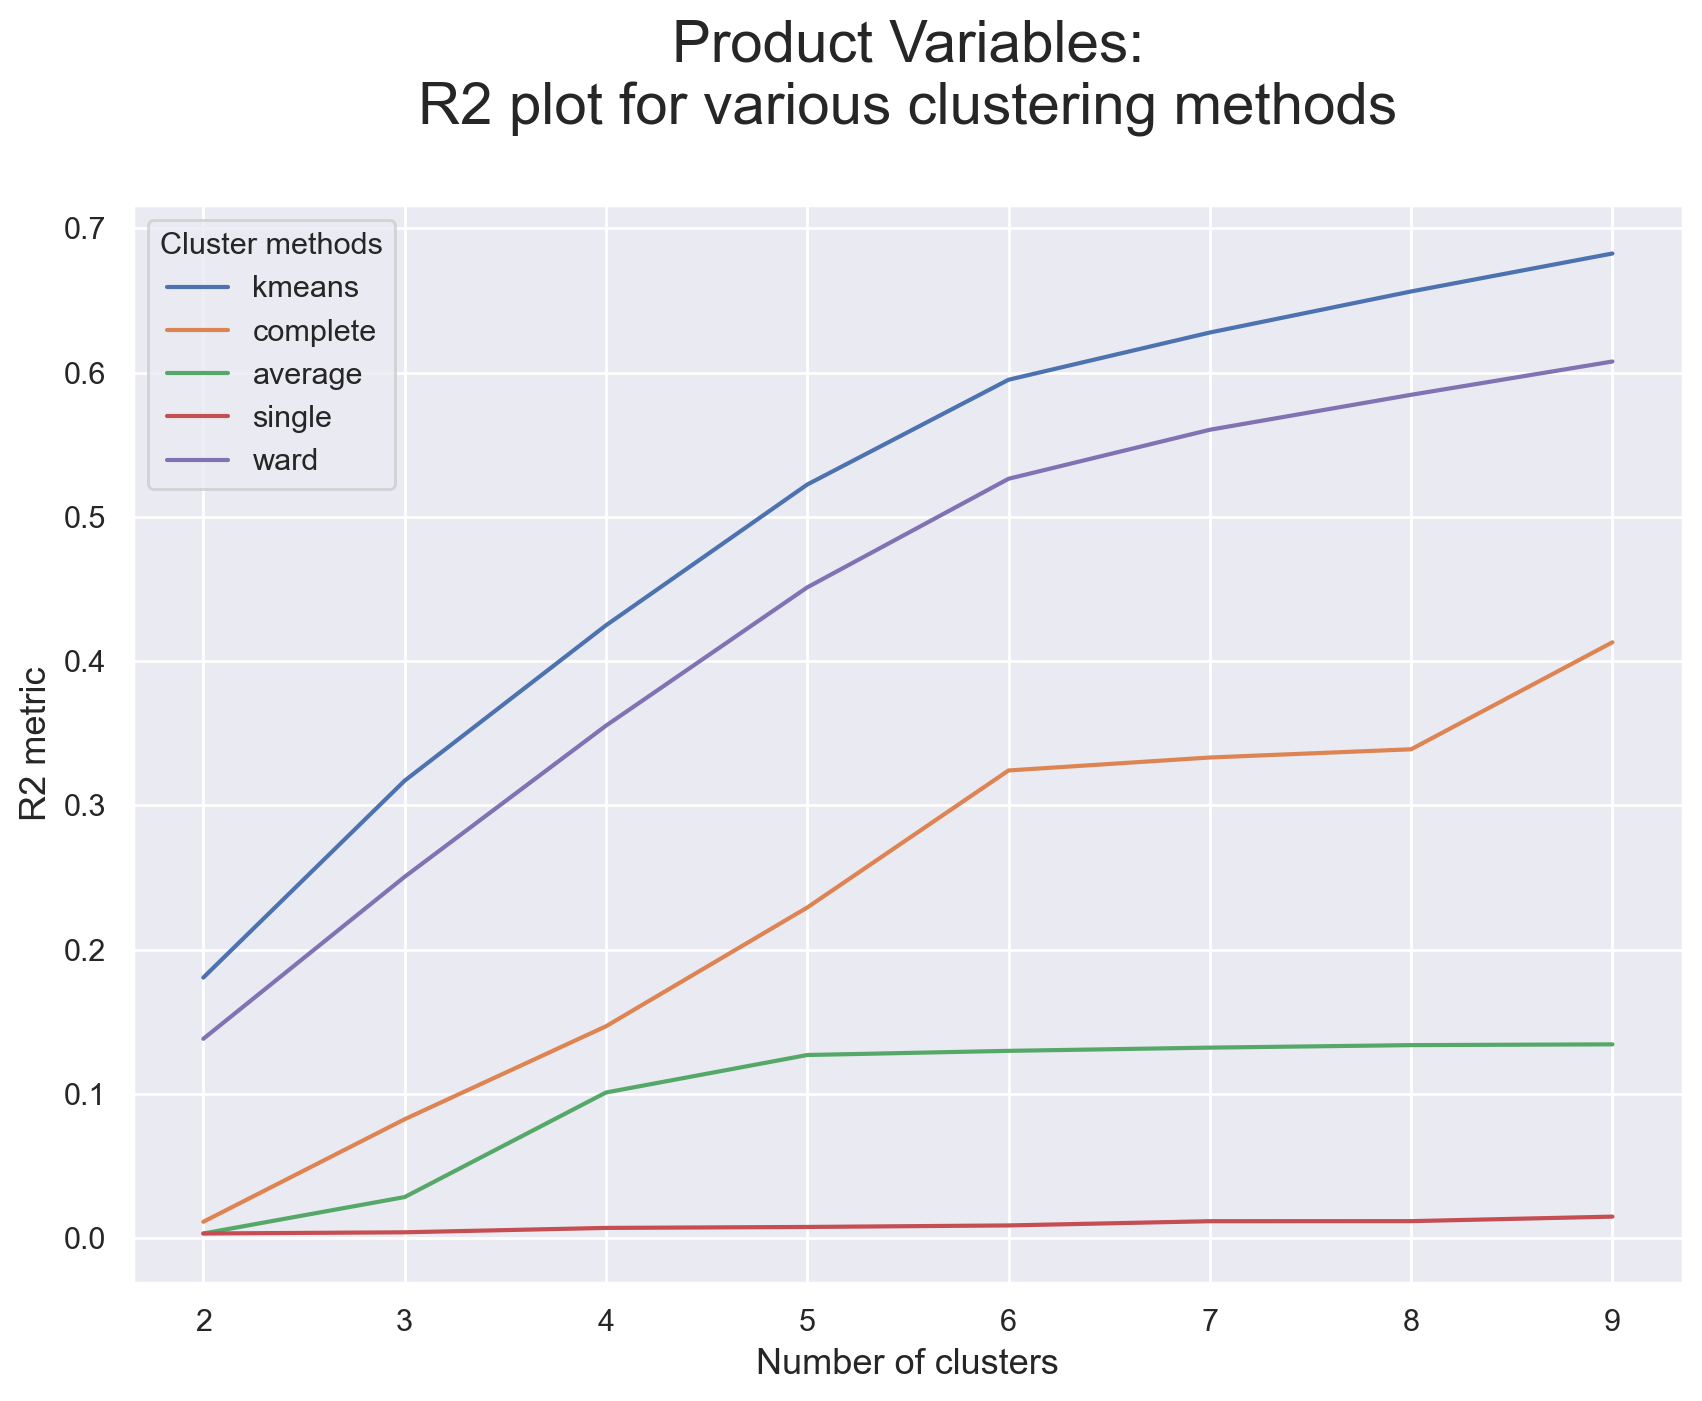

In [119]:
# Obtaining the R² scores for each cluster solution on product variables
r2_scores = {}
r2_scores['kmeans'] = get_r2_scores(df_ECO, kmeans)

for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores[linkage] = get_r2_scores(
        df_ECO, hierarchical.set_params(linkage=linkage)
    )

# Visualizing the R² scores for each cluster solution on product variables
pd.DataFrame(r2_scores).plot.line(figsize=(10,7))

plt.title("Product Variables:\nR2 plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)
plt.show()

Repeat the process for Cuisine variables

In [ ]:
# Obtaining the R² scores for each cluster solution on product variables
r2_scores = {}
r2_scores['kmeans'] = get_r2_scores(df_CUI, kmeans)

for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores[linkage] = get_r2_scores(
        df_CUI, hierarchical.set_params(linkage=linkage)
    )

# Visualizing the R² scores for each cluster solution on product variables
pd.DataFrame(r2_scores).plot.line(figsize=(10,7))

plt.title("Product Variables:\nR2 plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)
plt.show()

#### Merging the Perspectives:

In [ ]:
# Applying the right clustering (algorithm and number of clusters) for each perspective
kmeans_CUI = KMeans(
    n_clusters=, ########### change accordingly to the results
    init='k-means++',
    n_init=20,
    random_state=42
)
CUI_labels = kmeans_CUI.fit_predict(df_CUI)

kmeans_ECO = KMeans(
    n_clusters=, ########### change accordingly to the results
    init='k-means++',
    n_init=20,
    random_state=42
)
ECO_labels = kmeans_ECO.fit_predict(df_ECO)

kmeans_DEMO = KMeans(
    n_clusters=, ########### change accordingly to the results
    init='k-means++',
    n_init=20,
    random_state=42
)
DEMO_labels = kmeans_DEMO.fit_predict(df_DEMO)

df['cuisine_labels'] = CUI_labels
df['economic_labels'] = ECO_labels
df['demographic_labels'] = DEMO_labels

# Count label frequencies (contigency table)
pd.crosstab(df['cuisine_labels'],df['economic_labels'], df['demographic_labels'])

#### Merging using Hierarchical clustering

In [ ]:
# Centroids of the concatenated cluster labels
df_centroids = df.groupby(['cuisine_labels', 'economic_labels', 'demographic_labels'])\
    [metric_features].mean()
df_centroids

In [ ]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
linkage = 'ward'
hclust = AgglomerativeClustering(
    linkage=linkage, 
    metric='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hclust_labels = hclust.fit_predict(df_centroids)

In [ ]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 2.3
dendrogram(linkage_matrix, 
           truncate_mode='level', 
           labels=df_centroids.index, p=5, 
           color_threshold=y_threshold, 
           above_threshold_color='k')

plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [ ]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    metric='euclidean', 
    n_clusters= #######change accordingly
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids  # centroid's cluster labels

In [ ]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids['hclust_labels'].to_dict()

df_ = df.copy()

# Mapping the hierarchical clusters on the centroids to the observations
df_['merged_labels'] = df_.apply(
    lambda row: cluster_mapper[
        (row['behavior_labels'], row['product_labels'])
    ], axis=1
)

# Merged cluster centroids
df_.groupby('merged_labels').mean()[metric_features]

In [ ]:
#Merge cluster contigency table
# Getting size of each final cluster
df_counts = df_.groupby('merged_labels')\
    .size()\
    .to_frame()

# Getting the product and behavior labels
df_counts = df_counts\
    .rename({v:k for k, v in cluster_mapper.items()})\
    .reset_index()

df_counts['behavior_labels'] = df_counts['merged_labels'].apply(lambda x: x[0])
df_counts['product_labels'] = df_counts['merged_labels'].apply(lambda x: x[1])

df_counts.pivot(values=0, index='behavior_labels', columns='product_labels')

In [ ]:
# Setting df to have the final product, behavior and merged clusters
df = df_.copy()

#### Cluster Analysis

In [ ]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

In [ ]:
# Profilling each cluster (product, behavior, merged)
cluster_profiles(
    df = df[metric_features.to_list() + ['CUI_labels', 'ECO_labels', 'DEMO_labels', 'merged_labels']], 
    label_columns = ['CUI_labels', 'ECO_labels', 'DEMO_labels', 'merged_labels'], 
    figsize = (28, 13), 
    compar_titles = ["Cuisine clustering", "Economic clustering", "Demographic clustering", "Merged clusters"]
)